## Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
import time
import gc
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout , LSTM

In [2]:
DATA_PATH = "Datasets\\New_datasets\\Data_feature_CQT.json"

In [3]:
# Function to load data

def load_data(data_path):
    
    with open(data_path, "r") as fp:
        data = json.load(fp)

  # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return X, y

In [4]:
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [5]:
X.shape

(3020, 259, 100)

In [6]:
y.shape

(3020,)

In [7]:
import gc
gc.collect()

0

# SVM 

In [8]:
import gc
gc.collect()

0

In [9]:
# parameters = [{'C': [0.1, 1, 5, 10, 50, 100,500], 'kernel': ['linear']},
#               {'C': [0.1, 1, 5, 10, 50, 100,500], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,10,100]}]

In [10]:
# from sklearn.model_selection import GridSearchCV, ShuffleSplit

In [11]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [12]:
# grid_search = GridSearchCV(svc, param_grid = parameters, scoring='accuracy',cv=shuffle_split,n_jobs=-1,verbose=10)

In [13]:
# grid_search.fit(X,y)

In [14]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

In [15]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_svm = []
y_test_all = []
times_svm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    model_svm = SVC(kernel='rbf')
    
    start_time = time.time()
    
    model_svm.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = model_svm.predict(X_test)
    scores_svm.append(x)
    times_svm.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [16]:
times_svm

[927.3899540901184,
 924.6647839546204,
 927.8328828811646,
 929.8162398338318,
 944.6300303936005,
 973.9851016998291,
 971.3484988212585,
 954.1617140769958,
 964.0709900856018,
 969.3253276348114]

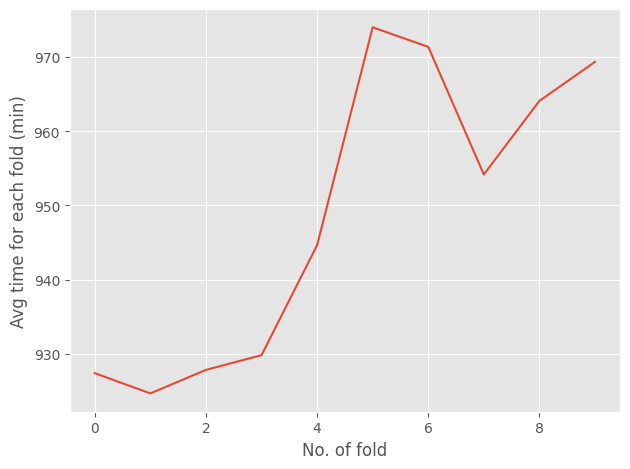

In [17]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(times_svm)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold (min)")
plt.tight_layout()
plt.savefig("svm times")
plt.show()

In [18]:
np.array(y_test_all).shape

(10, 302)

In [19]:
np.array(scores_svm).shape

(10, 302)

In [20]:
from sklearn.metrics import accuracy_score
acc_scores_svm = []
for i in range(len(y_test_all)):
    acc_scores_svm.append(accuracy_score(y_test_all[i],scores_svm[i]))

In [21]:
acc_scores_svm

[0.5662251655629139,
 0.5562913907284768,
 0.5927152317880795,
 0.5662251655629139,
 0.5629139072847682,
 0.5827814569536424,
 0.5827814569536424,
 0.5927152317880795,
 0.5960264900662252,
 0.5860927152317881]

In [22]:
df_acc = pd.DataFrame([acc_scores_svm])

df_acc.to_csv('svm_accuracy', index=False)

df_acc = pd.read_csv('svm_accuracy')

acc_scores_svm = df_acc.iloc[0].values

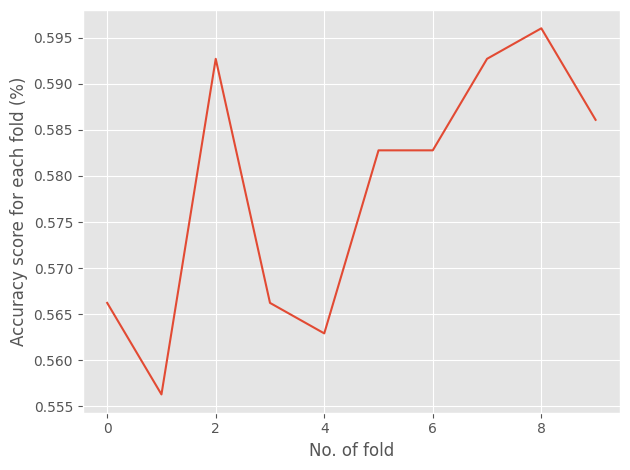

In [23]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_svm)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold (%)")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("svm accuracy")
plt.show()

In [24]:
scores_svm_n = np.array(scores_svm)
y_test_all_n = np.array(y_test_all)

scores_svm_n = scores_svm_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_svm_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 57.85%


In [26]:
import gc
gc.collect()

6826

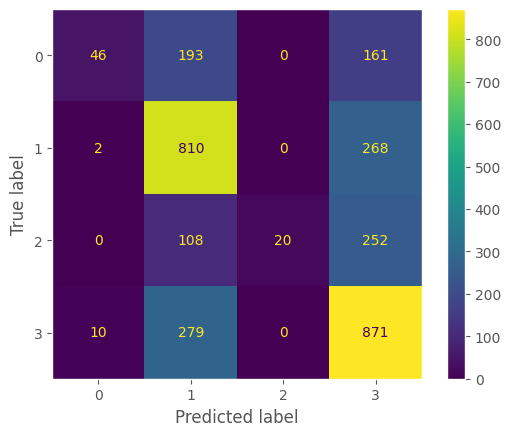

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_svm_n, labels=model_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_svm.classes_)
disp.plot()
plt.grid(False)
plt.savefig("svm")
plt.show()

In [28]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_svm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.79      0.12      0.20       400
           1       0.58      0.75      0.66      1080
           2       1.00      0.05      0.10       380
           3       0.56      0.75      0.64      1160

    accuracy                           0.58      3020
   macro avg       0.73      0.42      0.40      3020
weighted avg       0.65      0.58      0.52      3020



## Decision Tree

In [29]:
import gc
gc.collect()

5

In [30]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_dtc = []
times_dtc = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    dtc = DecisionTreeClassifier()
    
    
    start_time = time.time()
    dtc.fit(X_train, y_train)
    end_time = time.time()
    
    
    x = dtc.predict(X_test)
    
    scores_dtc.append(x)
    times_dtc.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [31]:
times_dtc

[80.30202507972717,
 82.52230286598206,
 59.97906565666199,
 83.06446266174316,
 91.24634647369385,
 78.50003504753113,
 83.21619367599487,
 69.85848712921143,
 77.08382868766785,
 80.20821452140808]

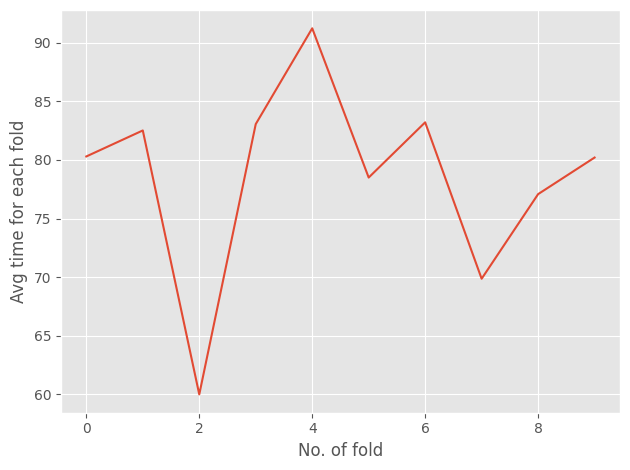

In [32]:
import matplotlib.pyplot as plt

plt.plot(times_dtc)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("dtc times")
plt.show()

In [33]:
np.array(y_test_all).shape

(10, 302)

In [34]:
np.array(scores_dtc).shape

(10, 302)

In [35]:
from sklearn.metrics import accuracy_score
acc_scores_dtc = []
for i in range(len(y_test_all)):
    acc_scores_dtc.append(accuracy_score(y_test_all[i],scores_dtc[i]))

In [36]:
acc_scores_dtc

[0.4139072847682119,
 0.4105960264900662,
 0.40397350993377484,
 0.40066225165562913,
 0.40397350993377484,
 0.4602649006622517,
 0.4470198675496689,
 0.3708609271523179,
 0.4503311258278146,
 0.4370860927152318]

In [37]:
df_acc = pd.DataFrame([acc_scores_dtc])

df_acc.to_csv('dtc_accuracy', index=False)

df_acc = pd.read_csv('dtc_accuracy')

acc_scores_dtc = df_acc.iloc[0].values

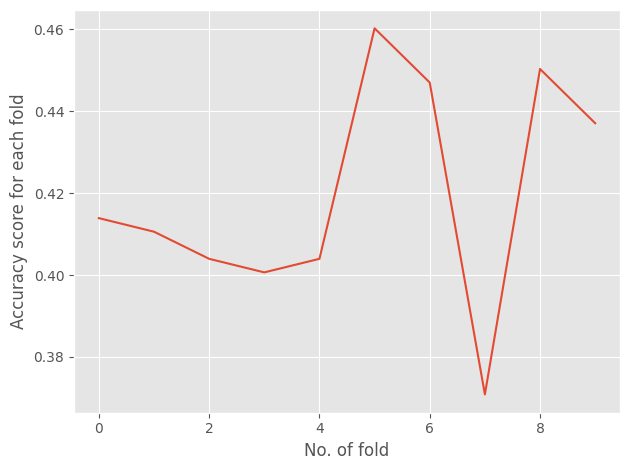

In [38]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_dtc)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("dtc accuracy")
plt.show()

In [39]:
import gc
gc.collect()

3200

In [40]:
scores_dtc_n = np.array(scores_dtc)
y_test_all_n = np.array(y_test_all)

scores_dtc_n = scores_dtc_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_dtc_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 41.99%


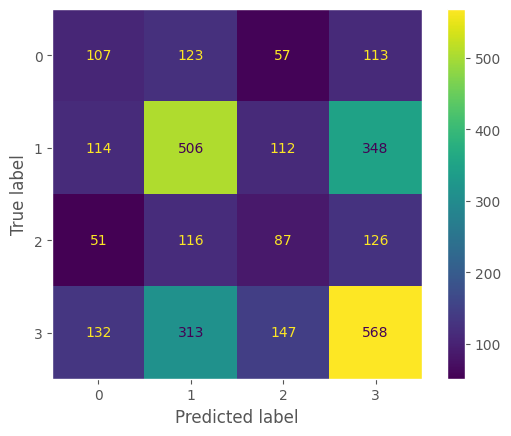

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_dtc_n, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
disp.plot()
plt.grid(False)
plt.savefig("DTC")
plt.show()

In [43]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_dtc_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.26      0.27      0.27       400
           1       0.48      0.47      0.47      1080
           2       0.22      0.23      0.22       380
           3       0.49      0.49      0.49      1160

    accuracy                           0.42      3020
   macro avg       0.36      0.36      0.36      3020
weighted avg       0.42      0.42      0.42      3020



In [44]:
# val = np.arange(100,500,20)
# parameters = [{'max_depth':val}]

In [45]:
# parameters

In [46]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [47]:
# grid_search_dtc = GridSearchCV(dtc, param_grid = parameters, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [48]:
# grid_search_dtc.fit(X_train,y_train)

In [49]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

# Random Forest

In [50]:
import gc
gc.collect()

6425

In [51]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_rdf = []
times_rdf = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    rdf = RandomForestClassifier()
    
    #start time
    start_time = time.time()             
    
    rdf.fit(X_train, y_train)
    
    #end time
    end_time = time.time()     
    
    x = rdf.predict(X_test)
    scores_rdf.append(x)
    times_rdf.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [52]:
times_rdf

[46.1204617023468,
 46.90572547912598,
 51.554869651794434,
 48.966429471969604,
 45.397589445114136,
 51.756473779678345,
 52.33128905296326,
 51.35394740104675,
 46.63468551635742,
 51.94157886505127]

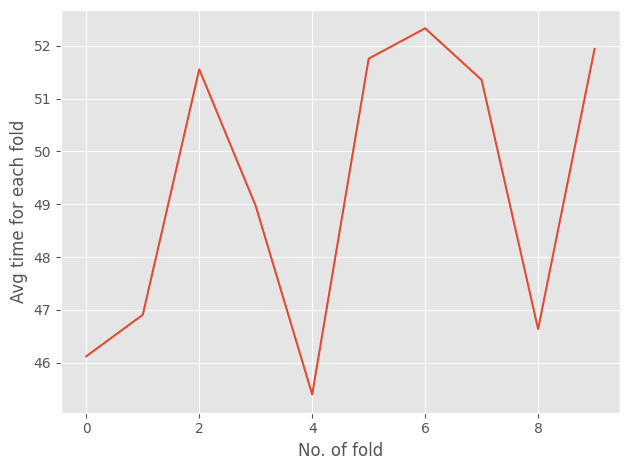

In [53]:
import matplotlib.pyplot as plt

plt.plot(times_rdf)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("rdf times")
plt.show()

In [54]:
import gc
gc.collect()

3470

In [55]:
from sklearn.metrics import accuracy_score
acc_scores_rdf = []
for i in range(len(y_test_all)):
    acc_scores_rdf.append(accuracy_score(y_test_all[i],scores_rdf[i]))

In [56]:
acc_scores_rdf

[0.6192052980132451,
 0.6026490066225165,
 0.5993377483443708,
 0.609271523178808,
 0.6291390728476821,
 0.6258278145695364,
 0.6357615894039735,
 0.5860927152317881,
 0.5761589403973509,
 0.6490066225165563]

In [57]:
df_acc = pd.DataFrame([acc_scores_rdf])

df_acc.to_csv('rdf_accuracy', index=False)

df_acc = pd.read_csv('rdf_accuracy')

acc_scores_rdf = df_acc.iloc[0].values

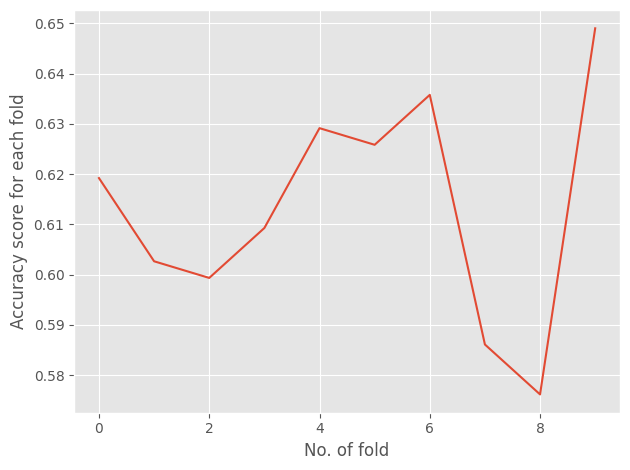

In [58]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_rdf)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("rdf accuracy")
plt.show()
plt.show()

In [59]:
scores_rdf_n = np.array(scores_rdf)
y_test_all_n = np.array(y_test_all)

scores_rdf_n = scores_rdf_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [60]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_rdf_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 61.32%


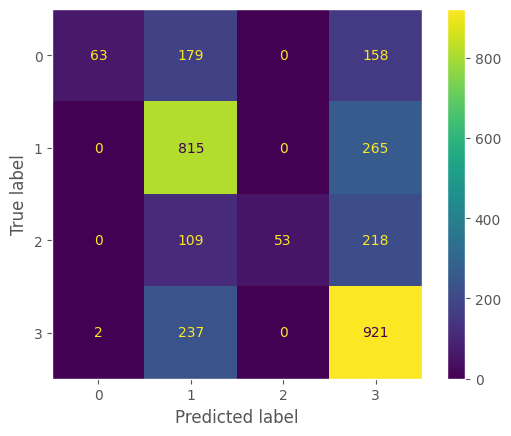

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_rdf_n, labels=rdf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rdf.classes_)
disp.plot()
plt.grid(False)
plt.savefig("RDF")
plt.show()

In [62]:
import gc
gc.collect()

6142

In [63]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_rdf_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.97      0.16      0.27       400
           1       0.61      0.75      0.67      1080
           2       1.00      0.14      0.24       380
           3       0.59      0.79      0.68      1160

    accuracy                           0.61      3020
   macro avg       0.79      0.46      0.47      3020
weighted avg       0.70      0.61      0.57      3020



In [64]:
# parameters_rdf = [
#               {'n_estimators': [10,50,100,150,250,500,750,1000,1500,2000],
#               'max_depth': [1,10,50,100,150,250,500,750,1000,1500,2000]}
#              ]

In [65]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [66]:
# grid_search = GridSearchCV(rdf, param_grid = parameters_rdf, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [67]:
# grid_search.fit(X_train,y_train)

In [68]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

# KNN

In [69]:
import gc
gc.collect()

0

In [70]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_knn = []
times_knn = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    knn = KNeighborsClassifier()
    
    start_time = time.time()
    
    knn.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = knn.predict(X_test)
    scores_knn.append(x)
    times_knn.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [71]:
times_knn

[0.06842851638793945,
 0.052930355072021484,
 0.061165571212768555,
 0.09122514724731445,
 0.0634315013885498,
 0.06250166893005371,
 0.0624997615814209,
 0.03124833106994629,
 0.06242990493774414,
 0.0468745231628418]

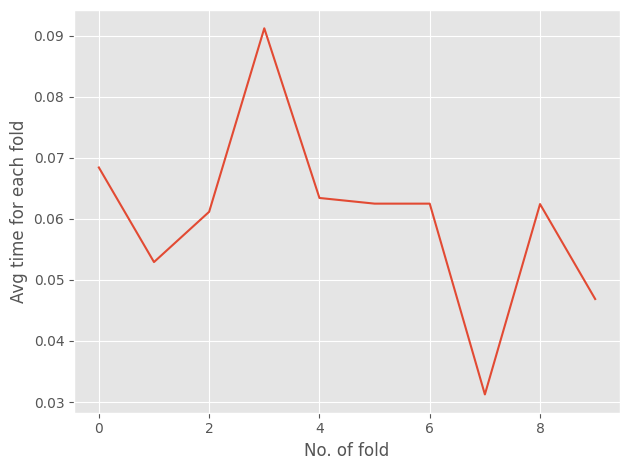

In [72]:
import matplotlib.pyplot as plt

plt.plot(times_knn)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("knn times")
plt.show()

In [73]:
from sklearn.metrics import accuracy_score
acc_scores_knn = []
for i in range(len(y_test_all)):
    acc_scores_knn.append(accuracy_score(y_test_all[i],scores_knn[i]))

In [74]:
acc_scores_knn

[0.4735099337748344,
 0.4205298013245033,
 0.4139072847682119,
 0.45364238410596025,
 0.40397350993377484,
 0.45695364238410596,
 0.4470198675496689,
 0.4867549668874172,
 0.4867549668874172,
 0.47019867549668876]

In [75]:
df_acc = pd.DataFrame([acc_scores_knn])

df_acc.to_csv('knn_accuracy', index=False)

df_acc = pd.read_csv('knn_accuracy')

acc_scores_knn = df_acc.iloc[0].values

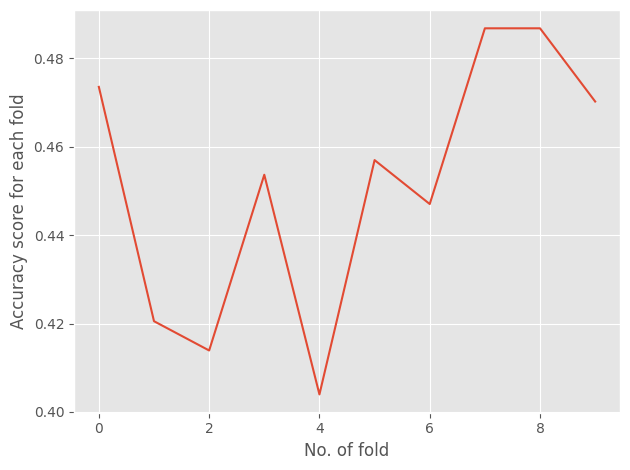

In [76]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_knn)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("knn accuracy")
plt.show()
plt.show()

In [77]:
import gc
gc.collect()

3195

In [78]:
scores_knn_n = np.array(scores_knn)
y_test_all_n = np.array(y_test_all)

scores_knn_n = scores_knn_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [79]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_knn_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 45.13%


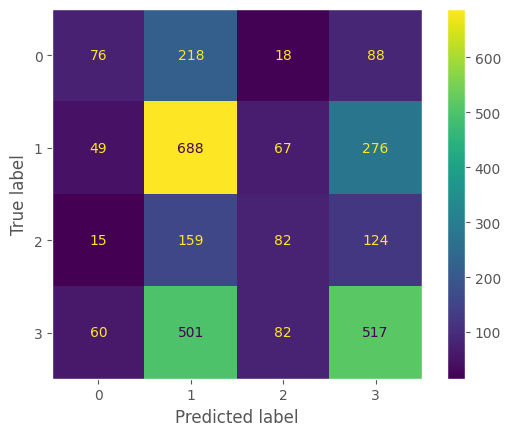

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_knn_n, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.grid(False)
plt.savefig("KNN")
plt.show()

In [81]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_knn_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.38      0.19      0.25       400
           1       0.44      0.64      0.52      1080
           2       0.33      0.22      0.26       380
           3       0.51      0.45      0.48      1160

    accuracy                           0.45      3020
   macro avg       0.42      0.37      0.38      3020
weighted avg       0.45      0.45      0.44      3020



In [82]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [83]:
# parameters_knn = [{'n_neighbors':[3,5,7,9,11,13,15,17,19,21],'weights': ['uniform', 'distance'],'leaf_size':[30,50,70,90,100]}]

In [84]:
# grid_search_knn = GridSearchCV(knn, param_grid = parameters_knn, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [85]:
# grid_search_knn.fit(X_train,y_train)

In [86]:
# print("Best hyperparameters: ", grid_search_knn.best_params_)
# print("Best score: ", grid_search_knn.best_score_)

In [87]:
# knn_2 = KNeighborsClassifier(n_neighbors=5,weights='distance',leaf_size=30)
# knn_2.fit(X_train,y_train)

# Naive Bayes

In [88]:
import gc
gc.collect()

6038

In [89]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nb = []
times_nb = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    nb = GaussianNB()
    
    start_time = time.time()
    
    nb.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = nb.predict(X_test)
    scores_nb.append(x)
    times_nb.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [90]:
times_nb

[0.5717685222625732,
 0.7466039657592773,
 0.742563009262085,
 0.7113349437713623,
 0.740952730178833,
 0.7353229522705078,
 0.7429747581481934,
 0.7443027496337891,
 0.6015100479125977,
 0.7200164794921875]

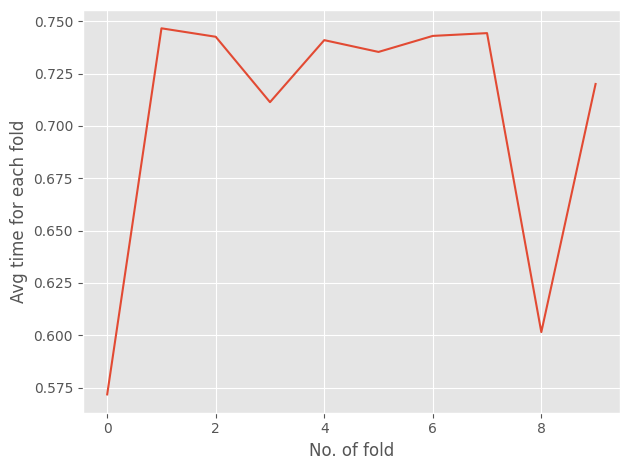

In [91]:
import matplotlib.pyplot as plt

plt.plot(times_nb)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("nb times")
plt.show()

In [92]:
import gc
gc.collect()

3579

In [93]:
from sklearn.metrics import accuracy_score
acc_scores_nb = []
for i in range(len(y_test_all)):
    acc_scores_nb.append(accuracy_score(y_test_all[i],scores_nb[i]))

In [94]:
acc_scores_nb

[0.3576158940397351,
 0.3576158940397351,
 0.37748344370860926,
 0.3841059602649007,
 0.33112582781456956,
 0.32450331125827814,
 0.36423841059602646,
 0.33774834437086093,
 0.3609271523178808,
 0.3509933774834437]

In [95]:
df_acc = pd.DataFrame([acc_scores_nb])

df_acc.to_csv('nb_accuracy', index=False)

df_acc = pd.read_csv('nb_accuracy')

acc_scores_nb = df_acc.iloc[0].values

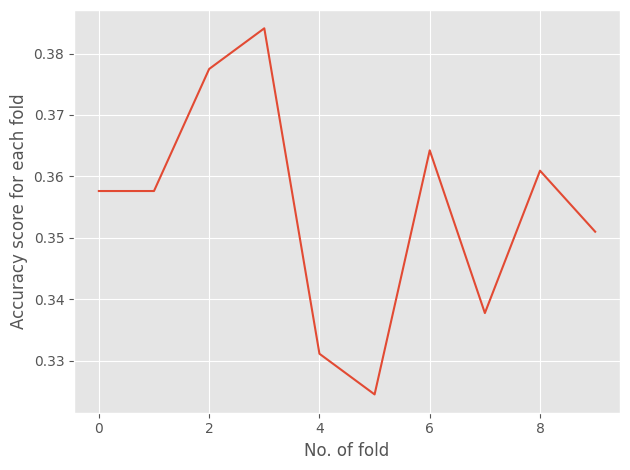

In [96]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_nb)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("nb accuracy")
plt.show()

In [97]:
scores_nb_n = np.array(scores_nb)
y_test_all_n = np.array(y_test_all)

scores_nb_n = scores_nb_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [98]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_nb_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 35.46%


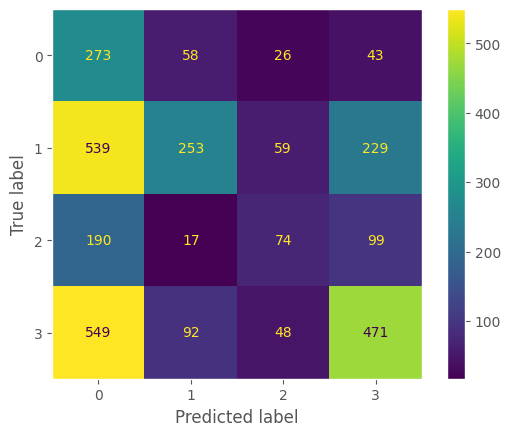

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_nb_n, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nb.classes_)
disp.plot()
plt.grid(False)
plt.savefig("NB")
plt.show()

In [100]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_nb_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.18      0.68      0.28       400
           1       0.60      0.23      0.34      1080
           2       0.36      0.19      0.25       380
           3       0.56      0.41      0.47      1160

    accuracy                           0.35      3020
   macro avg       0.42      0.38      0.33      3020
weighted avg       0.50      0.35      0.37      3020



In [101]:
import gc
gc.collect()

6049

In [102]:
# parameters_nb = {'var_smoothing': [1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16,1e-17,1e-18,1e-19,1e-20,1e-9, 1e-8, 1e-7, 1e-6, 1e-5,1e-4,1e-3,1e-2]}

In [103]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [104]:
# grid_search_nb = GridSearchCV(nb, param_grid = parameters_nb, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [105]:
# grid_search_nb.fit(X_train,y_train)

In [106]:
# print("Best hyperparameters: ", grid_search_nb.best_params_)
# print("Best score: ", grid_search_nb.best_score_)

In [107]:
# nb_2 = GaussianNB(var_smoothing=1e-10)
# nb_2.fit(X_train,y_train)

In [108]:
# times_svm_n = np.array(times_svm)
# times_svm_n = times_svm_n/60.0

# times_dtc_n = np.array(times_dtc)
# times_dtc_n = times_dtc_n/60.0

# times_rdf_n = np.array(times_rdf)
# times_rdf_n = times_rdf_n/60.0

# times_knn_n = np.array(times_knn)
# times_knn_n = times_knn_n/60.0

# times_nb_n = np.array(times_nb)
# times_nb_n = times_svm_n/60.0

# Fusion (CNN+SVM)

In [8]:
import gc
gc.collect()

0

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import BatchNormalization

In [10]:
# X,y = load_data(DATA_PATH)

In [11]:
X.shape

(3020, 259, 100)

In [12]:
# ''''''
# from keras.layers import Activation
# from keras.backend import sigmoid
# def swish(x):
#     return x * sigmoid(x)
# ''''''

In [13]:
# ''''
# from keras.utils import get_custom_objects
# get_custom_objects().update({'swish':Activation(swish)})
# ''''

In [14]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_cnn_svm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_cnn_svm.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [15]:
def create_model_cnn_svm():
    
    model_cnn_svm = keras.Sequential([

        keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (X.shape[1],X.shape[2],1)),
        keras.layers.MaxPool2D((3,3),strides=(1,1),padding ='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),

        keras.layers.Conv2D(32,(3,3),activation ='relu'),
        keras.layers.MaxPool2D((3,3),strides=(1,1),padding ='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),

        keras.layers.Flatten(),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dropout(0.5),


        keras.layers.Dense(4,kernel_regularizer=keras.regularizers.l2(0.01),activation='softmax')

    ])
    return model_cnn_svm

In [16]:
import gc
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_cnn_svm = []
y_test_all_cnn_svm = []
train_acc_cnn_svm = []
test_acc_cnn_svm = []
train_loss_cnn_svm = []
test_loss_cnn_svm = []


for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_cnn_svm.append(y_test)
    
    model_cnn_svm = None
    model_cnn_svm = create_model_cnn_svm()
    
    X_train, x_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    optimiser =tf.keras.optimizers.Adam(learning_rate=0.001)
    
    model_cnn_svm.compile(optimizer = optimiser, loss = tf.keras.losses.squared_hinge, metrics = ['accuracy'])
    
    history = model_cnn_svm.fit(X_train, y_train,validation_data=(x_valid,y_valid),batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    x = model_cnn_svm.predict(X_test)
    
    scores_cnn_svm.append(x)
    train_acc_cnn_svm.append(history.history["accuracy"])
    test_acc_cnn_svm.append(history.history["val_accuracy"])
    train_loss_cnn_svm.append(history.history["loss"])
    test_loss_cnn_svm.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 8s 64ms/step - loss: 0.8433 - accuracy: 0.2944 - val_loss: 0.8417 - val_accuracy: 0.3235 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 58ms/step - loss: 0.8303 - accuracy: 0.2392 - val_loss: 0.8306 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8221 - accuracy: 0.1893 - val_loss: 0.8246 - val_accuracy: 0.2610 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8175 - accuracy: 0.1554 - val_loss: 0.8212 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8148 - accuracy: 0.1353 - val_loss: 0.8189 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8129 - accuracy: 0.1300 - val_loss: 0.8171 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 0.8070 - accuracy: 0.1254
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 4.37 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.8068 - accuracy: 0.1259 - val_loss: 0.8118 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8068 - accuracy: 0.1276 - val_loss: 0.8118 - val_accuracy: 0.1360 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8067 - accuracy: 0.1247 - val_loss: 0.8118 - val_accuracy: 0.1360 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8067 - accuracy: 0.1263 - val_loss: 0.8118 - val_accuracy: 0.1360 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8067 - accuracy: 0.1255 - val_loss: 0.8118 - val_accuracy: 0.1360 - lr: 1.6000e-06
E

77/77 [==============================] - ETA: 0s - loss: 0.8067 - accuracy: 0.1243
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 4.37 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.8067 - accuracy: 0.1243 - val_loss: 0.8118 - val_accuracy: 0.1360 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8067 - accuracy: 0.1276 - val_loss: 0.8118 - val_accuracy: 0.1360 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8067 - accuracy: 0.1259 - val_loss: 0.8118 - val_accuracy: 0.1360 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8067 - accuracy: 0.1267 - val_loss: 0.8118 - val_accuracy: 0.1360 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8067 - accuracy: 0.1247 - val_loss: 0.8118 - val_accuracy: 0.1360 - lr: 4.0960e-12
Epoch 90/100
77

77/77 [==============================] - 4s 56ms/step - loss: 0.8030 - accuracy: 0.1382 - val_loss: 0.7999 - val_accuracy: 0.1213 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8029 - accuracy: 0.1361 - val_loss: 0.7999 - val_accuracy: 0.1213 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8027 - accuracy: 0.1370 - val_loss: 0.7999 - val_accuracy: 0.1213 - lr: 3.2000e-07
Epoch 43/100
76/77 [============================>.] - ETA: 0s - loss: 0.8030 - accuracy: 0.1365
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 4.35 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.8029 - accuracy: 0.1361 - val_loss: 0.7999 - val_accuracy: 0.1213 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8030 - accuracy: 0.1406 - val_loss: 0.7999 - val_accuracy: 0.1213 - lr: 6.4000e-08
Epoch 45/100
77

77/77 [==============================] - 4s 57ms/step - loss: 0.8030 - accuracy: 0.1345 - val_loss: 0.7999 - val_accuracy: 0.1213 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8029 - accuracy: 0.1365 - val_loss: 0.7999 - val_accuracy: 0.1213 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8030 - accuracy: 0.1374 - val_loss: 0.7999 - val_accuracy: 0.1213 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 0.8028 - accuracy: 0.1361
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 4.35 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.8028 - accuracy: 0.1361 - val_loss: 0.7999 - val_accuracy: 0.1213 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 0s 10ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 5s 58ms/step - loss: 0.8442 

77/77 [==============================] - 4s 57ms/step - loss: 0.8026 - accuracy: 0.3430 - val_loss: 0.8002 - val_accuracy: 0.3456 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8026 - accuracy: 0.3344 - val_loss: 0.8002 - val_accuracy: 0.3456 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8024 - accuracy: 0.3406 - val_loss: 0.7996 - val_accuracy: 0.3493 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8026 - accuracy: 0.3377 - val_loss: 0.8004 - val_accuracy: 0.3456 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8026 - accuracy: 0.3508 - val_loss: 0.7996 - val_accuracy: 0.3493 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8024 - accuracy: 0.3508 - val_loss: 0.7997 - val_accuracy: 0.3529 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] -

Epoch 7/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8134 - accuracy: 0.1868 - val_loss: 0.8131 - val_accuracy: 0.1324 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8119 - accuracy: 0.1795 - val_loss: 0.8123 - val_accuracy: 0.1176 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8104 - accuracy: 0.1844 - val_loss: 0.8110 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8092 - accuracy: 0.1758 - val_loss: 0.8099 - val_accuracy: 0.1103 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8081 - accuracy: 0.2359 - val_loss: 0.8088 - val_accuracy: 0.2904 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8067 - accuracy: 0.2588 - val_loss: 0.8075 - val_accuracy: 0.2684 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 4s 57ms/step 

Epoch 36/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7947 - accuracy: 0.1913 - val_loss: 0.8007 - val_accuracy: 0.2059 - lr: 8.0000e-06
Epoch 37/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7940 - accuracy: 0.2089 - val_loss: 0.8005 - val_accuracy: 0.2059 - lr: 8.0000e-06
Epoch 38/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7965 - accuracy: 0.2020 - val_loss: 0.8008 - val_accuracy: 0.2059 - lr: 8.0000e-06
Epoch 39/100
76/77 [============================>.] - ETA: 0s - loss: 0.7980 - accuracy: 0.2072
Epoch 39: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 39: 4.37 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.7979 - accuracy: 0.2073 - val_loss: 0.7999 - val_accuracy: 0.2059 - lr: 8.0000e-06
Epoch 40/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7943 - accuracy: 0.2040 - val_loss: 0.7991 - val_accuracy: 0.2059 - lr: 1.6000e-06
E

77/77 [==============================] - 4s 56ms/step - loss: 0.7947 - accuracy: 0.2069 - val_loss: 0.7997 - val_accuracy: 0.2022 - lr: 2.0480e-11
Epoch 93/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7962 - accuracy: 0.2044 - val_loss: 0.7990 - val_accuracy: 0.2059 - lr: 2.0480e-11
Epoch 94/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7948 - accuracy: 0.2061 - val_loss: 0.7989 - val_accuracy: 0.2059 - lr: 2.0480e-11
Epoch 95/100
76/77 [============================>.] - ETA: 0s - loss: 0.7956 - accuracy: 0.1933
Epoch 95: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 95: 4.35 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.7956 - accuracy: 0.1934 - val_loss: 0.7999 - val_accuracy: 0.2059 - lr: 2.0480e-11
Epoch 96/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7958 - accuracy: 0.2159 - val_loss: 0.8005 - val_accuracy: 0.2059 - lr: 4.0960e-12
Epoch 97/100
77

Epoch 20/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7951 - accuracy: 0.1333 - val_loss: 0.7899 - val_accuracy: 0.1140 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7951 - accuracy: 0.1333 - val_loss: 0.7899 - val_accuracy: 0.1140 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7950 - accuracy: 0.1341 - val_loss: 0.7899 - val_accuracy: 0.1140 - lr: 4.0000e-05
Epoch 23/100
76/77 [============================>.] - ETA: 0s - loss: 0.7949 - accuracy: 0.1336
Epoch 23: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 23: 4.39 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.7950 - accuracy: 0.1337 - val_loss: 0.7898 - val_accuracy: 0.1140 - lr: 4.0000e-05
Epoch 24/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7949 - accuracy: 0.1345 - val_loss: 0.7898 - val_accuracy: 0.1140 - lr: 8.0000e-06
Ep

77/77 [==============================] - 4s 56ms/step - loss: 0.7949 - accuracy: 0.1353 - val_loss: 0.7897 - val_accuracy: 0.1140 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7949 - accuracy: 0.1349 - val_loss: 0.7897 - val_accuracy: 0.1140 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7949 - accuracy: 0.1357 - val_loss: 0.7897 - val_accuracy: 0.1140 - lr: 1.0240e-10
Epoch 79/100
76/77 [============================>.] - ETA: 0s - loss: 0.7947 - accuracy: 0.1336
Epoch 79: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 79: 4.37 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.7949 - accuracy: 0.1341 - val_loss: 0.7897 - val_accuracy: 0.1140 - lr: 1.0240e-10
Epoch 80/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7946 - accuracy: 0.1337 - val_loss: 0.7897 - val_accuracy: 0.1140 - lr: 2.0480e-11
Epoch 81/100
7

Epoch 4/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8191 - accuracy: 0.1357 - val_loss: 0.8221 - val_accuracy: 0.1507 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8155 - accuracy: 0.1312 - val_loss: 0.8186 - val_accuracy: 0.1544 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8127 - accuracy: 0.1304 - val_loss: 0.8164 - val_accuracy: 0.1544 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8101 - accuracy: 0.1304 - val_loss: 0.8137 - val_accuracy: 0.1507 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8077 - accuracy: 0.1304 - val_loss: 0.8117 - val_accuracy: 0.1507 - lr: 0.0010
Epoch 9/100
76/77 [============================>.] - ETA: 0s - loss: 0.8057 - accuracy: 0.1308
Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 9: 4.35 seconds
77/77 [=========

77/77 [==============================] - 4s 56ms/step - loss: 0.8005 - accuracy: 0.1308 - val_loss: 0.8056 - val_accuracy: 0.1507 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8005 - accuracy: 0.1304 - val_loss: 0.8056 - val_accuracy: 0.1507 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8005 - accuracy: 0.1304 - val_loss: 0.8056 - val_accuracy: 0.1507 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8005 - accuracy: 0.1304 - val_loss: 0.8056 - val_accuracy: 0.1507 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8005 - accuracy: 0.1304 - val_loss: 0.8056 - val_accuracy: 0.1507 - lr: 2.5600e-09
Epoch 65/100
76/77 [============================>.] - ETA: 0s - loss: 0.8006 - accuracy: 0.1308
Epoch 65: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 65: 4.37 seconds
77/7

Epoch 16/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8019 - accuracy: 0.3303 - val_loss: 0.7967 - val_accuracy: 0.3860 - lr: 2.0000e-04
Epoch 17/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8018 - accuracy: 0.3193 - val_loss: 0.7966 - val_accuracy: 0.3860 - lr: 2.0000e-04
Epoch 18/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8016 - accuracy: 0.3144 - val_loss: 0.7965 - val_accuracy: 0.3860 - lr: 2.0000e-04
Epoch 19/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8014 - accuracy: 0.3034 - val_loss: 0.7964 - val_accuracy: 0.3787 - lr: 2.0000e-04
Epoch 20/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8013 - accuracy: 0.3168 - val_loss: 0.7964 - val_accuracy: 0.3824 - lr: 2.0000e-04
Epoch 21/100
76/77 [============================>.] - ETA: 0s - loss: 0.8014 - accuracy: 0.3088
Epoch 21: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 21: 4

77/77 [==============================] - 4s 57ms/step - loss: 0.8011 - accuracy: 0.3005 - val_loss: 0.7961 - val_accuracy: 0.3676 - lr: 5.1200e-10
Epoch 73/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8012 - accuracy: 0.2915 - val_loss: 0.7961 - val_accuracy: 0.3676 - lr: 5.1200e-10
Epoch 74/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8008 - accuracy: 0.2939 - val_loss: 0.7961 - val_accuracy: 0.3676 - lr: 5.1200e-10
Epoch 75/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8009 - accuracy: 0.3005 - val_loss: 0.7961 - val_accuracy: 0.3676 - lr: 5.1200e-10
Epoch 76/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8012 - accuracy: 0.2956 - val_loss: 0.7961 - val_accuracy: 0.3676 - lr: 5.1200e-10
Epoch 77/100
76/77 [============================>.] - ETA: 0s - loss: 0.8009 - accuracy: 0.2956
Epoch 77: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 77: 4.34 seconds
7

Epoch 28/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8080 - accuracy: 0.3831 - val_loss: 0.8141 - val_accuracy: 0.3971 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 0.8079 - accuracy: 0.3824
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 4.37 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.8079 - accuracy: 0.3827 - val_loss: 0.8141 - val_accuracy: 0.3971 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8080 - accuracy: 0.3835 - val_loss: 0.8141 - val_accuracy: 0.3971 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8080 - accuracy: 0.3835 - val_loss: 0.8141 - val_accuracy: 0.3971 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8080 - accuracy: 0.3823 - val_loss: 0.8141 - val_accuracy: 0.3971 - lr: 1.6000e-06
E

77/77 [==============================] - 4s 57ms/step - loss: 0.8080 - accuracy: 0.3823 - val_loss: 0.8141 - val_accuracy: 0.3971 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 0.8077 - accuracy: 0.3832
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 4.38 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.8080 - accuracy: 0.3831 - val_loss: 0.8141 - val_accuracy: 0.3971 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8080 - accuracy: 0.3814 - val_loss: 0.8141 - val_accuracy: 0.3971 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8079 - accuracy: 0.3823 - val_loss: 0.8141 - val_accuracy: 0.3971 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8080 - accuracy: 0.3835 - val_loss: 0.8141 - val_accuracy: 0.3971 - lr: 4.0960e-12
Epoch 89/100
77

77/77 [==============================] - 4s 57ms/step - loss: 0.8029 - accuracy: 0.1349 - val_loss: 0.7988 - val_accuracy: 0.1176 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8029 - accuracy: 0.1374 - val_loss: 0.7988 - val_accuracy: 0.1176 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8027 - accuracy: 0.1374 - val_loss: 0.7988 - val_accuracy: 0.1176 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8029 - accuracy: 0.1353 - val_loss: 0.7988 - val_accuracy: 0.1176 - lr: 3.2000e-07
Epoch 43/100
76/77 [============================>.] - ETA: 0s - loss: 0.8029 - accuracy: 0.1373
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 4.37 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.8029 - accuracy: 0.1374 - val_loss: 0.7988 - val_accuracy: 0.1176 - lr: 3.2000e-07
Epoch 44/100
77

77/77 [==============================] - 4s 57ms/step - loss: 0.8028 - accuracy: 0.1378 - val_loss: 0.7988 - val_accuracy: 0.1176 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8027 - accuracy: 0.1353 - val_loss: 0.7988 - val_accuracy: 0.1176 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8029 - accuracy: 0.1386 - val_loss: 0.7988 - val_accuracy: 0.1176 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8025 - accuracy: 0.1374 - val_loss: 0.7988 - val_accuracy: 0.1176 - lr: 8.1920e-13
Epoch 99/100
76/77 [============================>.] - ETA: 0s - loss: 0.8028 - accuracy: 0.1361
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 4.36 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.8029 - accuracy: 0.1365 - val_loss: 0.7988 - val_accuracy: 0.1176 - lr: 8.1920e-13
Epoch 100/100


Epoch 23/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8090 - accuracy: 0.3565 - val_loss: 0.8151 - val_accuracy: 0.3787 - lr: 4.0000e-05
Epoch 24/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8089 - accuracy: 0.3598 - val_loss: 0.8151 - val_accuracy: 0.3787 - lr: 4.0000e-05
Epoch 25/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8089 - accuracy: 0.3545 - val_loss: 0.8150 - val_accuracy: 0.3787 - lr: 4.0000e-05
Epoch 26/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8088 - accuracy: 0.3557 - val_loss: 0.8150 - val_accuracy: 0.3787 - lr: 4.0000e-05
Epoch 27/100
76/77 [============================>.] - ETA: 0s - loss: 0.8086 - accuracy: 0.3643
Epoch 27: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 27: 4.36 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8088 - accuracy: 0.3635 - val_loss: 0.8149 - val_accuracy: 0.3787 - lr: 4.0000e-05
Ep

77/77 [==============================] - 4s 57ms/step - loss: 0.8087 - accuracy: 0.3569 - val_loss: 0.8148 - val_accuracy: 0.3787 - lr: 1.0240e-10
Epoch 80/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8087 - accuracy: 0.3581 - val_loss: 0.8148 - val_accuracy: 0.3787 - lr: 1.0240e-10
Epoch 81/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8086 - accuracy: 0.3565 - val_loss: 0.8148 - val_accuracy: 0.3787 - lr: 1.0240e-10
Epoch 82/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8086 - accuracy: 0.3553 - val_loss: 0.8148 - val_accuracy: 0.3787 - lr: 1.0240e-10
Epoch 83/100
76/77 [============================>.] - ETA: 0s - loss: 0.8088 - accuracy: 0.3610
Epoch 83: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 83: 4.35 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.8087 - accuracy: 0.3606 - val_loss: 0.8148 - val_accuracy: 0.3787 - lr: 1.0240e-10
Epoch 84/100
7

In [17]:
import gc
gc.collect()

0

In [18]:
np.array(y_test_all_cnn_svm).shape

(10, 302)

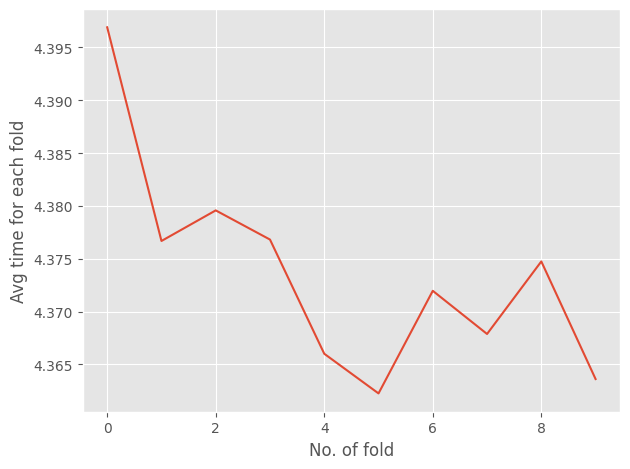

In [19]:
import matplotlib.pyplot as plt

times_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(times_cnn_svm):
    times_cnn_svm_n[i, :len(row)] = row

times_cnn_svm_n_n = np.mean(times_cnn_svm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_cnn_svm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("cnn_svm times")
plt.show()

In [20]:
train_acc_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_cnn_svm):
    train_acc_cnn_svm_n[i, :len(row)] = row
    
test_acc_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_cnn_svm):
    test_acc_cnn_svm_n[i, :len(row)] = row
    
train_loss_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_cnn_svm):
    train_loss_cnn_svm_n[i, :len(row)] = row
    
test_loss_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_cnn_svm):
    test_loss_cnn_svm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_cnn_svm_n = np.mean(train_acc_cnn_svm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_cnn_svm_n = np.mean(test_acc_cnn_svm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_cnn_svm_n = np.mean(train_loss_cnn_svm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_cnn_svm_n = np.mean(test_loss_cnn_svm_n,axis=0)

In [21]:
train_acc_cnn_svm_n.shape

(100,)

In [22]:
train_acc_cnn_svm_n.shape

(100,)

In [23]:
data = [train_acc_cnn_svm_n,test_acc_cnn_svm_n,train_loss_cnn_svm_n,test_loss_cnn_svm_n]

df = pd.DataFrame(data)
df.to_csv('cnn_svm_acc', index=False)
df = pd.read_csv('cnn_svm_acc')

train_acc_cnn_svm_n = df.iloc[0]
test_acc_cnn_svm_n = df.iloc[1]
train_loss_cnn_svm_n = df.iloc[2]
test_loss_cnn_svm_n = df.iloc[3]


df_t = pd.DataFrame([times_cnn_svm_n_n])
df_t.to_csv('cnn_svm_times', index=False)
df_t = pd.read_csv('cnn_svm_times')

times_cnn_svm_n_n = df_t.iloc[0]

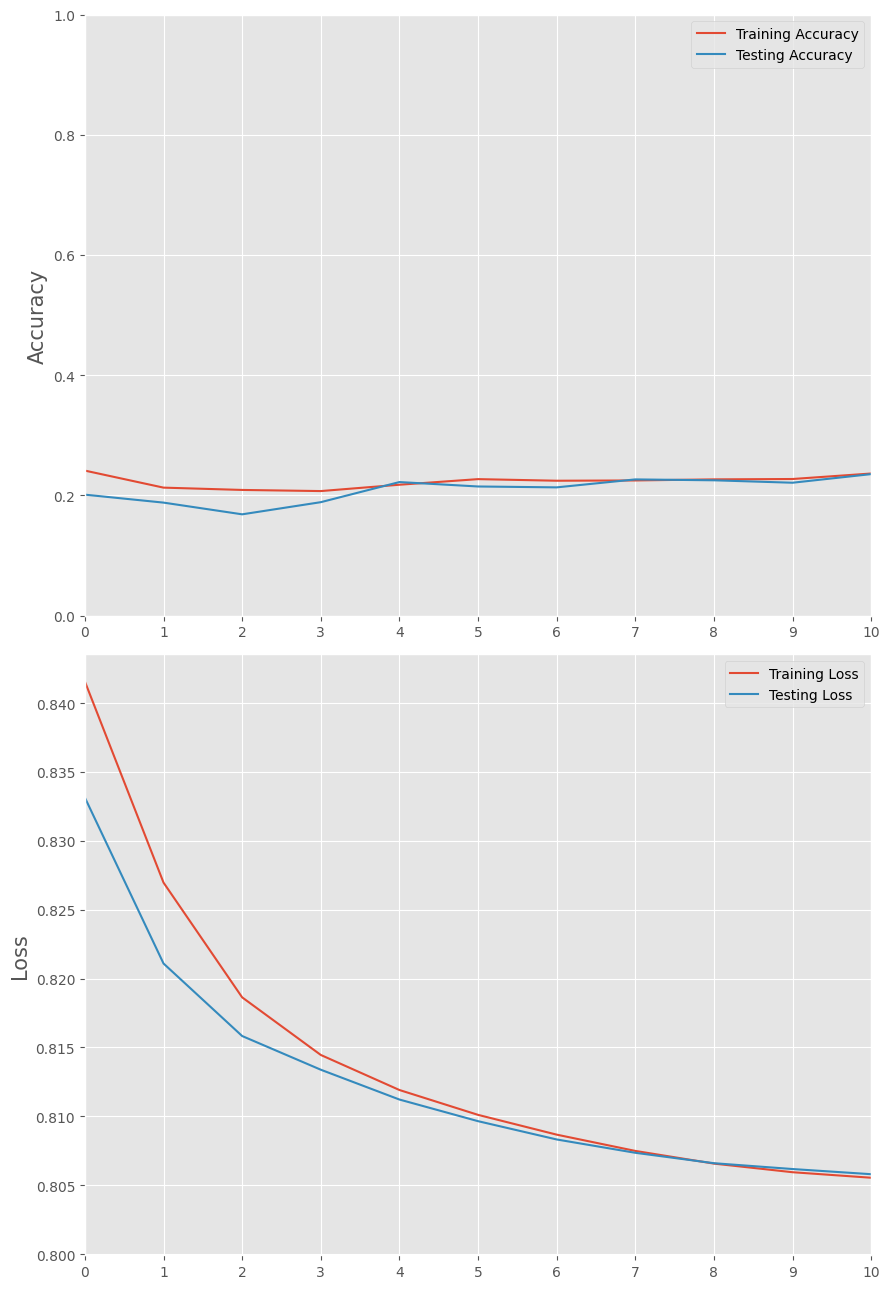

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))
plt.style.use('ggplot')

axs[0].plot(train_acc_cnn_svm_n, label='Training Accuracy')
axs[0].plot(test_acc_cnn_svm_n, label='Testing Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_cnn_svm_n, label='Training Loss')
axs[1].plot(test_loss_cnn_svm_n, label='Testing Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("CNN + SVM Training and Testing Loss")
plt.show()

In [25]:
np.array(scores_cnn_svm).shape

(10, 302, 4)

In [26]:
np.array(y_test_all_cnn_svm).shape

(10, 302)

In [27]:
y_pred_cnn_svm = np.argmax(scores_cnn_svm,axis=2)

In [28]:
y_pred_cnn_svm.shape

(10, 302)

In [29]:
from sklearn.metrics import accuracy_score
acc_scores_cnn_svm = []
for i in range(len(y_test_all_cnn_svm)):
    acc_scores_cnn_svm.append(accuracy_score(y_true = y_test_all_cnn_svm[i],y_pred = y_pred_cnn_svm[i]))

In [30]:
import gc
gc.collect()

90

In [31]:
acc_scores_cnn_svm

[0.12582781456953643,
 0.13245033112582782,
 0.34105960264900664,
 0.23178807947019867,
 0.13245033112582782,
 0.13245033112582782,
 0.34105960264900664,
 0.3841059602649007,
 0.13245033112582782,
 0.3576158940397351]

In [32]:
df_acc = pd.DataFrame([acc_scores_cnn_svm])

df_acc.to_csv('cnn_svm_accuracy', index=False)

df_acc = pd.read_csv('cnn_svm_accuracy')

acc_scores_cnn_svm = df_acc.iloc[0].values

In [33]:
y_test_all_n = np.array(y_test_all_cnn_svm)

y_pred_cnn_svm_n = y_pred_cnn_svm.flatten()
y_test_all_n = y_test_all_n.flatten()

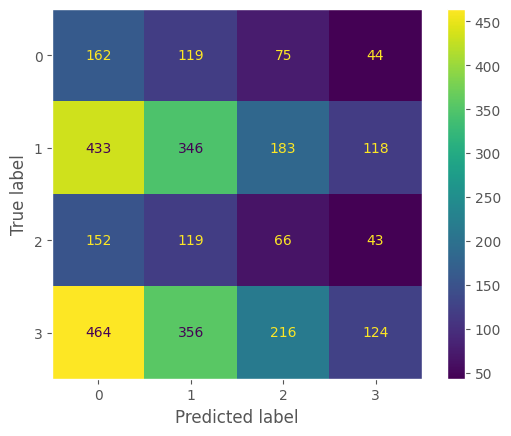

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_cnn_svm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("CNN + SVM")
plt.show()

In [35]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_cnn_svm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.13      0.41      0.20       400
           1       0.37      0.32      0.34      1080
           2       0.12      0.17      0.14       380
           3       0.38      0.11      0.17      1160

    accuracy                           0.23      3020
   macro avg       0.25      0.25      0.21      3020
weighted avg       0.31      0.23      0.23      3020



## CNN + SVM (hyper-para-tuning)

In [ ]:
# ''''
# conv_1_filter: 48
# conv_1_kernel: 3
# conv_2_filter: 64
# conv_2_kernel: 5
# dense_1_units: 32
# lr: 0.0012043751090852965

# ''''

In [ ]:
# import numpy as np
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# X,y = load_data(DATA_PATH)

In [ ]:
# X = X / 255.0

In [ ]:
# X.shape

In [ ]:
# ''''
# def create():
    
#     model_cnn = Sequential()
#     model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X.shape[1],X.shape[2],1))),
#     model.add(MaxPooling2D(pool_size=pool_size ,strides=(1,1),padding ='same')),
#     model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')),
#     model.add(MaxPooling2D(pool_size=pool_size,strides=(1,1),padding ='same')),
#     model.add(Flatten()),
#     model.add(Dense(128, activation='relu')),
#     model.add(Dropout(0.5)),
#     model.add(Dense(4,kernel_regularizer=keras.regularizers.l2(0.01), activation='softmax')),
#     model.compile(optimizer=optimizer, loss='squared_hinge', metrics=['accuracy'])
    
#     return model_cnn

# ''''

In [ ]:
# def build_model(hp):
#     model = keras.Sequential([
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
#         kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
#         activation='relu',
#         input_shape=(259,13,1)
#     ),
    
#     keras.layers.MaxPooling2D(
#         pool_size = (2, 2),
#         strides=(1,1),
#         padding ='same'
#     ),
        
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
#         kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
#         activation='relu'
#     ),
        
#     keras.layers.MaxPooling2D(
#         pool_size = (2,2),
#         strides=(1,1),
#         padding ='same'
#     ),
    
#     keras.layers.Flatten(),
#     keras.layers.Dense(
#         units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
#         activation='relu'
#     ),
#     keras.layers.Dense(4,kernel_regularizer=keras.regularizers.l2(0.01), activation='softmax')
#   ])
  
#     learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
#     model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
#               loss='squared_hinge',
#               metrics=['accuracy'])
  
#     return model

In [ ]:
# from keras_tuner import RandomSearch
# from keras_tuner.engine.hyperparameters import HyperParameters

In [ ]:
# tuner_search=RandomSearch(build_model,
#                           objective='accuracy',
#                           overwrite=True,
#                           max_trials=10,directory='cnn')

In [ ]:
# tuner_search.search(X,y,epochs=2,validation_split=0.2)

In [ ]:
# tuner_search.results_summary()

In [ ]:
# models = tuner_search.get_best_models(num_models=2)

# best_model = models[0]

# best_model.build(input_shape=(259,13,1))

# best_model.summary()

In [ ]:
# def display_cv_results(search_results):
#     print('Best score = {:.4f} using {}'.format(search_results.best_score_, search_results.best_params_))    
    
# # create model
# model = KerasClassifier(build_fn=create_cnn_model, verbose=1)
# # define parameters and values for grid search 
# param_grid = {
#     'filters': [16, 32, 64],
#     'kernel_size': [(3, 3), (5, 5)],
#     'pool_size': [(2, 2), (3, 3)],
#     'activation': ['relu', 'sigmoid'],
#     'optimizer': ['adam', 'SGD'],
#     'batch_size': [16, 32, 64],
# }
# grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=cv)
# grid_result = grid.fit(X, y)  # fit the full dataset as we are using cross validation 

# # print out results
# print('time for grid search = {:.0f} sec'.format(time()-start))
# display_cv_results(grid_result)

# XGboost

In [101]:
import gc
gc.collect()

6255

In [102]:
import gc
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_xg = []
times_xg = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    xg = XGBClassifier()
    
    start_time = time.time()
    
    xg.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = xg.predict(X_test)
    scores_xg.append(x)
    times_xg.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [103]:
times_xg

[276.4724540710449,
 281.2299175262451,
 281.49973607063293,
 281.2994022369385,
 283.0673797130585,
 282.6252484321594,
 281.004985332489,
 284.2784571647644,
 279.37009167671204,
 281.58044505119324]

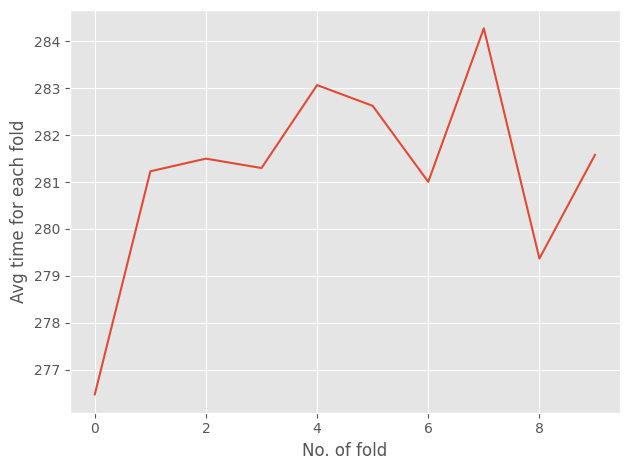

In [104]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.plot(times_xg)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("xg times")
plt.show()

In [105]:
import gc
gc.collect()

3579

In [106]:
from sklearn.metrics import accuracy_score
acc_scores_xg = []
for i in range(len(y_test_all)):
    acc_scores_xg.append(accuracy_score(y_test_all[i],scores_xg[i]))

In [107]:
acc_scores_xg

[0.7152317880794702,
 0.6788079470198676,
 0.6986754966887417,
 0.6423841059602649,
 0.6589403973509934,
 0.7350993377483444,
 0.6655629139072847,
 0.6556291390728477,
 0.6854304635761589,
 0.6158940397350994]

In [108]:
df_acc = pd.DataFrame([acc_scores_xg])

df_acc.to_csv('xg_accuracy', index=False)

df_acc = pd.read_csv('xg_accuracy')

acc_scores_xg = df_acc.iloc[0].values

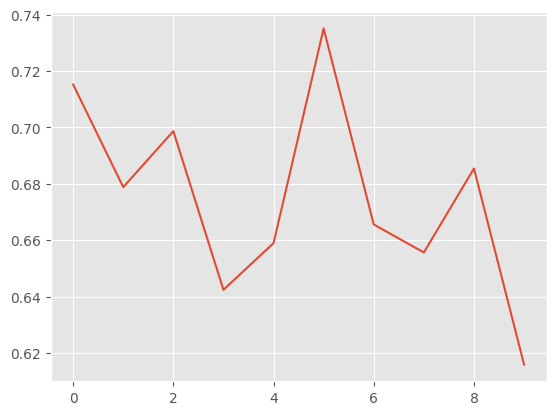

In [109]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_xg)
plt.style.use('ggplot')
plt.savefig("XG boost Acc figures")
plt.show()

In [110]:
scores_xg_n = np.array(scores_xg)
y_test_all_n = np.array(y_test_all)

scores_xg_n = scores_xg_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [111]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_xg_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 67.52%


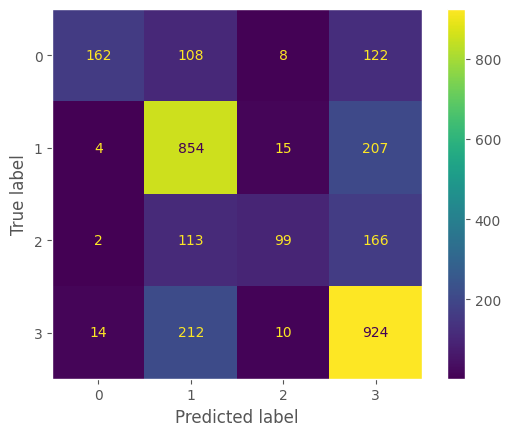

In [112]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_xg_n, labels=xg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xg.classes_)
disp.plot()
plt.grid(False)
plt.savefig("XG Boost")

plt.show()

In [113]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_xg_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.89      0.41      0.56       400
           1       0.66      0.79      0.72      1080
           2       0.75      0.26      0.39       380
           3       0.65      0.80      0.72      1160

    accuracy                           0.68      3020
   macro avg       0.74      0.56      0.60      3020
weighted avg       0.70      0.68      0.66      3020



# Catboost

In [114]:
import gc
gc.collect()

6142

In [115]:
import gc
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_cb = []
times_cb = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.10)
    
    cb = CatBoostClassifier(iterations=100)
    
    start_time = time.time()
    
    cb.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = cb.predict(X_test)
    scores_cb.append(x)
    times_cb.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Learning rate set to 0.5
0:	learn: 1.2691793	total: 3.53s	remaining: 5m 49s
1:	learn: 1.2029348	total: 6s	remaining: 4m 54s
2:	learn: 1.1520393	total: 8.87s	remaining: 4m 46s
3:	learn: 1.1110184	total: 11.6s	remaining: 4m 39s
4:	learn: 1.0849279	total: 14.5s	remaining: 4m 35s
5:	learn: 1.0596693	total: 17.3s	remaining: 4m 30s
6:	learn: 1.0377229	total: 20.1s	remaining: 4m 27s
7:	learn: 1.0151877	total: 23s	remaining: 4m 24s
8:	learn: 0.9855674	total: 25.8s	remaining: 4m 20s
9:	learn: 0.9646725	total: 28.6s	remaining: 4m 17s
10:	learn: 0.9412387	total: 31.3s	remaining: 4m 13s
11:	learn: 0.9195035	total: 34.1s	remaining: 4m 10s
12:	learn: 0.8949397	total: 36.9s	remaining: 4m 6s
13:	learn: 0.8723679	total: 39.7s	remaining: 4m 3s
14:	learn: 0.8462412	total: 42.5s	remaining: 4m
15:	learn: 0.8238258	total: 45.2s	remaining: 3m 57s
16:	learn: 0.8058432	total: 48s	remaining: 3m 54s
17:	learn: 0.7757161	total: 50.9s	remaining: 3m 51s
18:	learn: 0.7492745	total: 53.7s	rem

56:	learn: 0.2989514	total: 2m 39s	remaining: 2m
57:	learn: 0.2935919	total: 2m 42s	remaining: 1m 57s
58:	learn: 0.2911016	total: 2m 45s	remaining: 1m 55s
59:	learn: 0.2857465	total: 2m 48s	remaining: 1m 52s
60:	learn: 0.2796382	total: 2m 51s	remaining: 1m 49s
61:	learn: 0.2744878	total: 2m 54s	remaining: 1m 46s
62:	learn: 0.2704677	total: 2m 56s	remaining: 1m 43s
63:	learn: 0.2682063	total: 2m 59s	remaining: 1m 41s
64:	learn: 0.2654186	total: 3m 2s	remaining: 1m 38s
65:	learn: 0.2587321	total: 3m 5s	remaining: 1m 35s
66:	learn: 0.2558627	total: 3m 8s	remaining: 1m 32s
67:	learn: 0.2521637	total: 3m 10s	remaining: 1m 29s
68:	learn: 0.2492051	total: 3m 13s	remaining: 1m 27s
69:	learn: 0.2462825	total: 3m 16s	remaining: 1m 24s
70:	learn: 0.2400572	total: 3m 19s	remaining: 1m 21s
71:	learn: 0.2355527	total: 3m 22s	remaining: 1m 18s
72:	learn: 0.2316210	total: 3m 25s	remaining: 1m 15s
73:	learn: 0.2295417	total: 3m 27s	remaining: 1m 13s
74:	learn: 0.2267362	total: 3m 30s	remaining: 1m 10s


12:	learn: 0.8812548	total: 36s	remaining: 4m 1s
13:	learn: 0.8561613	total: 38.8s	remaining: 3m 58s
14:	learn: 0.8372900	total: 41.7s	remaining: 3m 56s
15:	learn: 0.8173926	total: 44.5s	remaining: 3m 53s
16:	learn: 0.8020108	total: 47.3s	remaining: 3m 50s
17:	learn: 0.7789539	total: 50s	remaining: 3m 47s
18:	learn: 0.7554887	total: 52.9s	remaining: 3m 45s
19:	learn: 0.7305445	total: 55.7s	remaining: 3m 42s
20:	learn: 0.7139448	total: 58.6s	remaining: 3m 40s
21:	learn: 0.6895274	total: 1m 1s	remaining: 3m 37s
22:	learn: 0.6737882	total: 1m 4s	remaining: 3m 34s
23:	learn: 0.6527550	total: 1m 6s	remaining: 3m 32s
24:	learn: 0.6352120	total: 1m 9s	remaining: 3m 29s
25:	learn: 0.6208834	total: 1m 12s	remaining: 3m 26s
26:	learn: 0.6039221	total: 1m 15s	remaining: 3m 23s
27:	learn: 0.5895833	total: 1m 18s	remaining: 3m 21s
28:	learn: 0.5772325	total: 1m 21s	remaining: 3m 18s
29:	learn: 0.5644444	total: 1m 23s	remaining: 3m 15s
30:	learn: 0.5560819	total: 1m 26s	remaining: 3m 13s
31:	learn: 

69:	learn: 0.2578019	total: 3m 16s	remaining: 1m 24s
70:	learn: 0.2561818	total: 3m 18s	remaining: 1m 21s
71:	learn: 0.2510736	total: 3m 21s	remaining: 1m 18s
72:	learn: 0.2460067	total: 3m 24s	remaining: 1m 15s
73:	learn: 0.2435300	total: 3m 27s	remaining: 1m 12s
74:	learn: 0.2391110	total: 3m 30s	remaining: 1m 10s
75:	learn: 0.2341366	total: 3m 32s	remaining: 1m 7s
76:	learn: 0.2292411	total: 3m 35s	remaining: 1m 4s
77:	learn: 0.2278108	total: 3m 38s	remaining: 1m 1s
78:	learn: 0.2213086	total: 3m 41s	remaining: 58.8s
79:	learn: 0.2168247	total: 3m 44s	remaining: 56s
80:	learn: 0.2141746	total: 3m 46s	remaining: 53.2s
81:	learn: 0.2115642	total: 3m 49s	remaining: 50.4s
82:	learn: 0.2092608	total: 3m 52s	remaining: 47.6s
83:	learn: 0.2071054	total: 3m 55s	remaining: 44.8s
84:	learn: 0.2049936	total: 3m 58s	remaining: 42s
85:	learn: 0.2020615	total: 4m	remaining: 39.2s
86:	learn: 0.2004372	total: 4m 3s	remaining: 36.4s
87:	learn: 0.1990991	total: 4m 6s	remaining: 33.6s
88:	learn: 0.194

26:	learn: 0.6001119	total: 1m 15s	remaining: 3m 23s
27:	learn: 0.5800682	total: 1m 18s	remaining: 3m 20s
28:	learn: 0.5677722	total: 1m 20s	remaining: 3m 17s
29:	learn: 0.5532808	total: 1m 23s	remaining: 3m 15s
30:	learn: 0.5350690	total: 1m 26s	remaining: 3m 12s
31:	learn: 0.5183482	total: 1m 29s	remaining: 3m 9s
32:	learn: 0.5084413	total: 1m 32s	remaining: 3m 7s
33:	learn: 0.4917317	total: 1m 35s	remaining: 3m 4s
34:	learn: 0.4833835	total: 1m 37s	remaining: 3m 1s
35:	learn: 0.4750848	total: 1m 40s	remaining: 2m 59s
36:	learn: 0.4628472	total: 1m 43s	remaining: 2m 56s
37:	learn: 0.4508421	total: 1m 46s	remaining: 2m 53s
38:	learn: 0.4446384	total: 1m 49s	remaining: 2m 50s
39:	learn: 0.4351701	total: 1m 51s	remaining: 2m 47s
40:	learn: 0.4249132	total: 1m 54s	remaining: 2m 45s
41:	learn: 0.4149499	total: 1m 57s	remaining: 2m 42s
42:	learn: 0.4092010	total: 2m	remaining: 2m 39s
43:	learn: 0.3948446	total: 2m 3s	remaining: 2m 36s
44:	learn: 0.3882733	total: 2m 5s	remaining: 2m 33s
45:

83:	learn: 0.2096772	total: 3m 55s	remaining: 44.8s
84:	learn: 0.2068633	total: 3m 58s	remaining: 42s
85:	learn: 0.2041198	total: 4m	remaining: 39.2s
86:	learn: 0.2015419	total: 4m 3s	remaining: 36.4s
87:	learn: 0.1980139	total: 4m 6s	remaining: 33.6s
88:	learn: 0.1960751	total: 4m 9s	remaining: 30.8s
89:	learn: 0.1937640	total: 4m 12s	remaining: 28s
90:	learn: 0.1909473	total: 4m 14s	remaining: 25.2s
91:	learn: 0.1889958	total: 4m 17s	remaining: 22.4s
92:	learn: 0.1861038	total: 4m 20s	remaining: 19.6s
93:	learn: 0.1827206	total: 4m 23s	remaining: 16.8s
94:	learn: 0.1807889	total: 4m 26s	remaining: 14s
95:	learn: 0.1780544	total: 4m 29s	remaining: 11.2s
96:	learn: 0.1751805	total: 4m 31s	remaining: 8.41s
97:	learn: 0.1726292	total: 4m 34s	remaining: 5.6s
98:	learn: 0.1696991	total: 4m 37s	remaining: 2.8s
99:	learn: 0.1675391	total: 4m 40s	remaining: 0us
Training on fold 9/10...
Learning rate set to 0.5
0:	learn: 1.2615803	total: 3.02s	remaining: 4m 59s
1:	learn: 1.1908224	total: 5.83s

39:	learn: 0.4344801	total: 2m 3s	remaining: 3m 5s
40:	learn: 0.4215405	total: 2m 6s	remaining: 3m 1s
41:	learn: 0.4127299	total: 2m 9s	remaining: 2m 58s
42:	learn: 0.4026620	total: 2m 12s	remaining: 2m 55s
43:	learn: 0.3923089	total: 2m 15s	remaining: 2m 52s
44:	learn: 0.3847500	total: 2m 18s	remaining: 2m 49s
45:	learn: 0.3741498	total: 2m 21s	remaining: 2m 46s
46:	learn: 0.3670725	total: 2m 24s	remaining: 2m 43s
47:	learn: 0.3552491	total: 2m 28s	remaining: 2m 40s
48:	learn: 0.3493725	total: 2m 31s	remaining: 2m 37s
49:	learn: 0.3455912	total: 2m 34s	remaining: 2m 34s
50:	learn: 0.3408951	total: 2m 37s	remaining: 2m 31s
51:	learn: 0.3307834	total: 2m 40s	remaining: 2m 28s
52:	learn: 0.3269144	total: 2m 43s	remaining: 2m 24s
53:	learn: 0.3216401	total: 2m 46s	remaining: 2m 21s
54:	learn: 0.3115361	total: 2m 49s	remaining: 2m 18s
55:	learn: 0.3083368	total: 2m 52s	remaining: 2m 15s
56:	learn: 0.3012467	total: 2m 55s	remaining: 2m 12s
57:	learn: 0.2972676	total: 2m 58s	remaining: 2m 9s

In [116]:
times_cb

[298.4196002483368,
 292.9383370876312,
 297.0302839279175,
 299.738650560379,
 295.00636196136475,
 298.99137687683105,
 298.982794046402,
 296.6976249217987,
 300.317831993103,
 325.9518892765045]

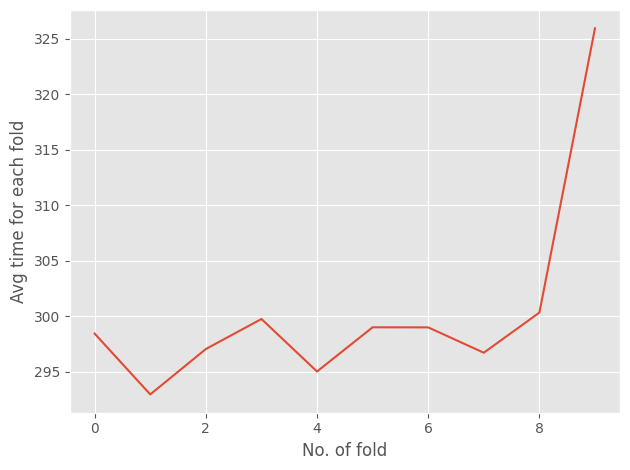

In [117]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.plot(times_cb)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("cb times")
plt.show()

In [118]:
from sklearn.metrics import accuracy_score
acc_scores_cb = []
for i in range(len(y_test_all)):
    acc_scores_cb.append(accuracy_score(y_test_all[i],scores_cb[i]))

In [119]:
acc_scores_cb

[0.6655629139072847,
 0.5894039735099338,
 0.5993377483443708,
 0.6125827814569537,
 0.6125827814569537,
 0.6158940397350994,
 0.6192052980132451,
 0.609271523178808,
 0.5894039735099338,
 0.6059602649006622]

In [120]:
df_acc = pd.DataFrame([acc_scores_cb])

df_acc.to_csv('cb_accuracy', index=False)

df_acc = pd.read_csv('cb_accuracy')

acc_scores_cb = df_acc.iloc[0].values

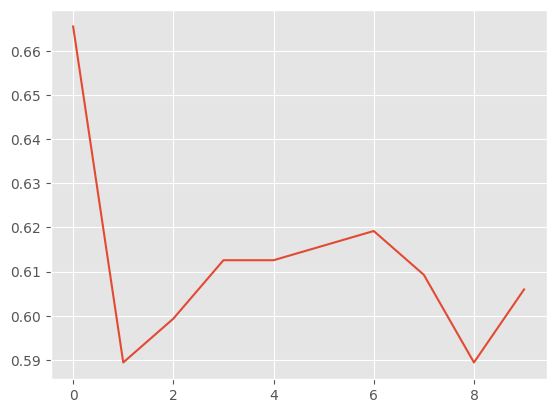

In [121]:
# import seaborn as sns
# sns.histplot(data=acc_scores,bins=20, kde=True)
import matplotlib.pyplot as plt
plt.plot(acc_scores_cb)
plt.style.use('ggplot')
plt.savefig("Catboost acc scores")
plt.show()

In [122]:
scores_cb_n = np.array(scores_cb)
y_test_all_n = np.array(y_test_all)

scores_cb_n = scores_cb_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [123]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_cb_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 61.19%


In [124]:
import gc
gc.collect()

3544

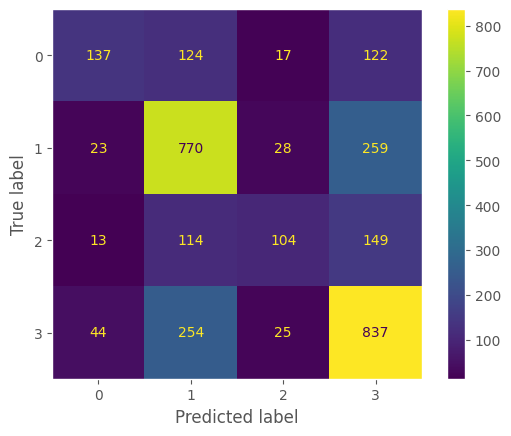

In [125]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_cb_n, labels=cb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cb.classes_)
disp.plot()
plt.grid(False)
plt.savefig("Catboost")

plt.show()

In [126]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_cb_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.63      0.34      0.44       400
           1       0.61      0.71      0.66      1080
           2       0.60      0.27      0.38       380
           3       0.61      0.72      0.66      1160

    accuracy                           0.61      3020
   macro avg       0.61      0.51      0.53      3020
weighted avg       0.61      0.61      0.60      3020



In [127]:
times_svm_n = [i/60 for i in times_svm]
times_dtc_n = [i/60 for i in times_dtc]
times_rdf_n = [i/60 for i in times_rdf]
times_knn_n = [i/60 for i in times_knn]
times_nb_n = [i/60 for i in times_nb]
times_xg_n = [i/60 for i in times_xg]
times_cb_n = [i/60 for i in times_cb]

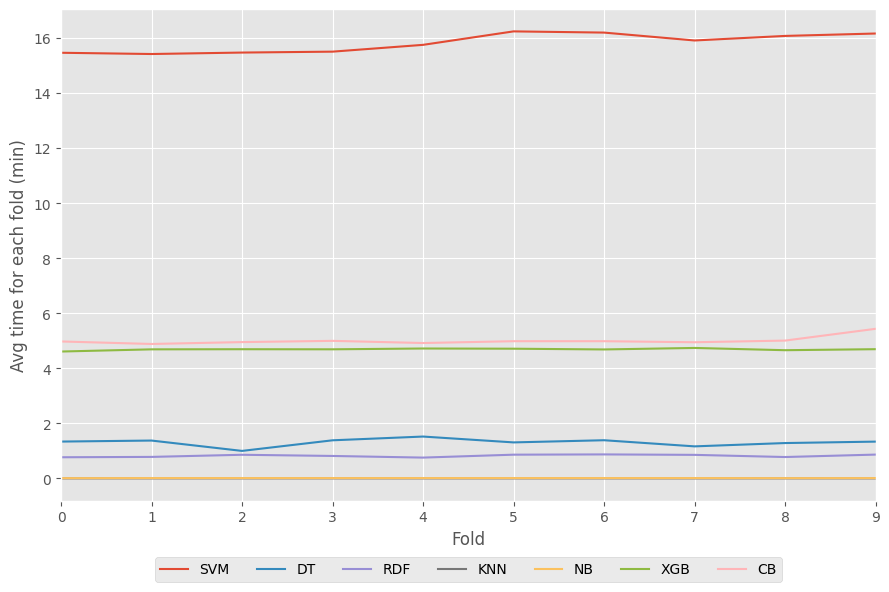

In [128]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(9,6))
plt.plot(times_svm_n,label='SVM')
plt.plot(times_dtc_n,label='DT')
plt.plot(times_rdf_n,label='RDF')
plt.plot(times_knn_n,label='KNN')
plt.plot(times_nb_n,label='NB')
plt.plot(times_xg_n,label='XGB')
plt.plot(times_cb_n,label='CB')

plt.xlabel("Fold")
plt.ylabel("Avg time for each fold (min)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=7)
plt.xlim([0,9])
plt.tight_layout()
plt.savefig("Machine Learning Melspec Times")
plt.show()

In [129]:
acc_scores_svm_n = [i*100 for i in acc_scores_svm]
acc_scores_dtc_n = [i*100 for i in acc_scores_dtc]
acc_scores_rdf_n = [i*100 for i in acc_scores_rdf]
acc_scores_knn_n = [i*100 for i in acc_scores_knn]
acc_scores_nb_n = [i*100 for i in acc_scores_nb]
acc_scores_xg_n = [i*100 for i in acc_scores_xg]
acc_scores_cb_n = [i*100 for i in acc_scores_cb]

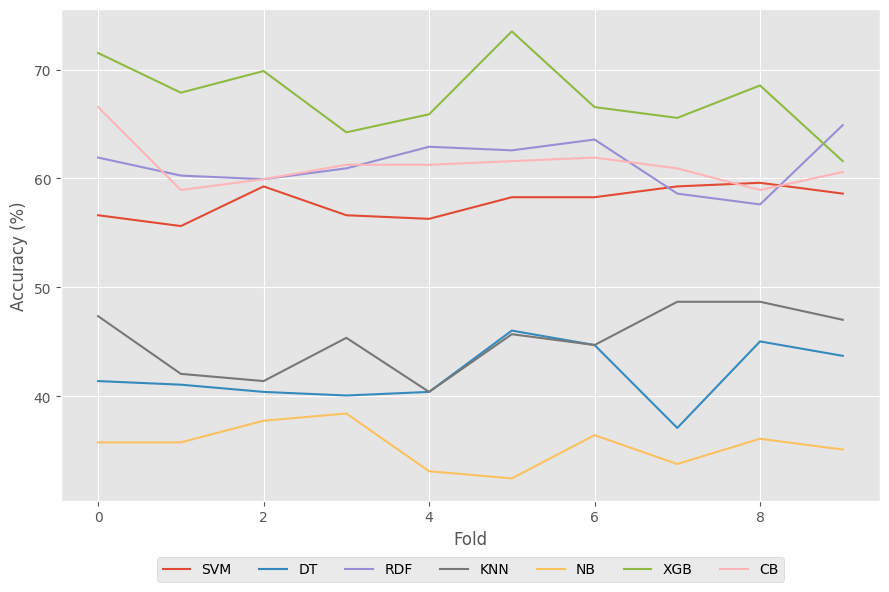

In [130]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(9,6))
plt.plot(acc_scores_svm_n,label='SVM')
plt.plot(acc_scores_dtc_n,label='DT')
plt.plot(acc_scores_rdf_n,label='RDF')
plt.plot(acc_scores_knn_n,label='KNN')
plt.plot(acc_scores_nb_n,label='NB')
plt.plot(acc_scores_xg_n,label='XGB')
plt.plot(acc_scores_cb_n,label='CB')

plt.xlabel("Fold")
plt.ylabel("Accuracy (%)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),ncol=7)
plt.tight_layout()
plt.savefig("Machine Learning Melspec Accuracy")
plt.show()

# LSTM

In [36]:
import gc
gc.collect()

15

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout , LSTM

In [39]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_lstm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_lstm.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=17, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 10, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [40]:
def create_model_lstm():
    
    model_lstm = keras.Sequential([

        keras.layers.LSTM(256,activation='tanh',input_shape=(X.shape[1],X.shape[2]),return_sequences=True),
        keras.layers.Dropout(0.25),

        keras.layers.LSTM(128,activation='tanh',return_sequences=True),
        keras.layers.Dropout(0.25),

        keras.layers.LSTM(64,activation='tanh'),
        keras.layers.Dropout(0.25),

        keras.layers.Dense(4,activation='softmax')

    ])
    
    return model_lstm

In [41]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_lstm = []
y_test_all_lstm = []
train_acc_lstm = []
test_acc_lstm = []
train_loss_lstm = []
test_loss_lstm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_lstm.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_lstm = None
    model_lstm = create_model_lstm()
        
    model_lstm.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_lstm.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_lstm.predict(X_test)
    
    scores_lstm.append(x)
    train_acc_lstm.append(history.history["accuracy"])
    test_acc_lstm.append(history.history["val_accuracy"])
    train_loss_lstm.append(history.history["loss"])
    test_loss_lstm.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 7s 62ms/step - loss: 1.2402 - accuracy: 0.4489 - val_loss: 1.1972 - val_accuracy: 0.4816 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 5s 59ms/step - loss: 1.1578 - accuracy: 0.5012 - val_loss: 1.1479 - val_accuracy: 0.5221 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 5s 62ms/step - loss: 1.1075 - accuracy: 0.5368 - val_loss: 1.1621 - val_accuracy: 0.5110 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 56ms/step - loss: 1.2096 - accuracy: 0.4403 - val_loss: 1.2664 - val_accuracy: 0.3640 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 58ms/step - loss: 1.2484 - accuracy: 0.3908 - val_loss: 1.2816 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 5s 59ms/step - loss: 1.2677 - accuracy: 0.3729 - val_loss: 1.2892 - val_accuracy: 0.3493 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Epoch 30/100
77/77 [==============================] - 4s 53ms/step - loss: 1.1481 - accuracy: 0.5368 - val_loss: 1.1637 - val_accuracy: 0.5147 - lr: 4.0000e-05
Epoch 31/100
77/77 [==============================] - 4s 55ms/step - loss: 1.1333 - accuracy: 0.5450 - val_loss: 1.1731 - val_accuracy: 0.5000 - lr: 4.0000e-05
Epoch 32/100
77/77 [==============================] - ETA: 0s - loss: 1.1353 - accuracy: 0.5392
Epoch 32: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 32: 4.16 seconds
77/77 [==============================] - 4s 54ms/step - loss: 1.1353 - accuracy: 0.5392 - val_loss: 1.1602 - val_accuracy: 0.5074 - lr: 4.0000e-05
Epoch 33/100
77/77 [==============================] - 4s 54ms/step - loss: 1.1229 - accuracy: 0.5462 - val_loss: 1.1547 - val_accuracy: 0.5257 - lr: 8.0000e-06
Epoch 34/100
77/77 [==============================] - 4s 53ms/step - loss: 1.1299 - accuracy: 0.5474 - val_loss: 1.1522 - val_accuracy: 0.5221 - lr: 8.0000e-06
Ep

Epoch 59/100
77/77 [==============================] - 4s 57ms/step - loss: 1.1034 - accuracy: 0.5540 - val_loss: 1.1443 - val_accuracy: 0.5294 - lr: 1.6000e-06
Epoch 60/100
77/77 [==============================] - 4s 53ms/step - loss: 1.1037 - accuracy: 0.5556 - val_loss: 1.1433 - val_accuracy: 0.5257 - lr: 1.6000e-06
Epoch 61/100
77/77 [==============================] - 4s 58ms/step - loss: 1.1031 - accuracy: 0.5548 - val_loss: 1.1436 - val_accuracy: 0.5294 - lr: 1.6000e-06
Epoch 62/100
77/77 [==============================] - 4s 55ms/step - loss: 1.1025 - accuracy: 0.5560 - val_loss: 1.1433 - val_accuracy: 0.5257 - lr: 1.6000e-06
Epoch 63/100
77/77 [==============================] - 4s 55ms/step - loss: 1.1009 - accuracy: 0.5564 - val_loss: 1.1428 - val_accuracy: 0.5257 - lr: 1.6000e-06
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 1.1031 - accuracy: 0.5581
Epoch 64: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 64: 3.

Epoch 88/100
77/77 [==============================] - 5s 60ms/step - loss: 1.1041 - accuracy: 0.5556 - val_loss: 1.1437 - val_accuracy: 0.5294 - lr: 1.2800e-08
Epoch 89/100
77/77 [==============================] - 5s 59ms/step - loss: 1.1008 - accuracy: 0.5621 - val_loss: 1.1437 - val_accuracy: 0.5294 - lr: 1.2800e-08
Epoch 90/100
77/77 [==============================] - 4s 54ms/step - loss: 1.1033 - accuracy: 0.5556 - val_loss: 1.1437 - val_accuracy: 0.5294 - lr: 1.2800e-08
Epoch 91/100
77/77 [==============================] - 4s 57ms/step - loss: 1.1017 - accuracy: 0.5593 - val_loss: 1.1437 - val_accuracy: 0.5294 - lr: 1.2800e-08
Epoch 92/100
77/77 [==============================] - 5s 59ms/step - loss: 1.1010 - accuracy: 0.5585 - val_loss: 1.1437 - val_accuracy: 0.5294 - lr: 1.2800e-08
Epoch 93/100
77/77 [==============================] - 4s 55ms/step - loss: 1.1015 - accuracy: 0.5581 - val_loss: 1.1437 - val_accuracy: 0.5294 - lr: 1.2800e-08
Epoch 94/100
77/77 [====================

Epoch 17/100
77/77 [==============================] - 5s 59ms/step - loss: 1.2524 - accuracy: 0.4011 - val_loss: 1.2544 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 18/100
77/77 [==============================] - ETA: 0s - loss: 1.2035 - accuracy: 0.4522
Epoch 18: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 18: 4.66 seconds
77/77 [==============================] - 5s 60ms/step - loss: 1.2035 - accuracy: 0.4522 - val_loss: 1.1514 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 19/100
77/77 [==============================] - 5s 63ms/step - loss: 1.1484 - accuracy: 0.5102 - val_loss: 1.1344 - val_accuracy: 0.5147 - lr: 2.0000e-04
Epoch 20/100
77/77 [==============================] - 4s 58ms/step - loss: 1.1990 - accuracy: 0.4530 - val_loss: 1.2905 - val_accuracy: 0.3713 - lr: 2.0000e-04
Epoch 21/100
77/77 [==============================] - 5s 60ms/step - loss: 1.2181 - accuracy: 0.4072 - val_loss: 1.2657 - val_accuracy: 0.3787 - lr: 2.0000e-04
Epoch 22/

Epoch 46/100
77/77 [==============================] - 5s 64ms/step - loss: 0.9764 - accuracy: 0.5769 - val_loss: 1.0659 - val_accuracy: 0.5515 - lr: 8.0000e-06
Epoch 47/100
77/77 [==============================] - 5s 60ms/step - loss: 0.9715 - accuracy: 0.5936 - val_loss: 1.0658 - val_accuracy: 0.5551 - lr: 8.0000e-06
Epoch 48/100
76/77 [============================>.] - ETA: 0s - loss: 0.9696 - accuracy: 0.5826
Epoch 48: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 48: 4.53 seconds
77/77 [==============================] - 5s 59ms/step - loss: 0.9688 - accuracy: 0.5826 - val_loss: 1.0595 - val_accuracy: 0.5588 - lr: 8.0000e-06
Epoch 49/100
77/77 [==============================] - 5s 60ms/step - loss: 0.9691 - accuracy: 0.5765 - val_loss: 1.0586 - val_accuracy: 0.5551 - lr: 1.6000e-06
Epoch 50/100
77/77 [==============================] - 5s 65ms/step - loss: 0.9702 - accuracy: 0.5871 - val_loss: 1.0578 - val_accuracy: 0.5551 - lr: 1.6000e-06
E

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [42]:
import gc
gc.collect()

In [43]:
import matplotlib.pyplot as plt

times_lstm_n = np.zeros((10,100))
for i, row in enumerate(times_lstm):
    times_lstm_n[i, :len(row)] = row

times_lstm_n_n = np.mean(times_lstm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_lstm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("lstm times")
plt.show()

In [44]:
train_acc_lstm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_lstm):
    train_acc_lstm_n[i, :len(row)] = row
    
test_acc_lstm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_lstm):
    test_acc_lstm_n[i, :len(row)] = row
    
train_loss_lstm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_lstm):
    train_loss_lstm_n[i, :len(row)] = row
    
test_loss_lstm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_lstm):
    test_loss_lstm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_lstm_n = np.mean(train_acc_lstm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_lstm_n = np.mean(test_acc_lstm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_lstm_n = np.mean(train_loss_lstm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_lstm_n = np.mean(test_loss_lstm_n,axis=0)

In [45]:
data = [train_acc_lstm_n,test_acc_lstm_n,train_loss_lstm_n,test_loss_lstm_n]

df = pd.DataFrame(data)
df.to_csv('lstm_acc', index=False)
df = pd.read_csv('lstm_acc')

train_acc_lstm_n = df.iloc[0]
test_acc_lstm_n = df.iloc[1]
train_loss_lstm_n = df.iloc[2]
test_loss_lstm_n = df.iloc[3]


df_t = pd.DataFrame([times_lstm_n_n])
df_t.to_csv('lstm_times', index=False)
df_t = pd.read_csv('lstm_times')

times_lstm_n_n = df_t.iloc[0]

In [46]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_lstm_n, label='Training Accuracy')
axs[0].plot(test_acc_lstm_n, label='Testing Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_lstm_n, label='Training Loss')
axs[1].plot(test_loss_lstm_n, label='Testing Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("LSTM Training and Testing Loss")
plt.show()

In [47]:
np.array(scores_lstm).shape

In [48]:
np.array(y_test_all_lstm).shape

In [49]:
y_pred_lstm = np.argmax(scores_lstm,axis=2)

In [50]:
y_pred_lstm.shape

In [51]:
from sklearn.metrics import accuracy_score
acc_scores_lstm = []
for i in range(len(y_test_all_lstm)):
    acc_scores_lstm.append(accuracy_score(y_true = y_test_all_lstm[i],y_pred = y_pred_lstm[i]))

In [52]:
acc_scores_lstm

In [53]:
df_acc = pd.DataFrame([acc_scores_lstm])

df_acc.to_csv('lstm_accuracy', index=False)

df_acc = pd.read_csv('lstm_accuracy')

acc_scores_lstm = df_acc.iloc[0].values

In [54]:
y_test_all_n = np.array(y_test_all_lstm)

y_pred_lstm_n = y_pred_lstm.flatten()
y_test_all_n = y_test_all_n.flatten()

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n,y_pred_lstm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("LSTM")

plt.show()

In [56]:
import gc
gc.collect()

In [57]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n,y_pred_lstm_n)
print(cf_r)

# BISLTM

In [58]:
import gc
gc.collect()

In [59]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_bilstm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_bilstm.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 5, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [60]:
from keras.layers import LSTM

In [61]:
def create_model_bilstm():
    
    model_bilstm = keras.Sequential([

        keras.layers.Bidirectional(LSTM(100,return_sequences=True),input_shape=(X.shape[1],X.shape[2])),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(LSTM(100,return_sequences=True)),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(LSTM(100)),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(4,activation='softmax')

    ])
    
    return model_bilstm

In [62]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_bilstm = []
y_test_all_bilstm = []
train_acc_bilstm = []
test_acc_bilstm = []
train_loss_bilstm = []
test_loss_bilstm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_bilstm.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_bilstm = None
    model_bilstm = create_model_bilstm()
        
    model_bilstm.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_bilstm.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=64, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_bilstm.predict(X_test)
    
    scores_bilstm.append(x)
    train_acc_bilstm.append(history.history["accuracy"])
    test_acc_bilstm.append(history.history["val_accuracy"])
    train_loss_bilstm.append(history.history["loss"])
    test_loss_bilstm.append(history.history["val_loss"])
    
    gc.collect()

In [63]:
import gc
gc.collect()

In [64]:
import matplotlib.pyplot as plt

times_bilstm_n = np.zeros((10,100))
for i, row in enumerate(times_bilstm):
    times_bilstm_n[i, :len(row)] = row

times_bilstm_n_n = np.mean(times_bilstm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_bilstm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("bilstm times")
plt.show()

In [65]:
train_acc_bilstm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_bilstm):
    train_acc_bilstm_n[i, :len(row)] = row
    
test_acc_bilstm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_bilstm):
    test_acc_bilstm_n[i, :len(row)] = row
    
train_loss_bilstm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_bilstm):
    train_loss_bilstm_n[i, :len(row)] = row
    
test_loss_bilstm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_bilstm):
    test_loss_bilstm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_bilstm_n = np.mean(train_acc_bilstm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_bilstm_n = np.mean(test_acc_bilstm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_bilstm_n = np.mean(train_loss_bilstm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_bilstm_n = np.mean(test_loss_bilstm_n,axis=0)

In [66]:
train_acc_bilstm_n

In [67]:
data = [train_acc_bilstm_n,test_acc_bilstm_n,train_loss_bilstm_n,test_loss_bilstm_n]

df = pd.DataFrame(data)
df.to_csv('bilstm_acc', index=False)
df = pd.read_csv('bilstm_acc')

train_acc_bilstm_n = df.iloc[0]
test_acc_bilstm_n = df.iloc[1]
train_loss_bilstm_n = df.iloc[2]
test_loss_bilstm_n = df.iloc[3]


df_t = pd.DataFrame([times_bilstm_n_n])
df_t.to_csv('bilstm_times', index=False)
df_t = pd.read_csv('bilstm_times')

times_bilstm_n_n = df_t.iloc[0]

In [68]:
train_acc_bilstm_n

In [69]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_bilstm_n, label='Training Accuracy')
axs[0].plot(test_acc_bilstm_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_bilstm_n, label='Training Loss')
axs[1].plot(test_loss_bilstm_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("BILSTM Training and Testing Loss")
plt.show()

In [70]:
np.array(scores_bilstm).shape

In [71]:
np.array(y_test_all_bilstm).shape

In [72]:
y_pred_bilstm = np.argmax(scores_bilstm,axis=2)

In [73]:
y_pred_bilstm.shape

In [74]:
from sklearn.metrics import accuracy_score
acc_scores_bilstm = []
for i in range(len(y_test_all_bilstm)):
    acc_scores_bilstm.append(accuracy_score(y_true = y_test_all_bilstm[i],y_pred = y_pred_bilstm[i]))

In [75]:
acc_scores_bilstm

In [76]:
df_acc = pd.DataFrame([acc_scores_bilstm])

df_acc.to_csv('bilstm_accuracy', index=False)

df_acc = pd.read_csv('bilstm_accuracy')

acc_scores_bilstm = df_acc.iloc[0].values

In [77]:
y_test_all_n = np.array(y_test_all_bilstm)

y_pred_bilstm_n = y_pred_bilstm.flatten()
y_test_all_n = y_test_all_n.flatten()

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n,y_pred_bilstm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("BISLTM")

plt.show()

In [79]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n,y_pred_bilstm_n)
print(cf_r)

# BRNN

In [9]:
import gc
gc.collect()

0

In [10]:
# X,y = load_data(DATA_PATH)

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, SimpleRNN, Dense
from tensorflow.keras.models import Sequential

In [12]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_birnn = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_birnn.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [13]:
def create_model_birnn():

    model_birnn = keras.Sequential([

        keras.layers.Bidirectional(SimpleRNN(256,return_sequences=True),input_shape=(X.shape[1],X.shape[2])),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(SimpleRNN(128,return_sequences=True)),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(SimpleRNN(64)),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(units = 4,activation='softmax')

    ])
    return model_birnn

In [14]:
import gc
gc.collect()

0

In [15]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_birnn = []
y_test_all_birnn = []
train_acc_birnn = []
test_acc_birnn = []
train_loss_birnn = []
test_loss_birnn = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_birnn.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_birnn = None
    model_birnn = create_model_birnn()
        
    model_birnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_birnn.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=64, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_birnn.predict(X_test)
    
    scores_birnn.append(x)
    train_acc_birnn.append(history.history["accuracy"])
    test_acc_birnn.append(history.history["val_accuracy"])
    train_loss_birnn.append(history.history["loss"])
    test_loss_birnn.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
39/39 [==============================] - 38s 881ms/step - loss: 1.7263 - accuracy: 0.3418 - val_loss: 1.4923 - val_accuracy: 0.3309 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 34s 880ms/step - loss: 1.6741 - accuracy: 0.3434 - val_loss: 1.3579 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 34s 875ms/step - loss: 1.6006 - accuracy: 0.3217 - val_loss: 1.3524 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 33s 854ms/step - loss: 1.5640 - accuracy: 0.3590 - val_loss: 1.3748 - val_accuracy: 0.3493 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 35s 892ms/step - loss: 1.5236 - accuracy: 0.3487 - val_loss: 1.3781 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - 35s 913ms/step - loss: 1.4652 - accuracy: 0.3724 - val_loss: 1.2923 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 7/100
39/39 [==============

Epoch 30/100
39/39 [==============================] - 35s 903ms/step - loss: 1.2311 - accuracy: 0.4563 - val_loss: 1.2675 - val_accuracy: 0.4375 - lr: 4.0000e-05
Epoch 31/100
39/39 [==============================] - 36s 927ms/step - loss: 1.2276 - accuracy: 0.4628 - val_loss: 1.2655 - val_accuracy: 0.4412 - lr: 4.0000e-05
Epoch 32/100
39/39 [==============================] - 34s 877ms/step - loss: 1.2326 - accuracy: 0.4554 - val_loss: 1.2526 - val_accuracy: 0.4228 - lr: 4.0000e-05
Epoch 33/100
39/39 [==============================] - 35s 885ms/step - loss: 1.2408 - accuracy: 0.4452 - val_loss: 1.2667 - val_accuracy: 0.4485 - lr: 4.0000e-05
Epoch 34/100
39/39 [==============================] - ETA: 0s - loss: 1.2263 - accuracy: 0.4612
Epoch 34: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 34: 33.84 seconds
39/39 [==============================] - 34s 871ms/step - loss: 1.2263 - accuracy: 0.4612 - val_loss: 1.3165 - val_accuracy: 0.4118 - lr: 4.

Epoch 58/100
39/39 [==============================] - 33s 853ms/step - loss: 1.2218 - accuracy: 0.4669 - val_loss: 1.2739 - val_accuracy: 0.4375 - lr: 6.4000e-08
Epoch 59/100
39/39 [==============================] - 33s 855ms/step - loss: 1.2239 - accuracy: 0.4567 - val_loss: 1.2739 - val_accuracy: 0.4375 - lr: 6.4000e-08
Epoch 60/100
39/39 [==============================] - 34s 878ms/step - loss: 1.2240 - accuracy: 0.4567 - val_loss: 1.2739 - val_accuracy: 0.4375 - lr: 6.4000e-08
Epoch 61/100
39/39 [==============================] - 36s 933ms/step - loss: 1.2280 - accuracy: 0.4644 - val_loss: 1.2739 - val_accuracy: 0.4375 - lr: 6.4000e-08
Epoch 62/100
39/39 [==============================] - ETA: 0s - loss: 1.2310 - accuracy: 0.4530
Epoch 62: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 62: 35.46 seconds
39/39 [==============================] - 35s 908ms/step - loss: 1.2310 - accuracy: 0.4530 - val_loss: 1.2739 - val_accuracy: 0.4375 - lr: 6

Epoch 86/100
39/39 [==============================] - 34s 878ms/step - loss: 1.2266 - accuracy: 0.4624 - val_loss: 1.2739 - val_accuracy: 0.4375 - lr: 1.0240e-10
Epoch 87/100
39/39 [==============================] - 36s 927ms/step - loss: 1.2274 - accuracy: 0.4665 - val_loss: 1.2739 - val_accuracy: 0.4375 - lr: 1.0240e-10
Epoch 88/100
39/39 [==============================] - 33s 851ms/step - loss: 1.2170 - accuracy: 0.4710 - val_loss: 1.2739 - val_accuracy: 0.4375 - lr: 1.0240e-10
Epoch 89/100
39/39 [==============================] - 35s 898ms/step - loss: 1.2363 - accuracy: 0.4587 - val_loss: 1.2739 - val_accuracy: 0.4375 - lr: 1.0240e-10
Epoch 90/100
39/39 [==============================] - ETA: 0s - loss: 1.2243 - accuracy: 0.4661
Epoch 90: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 90: 35.21 seconds
39/39 [==============================] - 35s 905ms/step - loss: 1.2243 - accuracy: 0.4661 - val_loss: 1.2739 - val_accuracy: 0.4375 - lr: 1

39/39 [==============================] - 34s 884ms/step - loss: 1.2855 - accuracy: 0.4150 - val_loss: 1.2596 - val_accuracy: 0.4338 - lr: 2.0000e-04
Epoch 15/100
39/39 [==============================] - 34s 864ms/step - loss: 1.2857 - accuracy: 0.4125 - val_loss: 1.2686 - val_accuracy: 0.4265 - lr: 2.0000e-04
Epoch 16/100
39/39 [==============================] - 33s 836ms/step - loss: 1.2700 - accuracy: 0.4260 - val_loss: 1.2694 - val_accuracy: 0.4449 - lr: 2.0000e-04
Epoch 17/100
39/39 [==============================] - 34s 862ms/step - loss: 1.2638 - accuracy: 0.4330 - val_loss: 1.2801 - val_accuracy: 0.4265 - lr: 2.0000e-04
Epoch 18/100
39/39 [==============================] - 34s 875ms/step - loss: 1.2609 - accuracy: 0.4366 - val_loss: 1.2754 - val_accuracy: 0.4301 - lr: 2.0000e-04
Epoch 19/100
39/39 [==============================] - 33s 839ms/step - loss: 1.2505 - accuracy: 0.4452 - val_loss: 1.2715 - val_accuracy: 0.4338 - lr: 2.0000e-04
Epoch 20/100
39/39 [=====================

Epoch 70/100
39/39 [==============================] - 35s 903ms/step - loss: 1.2252 - accuracy: 0.4857 - val_loss: 1.2700 - val_accuracy: 0.4485 - lr: 2.5600e-09
Epoch 71/100
39/39 [==============================] - 35s 901ms/step - loss: 1.2194 - accuracy: 0.4771 - val_loss: 1.2700 - val_accuracy: 0.4485 - lr: 2.5600e-09
Epoch 72/100
39/39 [==============================] - 34s 865ms/step - loss: 1.2147 - accuracy: 0.4734 - val_loss: 1.2700 - val_accuracy: 0.4485 - lr: 2.5600e-09
Epoch 73/100
39/39 [==============================] - 34s 884ms/step - loss: 1.2256 - accuracy: 0.4787 - val_loss: 1.2700 - val_accuracy: 0.4485 - lr: 2.5600e-09
Epoch 74/100
39/39 [==============================] - 33s 848ms/step - loss: 1.2279 - accuracy: 0.4767 - val_loss: 1.2700 - val_accuracy: 0.4485 - lr: 2.5600e-09
Epoch 75/100
39/39 [==============================] - 33s 860ms/step - loss: 1.2231 - accuracy: 0.4685 - val_loss: 1.2700 - val_accuracy: 0.4485 - lr: 2.5600e-09
Epoch 76/100
39/39 [========

Epoch 98/100
39/39 [==============================] - 34s 874ms/step - loss: 1.2217 - accuracy: 0.4661 - val_loss: 1.2700 - val_accuracy: 0.4485 - lr: 4.0960e-12
Epoch 99/100
39/39 [==============================] - 33s 843ms/step - loss: 1.2189 - accuracy: 0.4742 - val_loss: 1.2700 - val_accuracy: 0.4485 - lr: 4.0960e-12
Epoch 100/100
10/10 [==============================] - 2s 124ms/step
Training on fold 3/10...
Epoch 1/100
39/39 [==============================] - 37s 883ms/step - loss: 1.7088 - accuracy: 0.3328 - val_loss: 1.4483 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 35s 900ms/step - loss: 1.6995 - accuracy: 0.3496 - val_loss: 1.2832 - val_accuracy: 0.4007 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 35s 893ms/step - loss: 1.6106 - accuracy: 0.3381 - val_loss: 1.3398 - val_accuracy: 0.4044 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 35s 899ms/step - loss: 1.5715 - accuracy: 0.3500 - val_los

Epoch 54/100
39/39 [==============================] - 35s 888ms/step - loss: 1.2960 - accuracy: 0.3929 - val_loss: 1.2753 - val_accuracy: 0.4449 - lr: 6.4000e-08
Epoch 55/100
39/39 [==============================] - ETA: 0s - loss: 1.3076 - accuracy: 0.4019
Epoch 55: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 55: 33.69 seconds
39/39 [==============================] - 34s 865ms/step - loss: 1.3076 - accuracy: 0.4019 - val_loss: 1.2752 - val_accuracy: 0.4375 - lr: 6.4000e-08
Epoch 56/100
39/39 [==============================] - 33s 853ms/step - loss: 1.3007 - accuracy: 0.4035 - val_loss: 1.2752 - val_accuracy: 0.4375 - lr: 1.2800e-08
Epoch 57/100
39/39 [==============================] - 34s 862ms/step - loss: 1.2776 - accuracy: 0.4260 - val_loss: 1.2752 - val_accuracy: 0.4375 - lr: 1.2800e-08
Epoch 58/100
39/39 [==============================] - 34s 876ms/step - loss: 1.2961 - accuracy: 0.4121 - val_loss: 1.2752 - val_accuracy: 0.4375 - lr: 1

Epoch 82/100
39/39 [==============================] - 36s 920ms/step - loss: 1.2986 - accuracy: 0.4002 - val_loss: 1.2752 - val_accuracy: 0.4375 - lr: 1.0240e-10
Epoch 83/100
39/39 [==============================] - ETA: 0s - loss: 1.2835 - accuracy: 0.4166
Epoch 83: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 83: 34.84 seconds
39/39 [==============================] - 35s 897ms/step - loss: 1.2835 - accuracy: 0.4166 - val_loss: 1.2752 - val_accuracy: 0.4375 - lr: 1.0240e-10
Epoch 84/100
39/39 [==============================] - 36s 911ms/step - loss: 1.2802 - accuracy: 0.4162 - val_loss: 1.2752 - val_accuracy: 0.4375 - lr: 2.0480e-11
Epoch 85/100
39/39 [==============================] - 34s 888ms/step - loss: 1.3112 - accuracy: 0.4109 - val_loss: 1.2752 - val_accuracy: 0.4375 - lr: 2.0480e-11
Epoch 86/100
39/39 [==============================] - 34s 859ms/step - loss: 1.3011 - accuracy: 0.4117 - val_loss: 1.2752 - val_accuracy: 0.4375 - lr: 2

39/39 [==============================] - 32s 833ms/step - loss: 1.3594 - accuracy: 0.3659 - val_loss: 1.2962 - val_accuracy: 0.3419 - lr: 0.0010
Epoch 11/100
39/39 [==============================] - 33s 846ms/step - loss: 1.3388 - accuracy: 0.3769 - val_loss: 1.2884 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 12/100
39/39 [==============================] - 33s 848ms/step - loss: 1.3169 - accuracy: 0.3978 - val_loss: 1.2419 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 13/100
39/39 [==============================] - 33s 859ms/step - loss: 1.2887 - accuracy: 0.4064 - val_loss: 1.2378 - val_accuracy: 0.4596 - lr: 0.0010
Epoch 14/100
39/39 [==============================] - ETA: 0s - loss: 1.2852 - accuracy: 0.4186
Epoch 14: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 14: 34.40 seconds
39/39 [==============================] - 34s 886ms/step - loss: 1.2852 - accuracy: 0.4186 - val_loss: 1.2297 - val_accuracy: 0.4412 - lr: 0.0010
Epoch 15/100
39/39 [===

Epoch 38/100
39/39 [==============================] - 35s 894ms/step - loss: 1.2508 - accuracy: 0.4469 - val_loss: 1.2433 - val_accuracy: 0.4338 - lr: 1.6000e-06
Epoch 39/100
39/39 [==============================] - 34s 883ms/step - loss: 1.2622 - accuracy: 0.4424 - val_loss: 1.2427 - val_accuracy: 0.4338 - lr: 1.6000e-06
Epoch 40/100
39/39 [==============================] - 34s 886ms/step - loss: 1.2575 - accuracy: 0.4440 - val_loss: 1.2422 - val_accuracy: 0.4375 - lr: 1.6000e-06
Epoch 41/100
39/39 [==============================] - 34s 875ms/step - loss: 1.2568 - accuracy: 0.4366 - val_loss: 1.2395 - val_accuracy: 0.4485 - lr: 1.6000e-06
Epoch 42/100
39/39 [==============================] - ETA: 0s - loss: 1.2554 - accuracy: 0.4440
Epoch 42: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 42: 33.55 seconds
39/39 [==============================] - 34s 860ms/step - loss: 1.2554 - accuracy: 0.4440 - val_loss: 1.2380 - val_accuracy: 0.4412 - lr: 1.

Epoch 66/100
39/39 [==============================] - 33s 853ms/step - loss: 1.2631 - accuracy: 0.4415 - val_loss: 1.2383 - val_accuracy: 0.4449 - lr: 2.5600e-09
Epoch 67/100
39/39 [==============================] - 34s 876ms/step - loss: 1.2547 - accuracy: 0.4489 - val_loss: 1.2383 - val_accuracy: 0.4449 - lr: 2.5600e-09
Epoch 68/100
39/39 [==============================] - 33s 846ms/step - loss: 1.2556 - accuracy: 0.4411 - val_loss: 1.2383 - val_accuracy: 0.4449 - lr: 2.5600e-09
Epoch 69/100
39/39 [==============================] - 35s 888ms/step - loss: 1.2347 - accuracy: 0.4473 - val_loss: 1.2383 - val_accuracy: 0.4449 - lr: 2.5600e-09
Epoch 70/100
39/39 [==============================] - ETA: 0s - loss: 1.2449 - accuracy: 0.4440
Epoch 70: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 70: 34.32 seconds
39/39 [==============================] - 34s 883ms/step - loss: 1.2449 - accuracy: 0.4440 - val_loss: 1.2383 - val_accuracy: 0.4449 - lr: 2.56

Epoch 94/100
39/39 [==============================] - 36s 918ms/step - loss: 1.2587 - accuracy: 0.4444 - val_loss: 1.2383 - val_accuracy: 0.4449 - lr: 4.0960e-12
Epoch 95/100
39/39 [==============================] - 34s 877ms/step - loss: 1.2509 - accuracy: 0.4370 - val_loss: 1.2383 - val_accuracy: 0.4449 - lr: 4.0960e-12
Epoch 96/100
39/39 [==============================] - 34s 882ms/step - loss: 1.2514 - accuracy: 0.4419 - val_loss: 1.2383 - val_accuracy: 0.4449 - lr: 4.0960e-12
Epoch 97/100
39/39 [==============================] - 32s 826ms/step - loss: 1.2579 - accuracy: 0.4346 - val_loss: 1.2383 - val_accuracy: 0.4449 - lr: 4.0960e-12
Epoch 98/100
39/39 [==============================] - ETA: 0s - loss: 1.2571 - accuracy: 0.4395
Epoch 98: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 98: 33.08 seconds
39/39 [==============================] - 33s 848ms/step - loss: 1.2571 - accuracy: 0.4395 - val_loss: 1.2383 - val_accuracy: 0.4449 - lr: 4.

39/39 [==============================] - 34s 887ms/step - loss: 1.2689 - accuracy: 0.4248 - val_loss: 1.3090 - val_accuracy: 0.4191 - lr: 4.0000e-05
Epoch 23/100
39/39 [==============================] - 34s 862ms/step - loss: 1.2813 - accuracy: 0.4195 - val_loss: 1.3096 - val_accuracy: 0.4191 - lr: 4.0000e-05
Epoch 24/100
39/39 [==============================] - 34s 878ms/step - loss: 1.2740 - accuracy: 0.4289 - val_loss: 1.3107 - val_accuracy: 0.4228 - lr: 4.0000e-05
Epoch 25/100
39/39 [==============================] - 34s 877ms/step - loss: 1.2751 - accuracy: 0.4260 - val_loss: 1.3080 - val_accuracy: 0.4154 - lr: 4.0000e-05
Epoch 26/100
39/39 [==============================] - ETA: 0s - loss: 1.2579 - accuracy: 0.4362
Epoch 26: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 26: 33.65 seconds
39/39 [==============================] - 34s 863ms/step - loss: 1.2579 - accuracy: 0.4362 - val_loss: 1.3073 - val_accuracy: 0.4191 - lr: 4.0000e-05
Epoc

Epoch 50/100
39/39 [==============================] - 34s 873ms/step - loss: 1.2747 - accuracy: 0.4223 - val_loss: 1.3086 - val_accuracy: 0.4191 - lr: 6.4000e-08
Epoch 51/100
39/39 [==============================] - 34s 878ms/step - loss: 1.2713 - accuracy: 0.4215 - val_loss: 1.3086 - val_accuracy: 0.4191 - lr: 6.4000e-08
Epoch 52/100
39/39 [==============================] - 34s 879ms/step - loss: 1.2704 - accuracy: 0.4305 - val_loss: 1.3086 - val_accuracy: 0.4191 - lr: 6.4000e-08
Epoch 53/100
39/39 [==============================] - 35s 883ms/step - loss: 1.2699 - accuracy: 0.4240 - val_loss: 1.3086 - val_accuracy: 0.4191 - lr: 6.4000e-08
Epoch 54/100
39/39 [==============================] - ETA: 0s - loss: 1.2577 - accuracy: 0.4330
Epoch 54: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 54: 34.40 seconds
39/39 [==============================] - 34s 883ms/step - loss: 1.2577 - accuracy: 0.4330 - val_loss: 1.3086 - val_accuracy: 0.4191 - lr: 6

Epoch 78/100
39/39 [==============================] - 34s 858ms/step - loss: 1.2676 - accuracy: 0.4428 - val_loss: 1.3086 - val_accuracy: 0.4191 - lr: 1.0240e-10
Epoch 79/100
39/39 [==============================] - 34s 876ms/step - loss: 1.2589 - accuracy: 0.4379 - val_loss: 1.3086 - val_accuracy: 0.4191 - lr: 1.0240e-10
Epoch 80/100
39/39 [==============================] - 34s 874ms/step - loss: 1.2631 - accuracy: 0.4370 - val_loss: 1.3086 - val_accuracy: 0.4191 - lr: 1.0240e-10
Epoch 81/100
39/39 [==============================] - 35s 894ms/step - loss: 1.2618 - accuracy: 0.4354 - val_loss: 1.3086 - val_accuracy: 0.4191 - lr: 1.0240e-10
Epoch 82/100
39/39 [==============================] - ETA: 0s - loss: 1.2636 - accuracy: 0.4248
Epoch 82: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 82: 34.07 seconds
39/39 [==============================] - 34s 874ms/step - loss: 1.2636 - accuracy: 0.4248 - val_loss: 1.3086 - val_accuracy: 0.4191 - lr: 1

Epoch 6/100
39/39 [==============================] - 34s 877ms/step - loss: 1.4699 - accuracy: 0.3626 - val_loss: 1.2711 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 7/100
39/39 [==============================] - 35s 885ms/step - loss: 1.4584 - accuracy: 0.3430 - val_loss: 1.2954 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 8/100
39/39 [==============================] - 36s 911ms/step - loss: 1.4183 - accuracy: 0.3618 - val_loss: 1.2644 - val_accuracy: 0.4412 - lr: 0.0010
Epoch 9/100
39/39 [==============================] - 35s 892ms/step - loss: 1.3966 - accuracy: 0.3577 - val_loss: 1.2109 - val_accuracy: 0.4485 - lr: 0.0010
Epoch 10/100
39/39 [==============================] - 34s 880ms/step - loss: 1.3453 - accuracy: 0.3798 - val_loss: 1.2441 - val_accuracy: 0.5037 - lr: 0.0010
Epoch 11/100
39/39 [==============================] - 36s 908ms/step - loss: 1.3206 - accuracy: 0.3994 - val_loss: 1.2204 - val_accuracy: 0.5221 - lr: 0.0010
Epoch 12/100
39/39 [==============================] - 34

Epoch 35/100
39/39 [==============================] - 34s 887ms/step - loss: 1.2242 - accuracy: 0.4616 - val_loss: 1.1747 - val_accuracy: 0.4522 - lr: 4.0000e-05
Epoch 36/100
39/39 [==============================] - 35s 898ms/step - loss: 1.2109 - accuracy: 0.4599 - val_loss: 1.1690 - val_accuracy: 0.4779 - lr: 4.0000e-05
Epoch 37/100
39/39 [==============================] - 35s 901ms/step - loss: 1.2131 - accuracy: 0.4624 - val_loss: 1.1629 - val_accuracy: 0.4890 - lr: 4.0000e-05
Epoch 38/100
39/39 [==============================] - 35s 911ms/step - loss: 1.2138 - accuracy: 0.4567 - val_loss: 1.1604 - val_accuracy: 0.4890 - lr: 4.0000e-05
Epoch 39/100
39/39 [==============================] - ETA: 0s - loss: 1.2086 - accuracy: 0.4693
Epoch 39: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 39: 35.11 seconds
39/39 [==============================] - 35s 905ms/step - loss: 1.2086 - accuracy: 0.4693 - val_loss: 1.1587 - val_accuracy: 0.4926 - lr: 4.

Epoch 63/100
39/39 [==============================] - 35s 912ms/step - loss: 1.2050 - accuracy: 0.4648 - val_loss: 1.1530 - val_accuracy: 0.4963 - lr: 6.4000e-08
Epoch 64/100
39/39 [==============================] - 34s 878ms/step - loss: 1.1957 - accuracy: 0.4665 - val_loss: 1.1530 - val_accuracy: 0.4963 - lr: 6.4000e-08
Epoch 65/100
39/39 [==============================] - 34s 871ms/step - loss: 1.1948 - accuracy: 0.4706 - val_loss: 1.1530 - val_accuracy: 0.4963 - lr: 6.4000e-08
Epoch 66/100
39/39 [==============================] - 34s 861ms/step - loss: 1.2089 - accuracy: 0.4583 - val_loss: 1.1530 - val_accuracy: 0.4963 - lr: 6.4000e-08
Epoch 67/100
39/39 [==============================] - ETA: 0s - loss: 1.2030 - accuracy: 0.4706
Epoch 67: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 67: 34.29 seconds
39/39 [==============================] - 34s 879ms/step - loss: 1.2030 - accuracy: 0.4706 - val_loss: 1.1530 - val_accuracy: 0.4963 - lr: 6

Epoch 91/100
39/39 [==============================] - 34s 875ms/step - loss: 1.2009 - accuracy: 0.4730 - val_loss: 1.1529 - val_accuracy: 0.4963 - lr: 1.0240e-10
Epoch 92/100
39/39 [==============================] - 35s 886ms/step - loss: 1.1945 - accuracy: 0.4763 - val_loss: 1.1529 - val_accuracy: 0.4963 - lr: 1.0240e-10
Epoch 93/100
39/39 [==============================] - 35s 901ms/step - loss: 1.2003 - accuracy: 0.4726 - val_loss: 1.1529 - val_accuracy: 0.4963 - lr: 1.0240e-10
Epoch 94/100
39/39 [==============================] - 34s 864ms/step - loss: 1.1937 - accuracy: 0.4673 - val_loss: 1.1529 - val_accuracy: 0.4963 - lr: 1.0240e-10
Epoch 95/100
39/39 [==============================] - ETA: 0s - loss: 1.2069 - accuracy: 0.4632
Epoch 95: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 95: 33.93 seconds
39/39 [==============================] - 34s 873ms/step - loss: 1.2069 - accuracy: 0.4632 - val_loss: 1.1529 - val_accuracy: 0.4963 - lr: 1

Epoch 20/100
39/39 [==============================] - 34s 875ms/step - loss: 1.2462 - accuracy: 0.4387 - val_loss: 1.2538 - val_accuracy: 0.4559 - lr: 0.0010
Epoch 21/100
39/39 [==============================] - 35s 907ms/step - loss: 1.2266 - accuracy: 0.4734 - val_loss: 1.2594 - val_accuracy: 0.4596 - lr: 0.0010
Epoch 22/100
39/39 [==============================] - 34s 883ms/step - loss: 1.2363 - accuracy: 0.4550 - val_loss: 1.2716 - val_accuracy: 0.4449 - lr: 0.0010
Epoch 23/100
39/39 [==============================] - 34s 865ms/step - loss: 1.2165 - accuracy: 0.4845 - val_loss: 1.2732 - val_accuracy: 0.4412 - lr: 0.0010
Epoch 24/100
39/39 [==============================] - 34s 859ms/step - loss: 1.2149 - accuracy: 0.4775 - val_loss: 1.3430 - val_accuracy: 0.4044 - lr: 0.0010
Epoch 25/100
39/39 [==============================] - 34s 864ms/step - loss: 1.2191 - accuracy: 0.4767 - val_loss: 1.2757 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 26/100
39/39 [==============================] 

Epoch 49/100
39/39 [==============================] - 33s 846ms/step - loss: 1.1413 - accuracy: 0.5278 - val_loss: 1.2811 - val_accuracy: 0.4853 - lr: 4.0000e-05
Epoch 50/100
39/39 [==============================] - 34s 865ms/step - loss: 1.1260 - accuracy: 0.5360 - val_loss: 1.2703 - val_accuracy: 0.4596 - lr: 4.0000e-05
Epoch 51/100
39/39 [==============================] - 36s 920ms/step - loss: 1.1404 - accuracy: 0.5278 - val_loss: 1.2747 - val_accuracy: 0.4816 - lr: 4.0000e-05
Epoch 52/100
39/39 [==============================] - 35s 890ms/step - loss: 1.1283 - accuracy: 0.5401 - val_loss: 1.2619 - val_accuracy: 0.4816 - lr: 4.0000e-05
Epoch 53/100
39/39 [==============================] - 34s 868ms/step - loss: 1.1171 - accuracy: 0.5360 - val_loss: 1.2665 - val_accuracy: 0.4669 - lr: 4.0000e-05
Epoch 54/100
39/39 [==============================] - 33s 847ms/step - loss: 1.1256 - accuracy: 0.5401 - val_loss: 1.2497 - val_accuracy: 0.4412 - lr: 4.0000e-05
Epoch 55/100
39/39 [========

Epoch 5/100
39/39 [==============================] - 34s 882ms/step - loss: 1.4942 - accuracy: 0.3475 - val_loss: 1.2576 - val_accuracy: 0.4596 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - 34s 877ms/step - loss: 1.4868 - accuracy: 0.3373 - val_loss: 1.2907 - val_accuracy: 0.4522 - lr: 0.0010
Epoch 7/100
39/39 [==============================] - 34s 876ms/step - loss: 1.4073 - accuracy: 0.3520 - val_loss: 1.2967 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 8/100
39/39 [==============================] - 34s 862ms/step - loss: 1.3819 - accuracy: 0.3516 - val_loss: 1.2510 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 9/100
39/39 [==============================] - 34s 880ms/step - loss: 1.3486 - accuracy: 0.3908 - val_loss: 1.2794 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 10/100
39/39 [==============================] - 34s 871ms/step - loss: 1.3319 - accuracy: 0.3774 - val_loss: 1.2189 - val_accuracy: 0.4449 - lr: 0.0010
Epoch 11/100
39/39 [==============================] - 34s

Epoch 62/100
39/39 [==============================] - 33s 840ms/step - loss: 1.1801 - accuracy: 0.4988 - val_loss: 1.1792 - val_accuracy: 0.5147 - lr: 3.2000e-07
Epoch 63/100
39/39 [==============================] - 34s 884ms/step - loss: 1.1781 - accuracy: 0.4992 - val_loss: 1.1794 - val_accuracy: 0.5147 - lr: 3.2000e-07
Epoch 64/100
39/39 [==============================] - 32s 832ms/step - loss: 1.1752 - accuracy: 0.5057 - val_loss: 1.1794 - val_accuracy: 0.5147 - lr: 3.2000e-07
Epoch 65/100
39/39 [==============================] - ETA: 0s - loss: 1.1703 - accuracy: 0.5004
Epoch 65: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 65: 32.51 seconds
39/39 [==============================] - 33s 834ms/step - loss: 1.1703 - accuracy: 0.5004 - val_loss: 1.1794 - val_accuracy: 0.5147 - lr: 3.2000e-07
Epoch 66/100
39/39 [==============================] - 33s 844ms/step - loss: 1.1751 - accuracy: 0.5086 - val_loss: 1.1794 - val_accuracy: 0.5147 - lr: 6.

Epoch 90/100
39/39 [==============================] - 34s 881ms/step - loss: 1.1731 - accuracy: 0.4996 - val_loss: 1.1794 - val_accuracy: 0.5147 - lr: 5.1200e-10
Epoch 91/100
39/39 [==============================] - 33s 850ms/step - loss: 1.1789 - accuracy: 0.4988 - val_loss: 1.1794 - val_accuracy: 0.5147 - lr: 5.1200e-10
Epoch 92/100
39/39 [==============================] - 34s 878ms/step - loss: 1.1754 - accuracy: 0.4980 - val_loss: 1.1794 - val_accuracy: 0.5147 - lr: 5.1200e-10
Epoch 93/100
39/39 [==============================] - ETA: 0s - loss: 1.1733 - accuracy: 0.4939
Epoch 93: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 93: 33.76 seconds
39/39 [==============================] - 34s 866ms/step - loss: 1.1733 - accuracy: 0.4939 - val_loss: 1.1794 - val_accuracy: 0.5147 - lr: 5.1200e-10
Epoch 94/100
39/39 [==============================] - 33s 844ms/step - loss: 1.1698 - accuracy: 0.5098 - val_loss: 1.1794 - val_accuracy: 0.5147 - lr: 1

Epoch 18/100
39/39 [==============================] - 35s 886ms/step - loss: 1.3223 - accuracy: 0.3765 - val_loss: 1.2290 - val_accuracy: 0.4522 - lr: 4.0000e-05
Epoch 19/100
39/39 [==============================] - 36s 939ms/step - loss: 1.3121 - accuracy: 0.3774 - val_loss: 1.2282 - val_accuracy: 0.4338 - lr: 4.0000e-05
Epoch 20/100
39/39 [==============================] - 36s 916ms/step - loss: 1.3068 - accuracy: 0.3827 - val_loss: 1.2305 - val_accuracy: 0.4449 - lr: 4.0000e-05
Epoch 21/100
39/39 [==============================] - 36s 940ms/step - loss: 1.3039 - accuracy: 0.3913 - val_loss: 1.2226 - val_accuracy: 0.4743 - lr: 4.0000e-05
Epoch 22/100
39/39 [==============================] - 35s 904ms/step - loss: 1.3170 - accuracy: 0.3872 - val_loss: 1.2294 - val_accuracy: 0.4485 - lr: 4.0000e-05
Epoch 23/100
39/39 [==============================] - 36s 922ms/step - loss: 1.3149 - accuracy: 0.3810 - val_loss: 1.2252 - val_accuracy: 0.4632 - lr: 4.0000e-05
Epoch 24/100
39/39 [========

Epoch 47/100
39/39 [==============================] - ETA: 0s - loss: 1.2940 - accuracy: 0.4064
Epoch 47: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 47: 33.54 seconds
39/39 [==============================] - 34s 864ms/step - loss: 1.2940 - accuracy: 0.4064 - val_loss: 1.2260 - val_accuracy: 0.4449 - lr: 1.6000e-06
Epoch 48/100
39/39 [==============================] - 34s 868ms/step - loss: 1.2838 - accuracy: 0.3892 - val_loss: 1.2263 - val_accuracy: 0.4485 - lr: 3.2000e-07
Epoch 49/100
39/39 [==============================] - 34s 874ms/step - loss: 1.3035 - accuracy: 0.3904 - val_loss: 1.2263 - val_accuracy: 0.4485 - lr: 3.2000e-07
Epoch 50/100
39/39 [==============================] - 35s 892ms/step - loss: 1.2912 - accuracy: 0.3994 - val_loss: 1.2262 - val_accuracy: 0.4485 - lr: 3.2000e-07
Epoch 51/100
39/39 [==============================] - 35s 893ms/step - loss: 1.2993 - accuracy: 0.3839 - val_loss: 1.2263 - val_accuracy: 0.4449 - lr: 3.

Epoch 75/100
39/39 [==============================] - ETA: 0s - loss: 1.3109 - accuracy: 0.3818
Epoch 75: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 75: 34.85 seconds
39/39 [==============================] - 35s 896ms/step - loss: 1.3109 - accuracy: 0.3818 - val_loss: 1.2264 - val_accuracy: 0.4522 - lr: 2.5600e-09
Epoch 76/100
39/39 [==============================] - 33s 856ms/step - loss: 1.2931 - accuracy: 0.3986 - val_loss: 1.2264 - val_accuracy: 0.4522 - lr: 5.1200e-10
Epoch 77/100
39/39 [==============================] - 33s 856ms/step - loss: 1.3155 - accuracy: 0.3663 - val_loss: 1.2264 - val_accuracy: 0.4522 - lr: 5.1200e-10
Epoch 78/100
39/39 [==============================] - 35s 897ms/step - loss: 1.3027 - accuracy: 0.3851 - val_loss: 1.2264 - val_accuracy: 0.4522 - lr: 5.1200e-10
Epoch 79/100
39/39 [==============================] - 37s 949ms/step - loss: 1.2972 - accuracy: 0.4076 - val_loss: 1.2264 - val_accuracy: 0.4522 - lr: 5.12

Epoch 3/100
39/39 [==============================] - 34s 878ms/step - loss: 1.5274 - accuracy: 0.3688 - val_loss: 1.3601 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 34s 863ms/step - loss: 1.4923 - accuracy: 0.3626 - val_loss: 1.3555 - val_accuracy: 0.3713 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 35s 888ms/step - loss: 1.4747 - accuracy: 0.3553 - val_loss: 1.3520 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - 35s 903ms/step - loss: 1.4177 - accuracy: 0.3602 - val_loss: 1.3300 - val_accuracy: 0.4081 - lr: 0.0010
Epoch 7/100
39/39 [==============================] - 34s 871ms/step - loss: 1.4064 - accuracy: 0.3598 - val_loss: 1.3590 - val_accuracy: 0.3640 - lr: 0.0010
Epoch 8/100
39/39 [==============================] - 34s 882ms/step - loss: 1.3718 - accuracy: 0.3696 - val_loss: 1.3060 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 9/100
39/39 [==============================] - 33s 8

Epoch 32/100
39/39 [==============================] - ETA: 0s - loss: 1.2328 - accuracy: 0.4501
Epoch 32: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 32: 34.51 seconds
39/39 [==============================] - 35s 884ms/step - loss: 1.2328 - accuracy: 0.4501 - val_loss: 1.2395 - val_accuracy: 0.4669 - lr: 2.0000e-04
Epoch 33/100
39/39 [==============================] - 33s 858ms/step - loss: 1.2257 - accuracy: 0.4595 - val_loss: 1.2377 - val_accuracy: 0.4669 - lr: 4.0000e-05
Epoch 34/100
39/39 [==============================] - 33s 852ms/step - loss: 1.2294 - accuracy: 0.4395 - val_loss: 1.2376 - val_accuracy: 0.4596 - lr: 4.0000e-05
Epoch 35/100
39/39 [==============================] - 35s 900ms/step - loss: 1.2255 - accuracy: 0.4522 - val_loss: 1.2375 - val_accuracy: 0.4632 - lr: 4.0000e-05
Epoch 36/100
39/39 [==============================] - 35s 893ms/step - loss: 1.2245 - accuracy: 0.4530 - val_loss: 1.2400 - val_accuracy: 0.4596 - lr: 4

Epoch 60/100
39/39 [==============================] - ETA: 0s - loss: 1.2219 - accuracy: 0.4693
Epoch 60: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 60: 33.89 seconds
39/39 [==============================] - 34s 872ms/step - loss: 1.2219 - accuracy: 0.4693 - val_loss: 1.2396 - val_accuracy: 0.4559 - lr: 3.2000e-07
Epoch 61/100
39/39 [==============================] - 33s 861ms/step - loss: 1.2215 - accuracy: 0.4608 - val_loss: 1.2396 - val_accuracy: 0.4559 - lr: 6.4000e-08
Epoch 62/100
39/39 [==============================] - 35s 904ms/step - loss: 1.2157 - accuracy: 0.4657 - val_loss: 1.2396 - val_accuracy: 0.4559 - lr: 6.4000e-08
Epoch 63/100
39/39 [==============================] - 33s 838ms/step - loss: 1.2114 - accuracy: 0.4636 - val_loss: 1.2396 - val_accuracy: 0.4559 - lr: 6.4000e-08
Epoch 64/100
39/39 [==============================] - 35s 888ms/step - loss: 1.2192 - accuracy: 0.4665 - val_loss: 1.2396 - val_accuracy: 0.4559 - lr: 6.

Epoch 88/100
39/39 [==============================] - ETA: 0s - loss: 1.2180 - accuracy: 0.4718
Epoch 88: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 88: 35.37 seconds
39/39 [==============================] - 35s 907ms/step - loss: 1.2180 - accuracy: 0.4718 - val_loss: 1.2396 - val_accuracy: 0.4559 - lr: 5.1200e-10
Epoch 89/100
39/39 [==============================] - 36s 918ms/step - loss: 1.2151 - accuracy: 0.4628 - val_loss: 1.2396 - val_accuracy: 0.4559 - lr: 1.0240e-10
Epoch 90/100
39/39 [==============================] - 33s 853ms/step - loss: 1.2197 - accuracy: 0.4661 - val_loss: 1.2396 - val_accuracy: 0.4559 - lr: 1.0240e-10
Epoch 91/100
39/39 [==============================] - 33s 836ms/step - loss: 1.2232 - accuracy: 0.4481 - val_loss: 1.2396 - val_accuracy: 0.4559 - lr: 1.0240e-10
Epoch 92/100
39/39 [==============================] - 35s 896ms/step - loss: 1.2228 - accuracy: 0.4624 - val_loss: 1.2396 - val_accuracy: 0.4559 - lr: 1

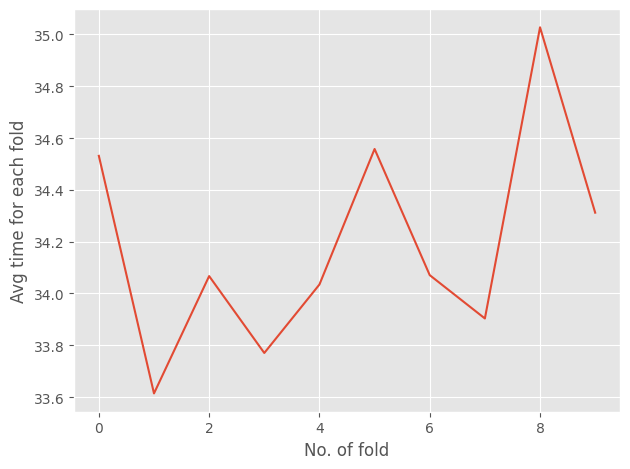

In [16]:
import matplotlib.pyplot as plt

times_birnn_n = np.zeros((10,100))
for i, row in enumerate(times_birnn):
    times_birnn_n[i, :len(row)] = row

times_birnn_n_n = np.mean(times_birnn_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_birnn_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("birnn times")
plt.show()

In [17]:
train_acc_birnn_n = np.zeros((10,100))
for i, row in enumerate(train_acc_birnn):
    train_acc_birnn_n[i, :len(row)] = row
    
test_acc_birnn_n = np.zeros((10,100))
for i, row in enumerate(test_acc_birnn):
    test_acc_birnn_n[i, :len(row)] = row
    
train_loss_birnn_n = np.zeros((10,100))
for i, row in enumerate(train_loss_birnn):
    train_loss_birnn_n[i, :len(row)] = row
    
test_loss_birnn_n = np.zeros((10,100))
for i, row in enumerate(test_loss_birnn):
    test_loss_birnn_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_birnn_n = np.mean(train_acc_birnn_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_birnn_n = np.mean(test_acc_birnn_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_birnn_n = np.mean(train_loss_birnn_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_birnn_n = np.mean(test_loss_birnn_n,axis=0)

In [18]:
data = [train_acc_birnn_n,test_acc_birnn_n,train_loss_birnn_n,test_loss_birnn_n]

df = pd.DataFrame(data)
df.to_csv('birnn_acc', index=False)
df = pd.read_csv('birnn_acc')

train_acc_birnn_n = df.iloc[0]
test_acc_birnn_n = df.iloc[1]
train_loss_birnn_n = df.iloc[2]
test_loss_birnn_n = df.iloc[3]


df_t = pd.DataFrame([times_birnn_n_n])
df_t.to_csv('birnn_times', index=False)
df_t = pd.read_csv('birnn_times')

times_birnn_n_n = df_t.iloc[0]

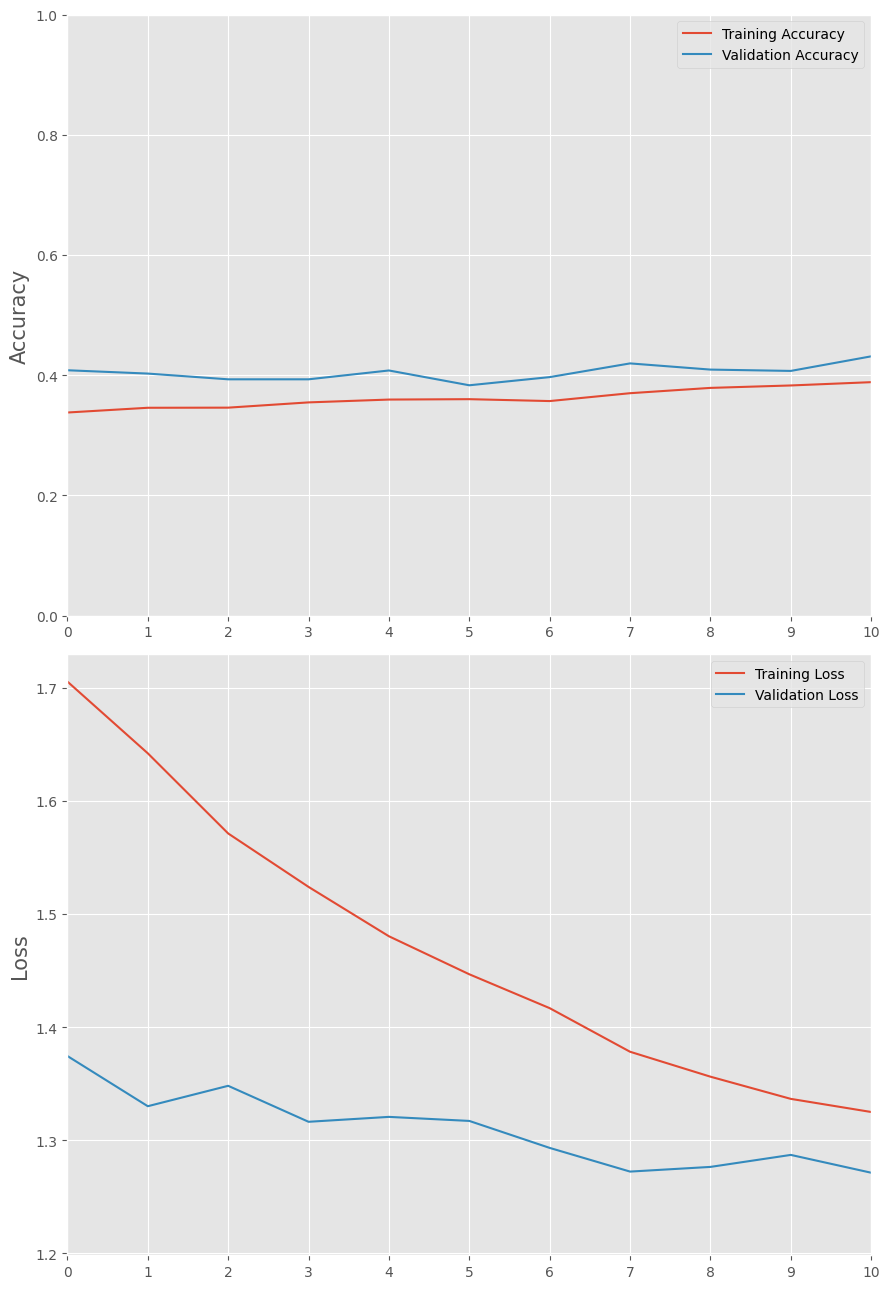

In [19]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_birnn_n, label='Training Accuracy')
axs[0].plot(test_acc_birnn_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_birnn_n, label='Training Loss')
axs[1].plot(test_loss_birnn_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig(" BIRNN Training and Testing Loss")
plt.show()

In [20]:
import gc
gc.collect()

3517

In [21]:
np.array(scores_birnn).shape

(10, 302, 4)

In [22]:
y_pred_birnn = np.argmax(scores_birnn,axis=2)

In [23]:
y_pred_birnn.shape

(10, 302)

In [24]:
from sklearn.metrics import accuracy_score
acc_scores_birnn = []
for i in range(len(y_test_all_birnn)):
    acc_scores_birnn.append(accuracy_score(y_true = y_test_all_birnn[i],y_pred = y_pred_birnn[i]))

In [25]:
acc_scores_birnn

[0.5,
 0.5231788079470199,
 0.4735099337748344,
 0.4470198675496689,
 0.44370860927152317,
 0.423841059602649,
 0.5132450331125827,
 0.45695364238410596,
 0.45695364238410596,
 0.4304635761589404]

In [26]:
df_acc = pd.DataFrame([acc_scores_birnn])

df_acc.to_csv('birnn_accuracy', index=False)

df_acc = pd.read_csv('birnn_accuracy')

acc_scores_birnn = df_acc.iloc[0].values

In [27]:
acc_birnn = np.mean(acc_scores_birnn)

In [28]:
acc_birnn

0.4668874172185431

In [29]:
y_test_all_n = np.array(y_test_all_birnn)

y_pred_birnn_n = y_pred_birnn.flatten()
y_test_all_n = y_test_all_n.flatten()

In [30]:
import gc
gc.collect()

0

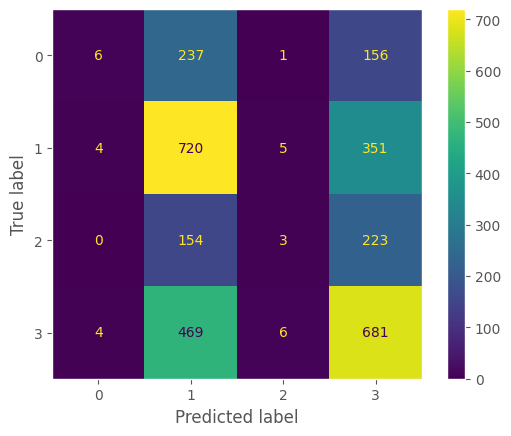

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_birnn_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("birnn")
plt.show()

In [32]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_birnn_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.43      0.01      0.03       400
           1       0.46      0.67      0.54      1080
           2       0.20      0.01      0.02       380
           3       0.48      0.59      0.53      1160

    accuracy                           0.47      3020
   macro avg       0.39      0.32      0.28      3020
weighted avg       0.43      0.47      0.40      3020



# MobileNetV2

In [8]:
import gc
gc.collect()

0

In [8]:
X.shape

(3020, 259, 100)

In [9]:
# X = np.concatenate([X,X,X,X,X,X,X,X,X,X,X,X,X,X,X], axis= -1)

In [10]:
X = np.expand_dims(X, axis=-1)

In [11]:
X_n = np.concatenate([X,X,X], axis= -1)

In [12]:
X_n.shape

(3020, 259, 100, 3)

In [13]:
y.shape

(3020,)

In [14]:
import tensorflow as tf
from keras.applications import MobileNetV2

In [41]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_mnv2 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_mnv2.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 10, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [42]:
IMG_SHAPE = (None,None,3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top= False, 
                                              weights='imagenet')
base_model.trainable = False

In [43]:
def create_model_mnv2():
     
    model_mnv2 = tf.keras.Sequential([
        
        
        base_model,
        
        tf.keras.layers.GlobalAveragePooling2D(),
        
        tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
        
        tf.keras.layers.Dropout(0.25),
        
        tf.keras.layers.Dense(units=4, activation='softmax')
        
])
    
    return model_mnv2

In [44]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_mnv2 = []
y_test_all_mnv2 = []
train_acc_mnv2 = []
test_acc_mnv2 = []
train_loss_mnv2 = []
test_loss_mnv2 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_mnv2.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_mnv2 = None
    model_mnv2 = create_model_mnv2()
        
    model_mnv2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_mnv2.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_mnv2.predict(X_test)
    
    scores_mnv2.append(x)
    train_acc_mnv2.append(history.history["accuracy"])
    test_acc_mnv2.append(history.history["val_accuracy"])
    train_loss_mnv2.append(history.history["loss"])
    test_loss_mnv2.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 4s 23ms/step - loss: 1.2835 - accuracy: 0.4689 - val_loss: 1.0323 - val_accuracy: 0.5809 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9784 - accuracy: 0.5908 - val_loss: 0.9913 - val_accuracy: 0.5699 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8927 - accuracy: 0.6198 - val_loss: 0.9695 - val_accuracy: 0.5699 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8177 - accuracy: 0.6627 - val_loss: 0.9488 - val_accuracy: 0.5772 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 1s 17ms/step - loss: 0.7795 - accuracy: 0.6774 - val_loss: 0.9202 - val_accuracy: 0.6176 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 1s 17ms/step - loss: 0.7213 - accuracy: 0.7105 - val_loss: 0.8779 - val_accuracy: 0.6360 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Epoch 31/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0940 - accuracy: 0.9730 - val_loss: 1.0727 - val_accuracy: 0.7096 - lr: 0.0010
Epoch 32/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1032 - accuracy: 0.9689 - val_loss: 1.0959 - val_accuracy: 0.6912 - lr: 0.0010
Epoch 33/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0870 - accuracy: 0.9791 - val_loss: 1.1164 - val_accuracy: 0.6765 - lr: 0.0010
Epoch 34/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0846 - accuracy: 0.9763 - val_loss: 1.0652 - val_accuracy: 0.7316 - lr: 0.0010
Epoch 35/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0820 - accuracy: 0.9787 - val_loss: 1.0857 - val_accuracy: 0.6949 - lr: 0.0010
Epoch 36/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0780 - accuracy: 0.9783 - val_loss: 1.1144 - val_accuracy: 0.6912 - lr: 0.0010
Epoch 37/100
77/77 [==============================] - 1s 17ms/st

Epoch 60/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0162 - accuracy: 0.9967 - val_loss: 1.1504 - val_accuracy: 0.7206 - lr: 4.0000e-05
Epoch 61/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0168 - accuracy: 0.9984 - val_loss: 1.1672 - val_accuracy: 0.7243 - lr: 4.0000e-05
Epoch 62/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0173 - accuracy: 0.9975 - val_loss: 1.1689 - val_accuracy: 0.7279 - lr: 4.0000e-05
Epoch 63/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0174 - accuracy: 0.9980 - val_loss: 1.1659 - val_accuracy: 0.7206 - lr: 4.0000e-05
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 0.0152 - accuracy: 0.9975
Epoch 64: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 64: 1.32 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.0152 - accuracy: 0.9975 - val_loss: 1.1706 - val_accuracy: 0.7243 - lr: 4.0000e-05
Ep

Epoch 89/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0147 - accuracy: 0.9980 - val_loss: 1.1833 - val_accuracy: 0.7279 - lr: 3.2000e-07
Epoch 90/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0151 - accuracy: 0.9971 - val_loss: 1.1830 - val_accuracy: 0.7279 - lr: 3.2000e-07
Epoch 91/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 1.1831 - val_accuracy: 0.7279 - lr: 3.2000e-07
Epoch 92/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0170 - accuracy: 0.9963 - val_loss: 1.1830 - val_accuracy: 0.7279 - lr: 3.2000e-07
Epoch 93/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0144 - accuracy: 0.9988 - val_loss: 1.1828 - val_accuracy: 0.7279 - lr: 3.2000e-07
Epoch 94/100
75/77 [============================>.] - ETA: 0s - loss: 0.0143 - accuracy: 0.9979
Epoch 94: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 94: 1.

Epoch 18/100
77/77 [==============================] - 1s 17ms/step - loss: 0.2578 - accuracy: 0.9043 - val_loss: 0.9710 - val_accuracy: 0.6765 - lr: 0.0010
Epoch 19/100
77/77 [==============================] - 1s 18ms/step - loss: 0.2446 - accuracy: 0.9195 - val_loss: 0.9997 - val_accuracy: 0.6581 - lr: 0.0010
Epoch 20/100
77/77 [==============================] - 1s 18ms/step - loss: 0.2290 - accuracy: 0.9223 - val_loss: 1.0075 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 21/100
77/77 [==============================] - 1s 17ms/step - loss: 0.2121 - accuracy: 0.9272 - val_loss: 1.0690 - val_accuracy: 0.6434 - lr: 0.0010
Epoch 22/100
77/77 [==============================] - 1s 18ms/step - loss: 0.1785 - accuracy: 0.9432 - val_loss: 1.0796 - val_accuracy: 0.6360 - lr: 0.0010
Epoch 23/100
77/77 [==============================] - 1s 18ms/step - loss: 0.1794 - accuracy: 0.9440 - val_loss: 1.0283 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 24/100
77/77 [==============================] - 1s 17ms/st

Epoch 76/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0154 - accuracy: 0.9996 - val_loss: 1.3416 - val_accuracy: 0.6985 - lr: 1.6000e-06
Epoch 77/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0167 - accuracy: 0.9971 - val_loss: 1.3420 - val_accuracy: 0.6985 - lr: 1.6000e-06
Epoch 78/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0162 - accuracy: 0.9975 - val_loss: 1.3422 - val_accuracy: 0.6985 - lr: 1.6000e-06
Epoch 79/100
77/77 [==============================] - 1s 18ms/step - loss: 0.0168 - accuracy: 0.9980 - val_loss: 1.3418 - val_accuracy: 0.6985 - lr: 1.6000e-06
Epoch 80/100
77/77 [==============================] - 1s 18ms/step - loss: 0.0162 - accuracy: 0.9980 - val_loss: 1.3415 - val_accuracy: 0.6985 - lr: 1.6000e-06
Epoch 81/100
77/77 [==============================] - 1s 18ms/step - loss: 0.0176 - accuracy: 0.9980 - val_loss: 1.3425 - val_accuracy: 0.6985 - lr: 1.6000e-06
Epoch 82/100
77/77 [====================

Epoch 5/100
77/77 [==============================] - 1s 17ms/step - loss: 0.7699 - accuracy: 0.6778 - val_loss: 0.9290 - val_accuracy: 0.6213 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 1s 17ms/step - loss: 0.7304 - accuracy: 0.7003 - val_loss: 0.9409 - val_accuracy: 0.6066 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 1s 17ms/step - loss: 0.6925 - accuracy: 0.7155 - val_loss: 0.9157 - val_accuracy: 0.6397 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 1s 17ms/step - loss: 0.6347 - accuracy: 0.7416 - val_loss: 0.9663 - val_accuracy: 0.6140 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 1s 17ms/step - loss: 0.6107 - accuracy: 0.7567 - val_loss: 0.8518 - val_accuracy: 0.6691 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 1s 17ms/step - loss: 0.5422 - accuracy: 0.7964 - val_loss: 0.9326 - val_accuracy: 0.6544 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 1s 17ms/step - 

Epoch 35/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0874 - accuracy: 0.9747 - val_loss: 1.1545 - val_accuracy: 0.6949 - lr: 0.0010
Epoch 36/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1052 - accuracy: 0.9657 - val_loss: 1.1571 - val_accuracy: 0.6728 - lr: 0.0010
Epoch 37/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1088 - accuracy: 0.9628 - val_loss: 1.1314 - val_accuracy: 0.7096 - lr: 0.0010
Epoch 38/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0900 - accuracy: 0.9722 - val_loss: 1.0959 - val_accuracy: 0.7096 - lr: 0.0010
Epoch 39/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0949 - accuracy: 0.9726 - val_loss: 1.0758 - val_accuracy: 0.7096 - lr: 0.0010
Epoch 40/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0752 - accuracy: 0.9763 - val_loss: 1.0854 - val_accuracy: 0.7353 - lr: 0.0010
Epoch 41/100
73/77 [===========================>..] - ETA: 0s - 

Epoch 64/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0187 - accuracy: 0.9967 - val_loss: 1.1399 - val_accuracy: 0.7390 - lr: 4.0000e-05
Epoch 65/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0153 - accuracy: 0.9988 - val_loss: 1.1389 - val_accuracy: 0.7390 - lr: 4.0000e-05
Epoch 66/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0160 - accuracy: 0.9988 - val_loss: 1.1292 - val_accuracy: 0.7426 - lr: 4.0000e-05
Epoch 67/100
75/77 [============================>.] - ETA: 0s - loss: 0.0148 - accuracy: 0.9987
Epoch 67: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 67: 1.31 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.0147 - accuracy: 0.9988 - val_loss: 1.1481 - val_accuracy: 0.7390 - lr: 4.0000e-05
Epoch 68/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0191 - accuracy: 0.9963 - val_loss: 1.1442 - val_accuracy: 0.7390 - lr: 8.0000e-06
Ep

Epoch 93/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0170 - accuracy: 0.9980 - val_loss: 1.1349 - val_accuracy: 0.7390 - lr: 3.2000e-07
Epoch 94/100
77/77 [==============================] - 1s 18ms/step - loss: 0.0195 - accuracy: 0.9980 - val_loss: 1.1348 - val_accuracy: 0.7390 - lr: 3.2000e-07
Epoch 95/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0158 - accuracy: 0.9984 - val_loss: 1.1347 - val_accuracy: 0.7390 - lr: 3.2000e-07
Epoch 96/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0157 - accuracy: 0.9980 - val_loss: 1.1346 - val_accuracy: 0.7390 - lr: 3.2000e-07
Epoch 97/100
74/77 [===========================>..] - ETA: 0s - loss: 0.0153 - accuracy: 0.9992
Epoch 97: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 97: 1.30 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.0156 - accuracy: 0.9992 - val_loss: 1.1348 - val_accuracy: 0.7390 - lr: 3.2000e-07
Ep

Epoch 51/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0301 - accuracy: 0.9959 - val_loss: 1.1449 - val_accuracy: 0.7096 - lr: 4.0000e-05
Epoch 52/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0260 - accuracy: 0.9963 - val_loss: 1.1479 - val_accuracy: 0.7169 - lr: 4.0000e-05
Epoch 53/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0256 - accuracy: 0.9975 - val_loss: 1.1454 - val_accuracy: 0.7243 - lr: 4.0000e-05
Epoch 54/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0296 - accuracy: 0.9943 - val_loss: 1.1442 - val_accuracy: 0.7096 - lr: 4.0000e-05
Epoch 55/100
77/77 [==============================] - ETA: 0s - loss: 0.0257 - accuracy: 0.9971
Epoch 55: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 55: 1.33 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.0257 - accuracy: 0.9971 - val_loss: 1.1438 - val_accuracy: 0.7169 - lr: 4.0000e-05
Ep

Epoch 80/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0242 - accuracy: 0.9963 - val_loss: 1.1573 - val_accuracy: 0.7132 - lr: 3.2000e-07
Epoch 81/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0282 - accuracy: 0.9959 - val_loss: 1.1571 - val_accuracy: 0.7132 - lr: 3.2000e-07
Epoch 82/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0237 - accuracy: 0.9984 - val_loss: 1.1571 - val_accuracy: 0.7132 - lr: 3.2000e-07
Epoch 83/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0250 - accuracy: 0.9963 - val_loss: 1.1571 - val_accuracy: 0.7132 - lr: 3.2000e-07
Epoch 84/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0212 - accuracy: 0.9967 - val_loss: 1.1571 - val_accuracy: 0.7132 - lr: 3.2000e-07
Epoch 85/100
74/77 [===========================>..] - ETA: 0s - loss: 0.0226 - accuracy: 0.9970
Epoch 85: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 85: 1.

Epoch 9/100
77/77 [==============================] - 1s 17ms/step - loss: 0.6046 - accuracy: 0.7727 - val_loss: 0.7318 - val_accuracy: 0.7132 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 1s 18ms/step - loss: 0.5639 - accuracy: 0.7821 - val_loss: 0.7158 - val_accuracy: 0.7279 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 1s 17ms/step - loss: 0.5164 - accuracy: 0.8091 - val_loss: 0.7340 - val_accuracy: 0.7059 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 1s 17ms/step - loss: 0.4825 - accuracy: 0.8144 - val_loss: 0.7480 - val_accuracy: 0.6912 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 1s 17ms/step - loss: 0.4606 - accuracy: 0.8271 - val_loss: 0.7397 - val_accuracy: 0.7206 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 1s 17ms/step - loss: 0.4402 - accuracy: 0.8344 - val_loss: 0.7091 - val_accuracy: 0.7206 - lr: 0.0010
Epoch 15/100
77/77 [==============================] - 1s 17ms/ste

77/77 [==============================] - 1s 18ms/step - loss: 0.0373 - accuracy: 0.9963 - val_loss: 0.7820 - val_accuracy: 0.7610 - lr: 4.0000e-05
Epoch 68/100
75/77 [============================>.] - ETA: 0s - loss: 0.0371 - accuracy: 0.9971
Epoch 68: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 68: 1.35 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.0369 - accuracy: 0.9971 - val_loss: 0.7855 - val_accuracy: 0.7537 - lr: 4.0000e-05
Epoch 69/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0434 - accuracy: 0.9906 - val_loss: 0.7848 - val_accuracy: 0.7537 - lr: 8.0000e-06
Epoch 70/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0342 - accuracy: 0.9959 - val_loss: 0.7833 - val_accuracy: 0.7610 - lr: 8.0000e-06
Epoch 71/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0370 - accuracy: 0.9967 - val_loss: 0.7831 - val_accuracy: 0.7574 - lr: 8.0000e-06
Epoch 72/100
77

Epoch 96/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0365 - accuracy: 0.9955 - val_loss: 0.7801 - val_accuracy: 0.7537 - lr: 3.2000e-07
Epoch 97/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0329 - accuracy: 0.9959 - val_loss: 0.7801 - val_accuracy: 0.7537 - lr: 3.2000e-07
Epoch 98/100
76/77 [============================>.] - ETA: 0s - loss: 0.0359 - accuracy: 0.9951
Epoch 98: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 98: 1.34 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.0359 - accuracy: 0.9951 - val_loss: 0.7802 - val_accuracy: 0.7537 - lr: 3.2000e-07
Epoch 99/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0361 - accuracy: 0.9947 - val_loss: 0.7802 - val_accuracy: 0.7537 - lr: 6.4000e-08
Epoch 100/100
10/10 [==============================] - 1s 15ms/step
Training on fold 6/10...
Epoch 1/100
77/77 [==============================] - 3s 23ms/step - l

Epoch 54/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0355 - accuracy: 0.9955 - val_loss: 0.9371 - val_accuracy: 0.7831 - lr: 4.0000e-05
Epoch 55/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0342 - accuracy: 0.9943 - val_loss: 0.9417 - val_accuracy: 0.8051 - lr: 4.0000e-05
Epoch 56/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0364 - accuracy: 0.9955 - val_loss: 0.9363 - val_accuracy: 0.8015 - lr: 4.0000e-05
Epoch 57/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0324 - accuracy: 0.9967 - val_loss: 0.9435 - val_accuracy: 0.7831 - lr: 4.0000e-05
Epoch 58/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0308 - accuracy: 0.9971 - val_loss: 0.9520 - val_accuracy: 0.7904 - lr: 4.0000e-05
Epoch 59/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0345 - accuracy: 0.9951 - val_loss: 0.9490 - val_accuracy: 0.7831 - lr: 4.0000e-05
Epoch 60/100
77/77 [====================

Epoch 83/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0332 - accuracy: 0.9955 - val_loss: 0.9496 - val_accuracy: 0.7831 - lr: 1.6000e-06
Epoch 84/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0305 - accuracy: 0.9967 - val_loss: 0.9495 - val_accuracy: 0.7831 - lr: 1.6000e-06
Epoch 85/100
75/77 [============================>.] - ETA: 0s - loss: 0.0329 - accuracy: 0.9958
Epoch 85: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 85: 1.32 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.0326 - accuracy: 0.9959 - val_loss: 0.9495 - val_accuracy: 0.7831 - lr: 1.6000e-06
Epoch 86/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0331 - accuracy: 0.9967 - val_loss: 0.9496 - val_accuracy: 0.7831 - lr: 3.2000e-07
Epoch 87/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0324 - accuracy: 0.9975 - val_loss: 0.9494 - val_accuracy: 0.7831 - lr: 3.2000e-07
Ep

Epoch 12/100
77/77 [==============================] - 1s 17ms/step - loss: 0.4985 - accuracy: 0.8066 - val_loss: 0.6749 - val_accuracy: 0.7243 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 1s 17ms/step - loss: 0.4459 - accuracy: 0.8422 - val_loss: 0.6709 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3901 - accuracy: 0.8692 - val_loss: 0.6758 - val_accuracy: 0.7574 - lr: 0.0010
Epoch 15/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3479 - accuracy: 0.8823 - val_loss: 0.7286 - val_accuracy: 0.7132 - lr: 0.0010
Epoch 16/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3362 - accuracy: 0.8786 - val_loss: 0.7179 - val_accuracy: 0.7169 - lr: 0.0010
Epoch 17/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3021 - accuracy: 0.8986 - val_loss: 0.6781 - val_accuracy: 0.7353 - lr: 0.0010
Epoch 18/100
77/77 [==============================] - 1s 17ms/st

Epoch 42/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0259 - accuracy: 0.9984 - val_loss: 0.8428 - val_accuracy: 0.7537 - lr: 2.0000e-04
Epoch 43/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0346 - accuracy: 0.9930 - val_loss: 0.8130 - val_accuracy: 0.7537 - lr: 2.0000e-04
Epoch 44/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0310 - accuracy: 0.9943 - val_loss: 0.8500 - val_accuracy: 0.7463 - lr: 2.0000e-04
Epoch 45/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0302 - accuracy: 0.9926 - val_loss: 0.8556 - val_accuracy: 0.7647 - lr: 2.0000e-04
Epoch 46/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0267 - accuracy: 0.9967 - val_loss: 0.8096 - val_accuracy: 0.7610 - lr: 2.0000e-04
Epoch 47/100
74/77 [===========================>..] - ETA: 0s - loss: 0.0237 - accuracy: 0.9983
Epoch 47: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 47: 1

Epoch 71/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0236 - accuracy: 0.9967 - val_loss: 0.8299 - val_accuracy: 0.7574 - lr: 8.0000e-06
Epoch 72/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0198 - accuracy: 0.9975 - val_loss: 0.8312 - val_accuracy: 0.7610 - lr: 8.0000e-06
Epoch 73/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0203 - accuracy: 0.9988 - val_loss: 0.8292 - val_accuracy: 0.7537 - lr: 8.0000e-06
Epoch 74/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0204 - accuracy: 0.9984 - val_loss: 0.8335 - val_accuracy: 0.7610 - lr: 8.0000e-06
Epoch 75/100
74/77 [===========================>..] - ETA: 0s - loss: 0.0207 - accuracy: 0.9970
Epoch 75: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 75: 1.31 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.0205 - accuracy: 0.9971 - val_loss: 0.8352 - val_accuracy: 0.7610 - lr: 8.0000e-06
E

Epoch 100/100
10/10 [==============================] - 1s 16ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 3s 24ms/step - loss: 1.2783 - accuracy: 0.4820 - val_loss: 1.0137 - val_accuracy: 0.5478 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9859 - accuracy: 0.5801 - val_loss: 1.0319 - val_accuracy: 0.5735 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9155 - accuracy: 0.6145 - val_loss: 0.8984 - val_accuracy: 0.6213 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8288 - accuracy: 0.6549 - val_loss: 0.8793 - val_accuracy: 0.6434 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 1s 17ms/step - loss: 0.7748 - accuracy: 0.6783 - val_loss: 0.9152 - val_accuracy: 0.6581 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 1s 17ms/step - loss: 0.7552 - accuracy: 0.6872 - val_loss: 0.8117 - val_accurac

Epoch 30/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1061 - accuracy: 0.9710 - val_loss: 0.9435 - val_accuracy: 0.7316 - lr: 0.0010
Epoch 31/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1246 - accuracy: 0.9612 - val_loss: 0.8810 - val_accuracy: 0.7059 - lr: 0.0010
Epoch 32/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1075 - accuracy: 0.9677 - val_loss: 1.0401 - val_accuracy: 0.7059 - lr: 0.0010
Epoch 33/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1072 - accuracy: 0.9661 - val_loss: 0.9378 - val_accuracy: 0.7059 - lr: 0.0010
Epoch 34/100
76/77 [============================>.] - ETA: 0s - loss: 0.1148 - accuracy: 0.9671
Epoch 34: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 34: 1.31 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.1143 - accuracy: 0.9673 - val_loss: 0.9882 - val_accuracy: 0.7537 - lr: 0.0010
Epoch 35/100
77/77 [=

Epoch 59/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0292 - accuracy: 0.9935 - val_loss: 0.9680 - val_accuracy: 0.7647 - lr: 8.0000e-06
Epoch 60/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0307 - accuracy: 0.9955 - val_loss: 0.9715 - val_accuracy: 0.7647 - lr: 8.0000e-06
Epoch 61/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0287 - accuracy: 0.9984 - val_loss: 0.9714 - val_accuracy: 0.7647 - lr: 8.0000e-06
Epoch 62/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0287 - accuracy: 0.9947 - val_loss: 0.9721 - val_accuracy: 0.7684 - lr: 8.0000e-06
Epoch 63/100
77/77 [==============================] - 1s 18ms/step - loss: 0.0274 - accuracy: 0.9963 - val_loss: 0.9716 - val_accuracy: 0.7647 - lr: 8.0000e-06
Epoch 64/100
75/77 [============================>.] - ETA: 0s - loss: 0.0267 - accuracy: 0.9971
Epoch 64: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 64: 1

Epoch 88/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0296 - accuracy: 0.9935 - val_loss: 0.9749 - val_accuracy: 0.7647 - lr: 6.4000e-08
Epoch 89/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0273 - accuracy: 0.9955 - val_loss: 0.9749 - val_accuracy: 0.7647 - lr: 6.4000e-08
Epoch 90/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0260 - accuracy: 0.9980 - val_loss: 0.9749 - val_accuracy: 0.7647 - lr: 6.4000e-08
Epoch 91/100
77/77 [==============================] - 1s 18ms/step - loss: 0.0296 - accuracy: 0.9963 - val_loss: 0.9749 - val_accuracy: 0.7647 - lr: 6.4000e-08
Epoch 92/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0251 - accuracy: 0.9971 - val_loss: 0.9749 - val_accuracy: 0.7647 - lr: 6.4000e-08
Epoch 93/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0261 - accuracy: 0.9963 - val_loss: 0.9749 - val_accuracy: 0.7647 - lr: 6.4000e-08
Epoch 94/100
75/77 [====================

Epoch 17/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3210 - accuracy: 0.8933 - val_loss: 0.8227 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 18/100
77/77 [==============================] - 1s 17ms/step - loss: 0.2791 - accuracy: 0.9113 - val_loss: 0.7907 - val_accuracy: 0.6985 - lr: 0.0010
Epoch 19/100
77/77 [==============================] - 1s 17ms/step - loss: 0.2661 - accuracy: 0.9096 - val_loss: 0.9068 - val_accuracy: 0.7169 - lr: 0.0010
Epoch 20/100
77/77 [==============================] - 1s 17ms/step - loss: 0.2594 - accuracy: 0.9105 - val_loss: 0.8535 - val_accuracy: 0.7096 - lr: 0.0010
Epoch 21/100
77/77 [==============================] - 1s 17ms/step - loss: 0.2196 - accuracy: 0.9252 - val_loss: 0.8729 - val_accuracy: 0.7022 - lr: 0.0010
Epoch 22/100
77/77 [==============================] - 1s 17ms/step - loss: 0.2197 - accuracy: 0.9260 - val_loss: 0.8519 - val_accuracy: 0.7059 - lr: 0.0010
Epoch 23/100
77/77 [==============================] - 1s 17ms/st

Epoch 46/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0527 - accuracy: 0.9906 - val_loss: 0.9188 - val_accuracy: 0.7390 - lr: 4.0000e-05
Epoch 47/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0532 - accuracy: 0.9930 - val_loss: 0.9344 - val_accuracy: 0.7353 - lr: 4.0000e-05
Epoch 48/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0467 - accuracy: 0.9951 - val_loss: 0.9275 - val_accuracy: 0.7279 - lr: 4.0000e-05
Epoch 49/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0545 - accuracy: 0.9926 - val_loss: 0.9354 - val_accuracy: 0.7169 - lr: 4.0000e-05
Epoch 50/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0489 - accuracy: 0.9935 - val_loss: 0.9301 - val_accuracy: 0.7353 - lr: 4.0000e-05
Epoch 51/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0551 - accuracy: 0.9894 - val_loss: 0.9357 - val_accuracy: 0.7279 - lr: 4.0000e-05
Epoch 52/100
77/77 [====================

Epoch 75/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0492 - accuracy: 0.9943 - val_loss: 0.9390 - val_accuracy: 0.7243 - lr: 3.2000e-07
Epoch 76/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0520 - accuracy: 0.9926 - val_loss: 0.9389 - val_accuracy: 0.7243 - lr: 3.2000e-07
Epoch 77/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0473 - accuracy: 0.9951 - val_loss: 0.9389 - val_accuracy: 0.7243 - lr: 3.2000e-07
Epoch 78/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0487 - accuracy: 0.9930 - val_loss: 0.9389 - val_accuracy: 0.7243 - lr: 3.2000e-07
Epoch 79/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0476 - accuracy: 0.9943 - val_loss: 0.9389 - val_accuracy: 0.7243 - lr: 3.2000e-07
Epoch 80/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0474 - accuracy: 0.9935 - val_loss: 0.9390 - val_accuracy: 0.7243 - lr: 3.2000e-07
Epoch 81/100
77/77 [====================

Epoch 4/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8411 - accuracy: 0.6566 - val_loss: 0.9319 - val_accuracy: 0.6066 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 1s 17ms/step - loss: 0.7856 - accuracy: 0.6905 - val_loss: 0.8232 - val_accuracy: 0.6581 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 1s 17ms/step - loss: 0.7394 - accuracy: 0.7069 - val_loss: 0.8313 - val_accuracy: 0.6654 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 1s 17ms/step - loss: 0.6816 - accuracy: 0.7253 - val_loss: 0.7365 - val_accuracy: 0.6949 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 1s 17ms/step - loss: 0.6165 - accuracy: 0.7625 - val_loss: 0.7881 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 1s 17ms/step - loss: 0.5920 - accuracy: 0.7617 - val_loss: 0.7327 - val_accuracy: 0.7132 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 1s 17ms/step - l

Epoch 34/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0552 - accuracy: 0.9902 - val_loss: 0.8596 - val_accuracy: 0.7500 - lr: 2.0000e-04
Epoch 35/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0467 - accuracy: 0.9906 - val_loss: 0.8745 - val_accuracy: 0.7537 - lr: 2.0000e-04
Epoch 36/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0469 - accuracy: 0.9914 - val_loss: 0.8821 - val_accuracy: 0.7574 - lr: 2.0000e-04
Epoch 37/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0457 - accuracy: 0.9930 - val_loss: 0.8635 - val_accuracy: 0.7500 - lr: 2.0000e-04
Epoch 38/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0417 - accuracy: 0.9922 - val_loss: 0.8732 - val_accuracy: 0.7574 - lr: 2.0000e-04
Epoch 39/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0409 - accuracy: 0.9906 - val_loss: 0.8542 - val_accuracy: 0.7574 - lr: 2.0000e-04
Epoch 40/100
77/77 [====================

Epoch 63/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0302 - accuracy: 0.9959 - val_loss: 0.8991 - val_accuracy: 0.7610 - lr: 8.0000e-06
Epoch 64/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0264 - accuracy: 0.9967 - val_loss: 0.9024 - val_accuracy: 0.7647 - lr: 8.0000e-06
Epoch 65/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0266 - accuracy: 0.9955 - val_loss: 0.9055 - val_accuracy: 0.7647 - lr: 8.0000e-06
Epoch 66/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0259 - accuracy: 0.9971 - val_loss: 0.9083 - val_accuracy: 0.7647 - lr: 8.0000e-06
Epoch 67/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0291 - accuracy: 0.9947 - val_loss: 0.9075 - val_accuracy: 0.7647 - lr: 8.0000e-06
Epoch 68/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0268 - accuracy: 0.9963 - val_loss: 0.9023 - val_accuracy: 0.7610 - lr: 8.0000e-06
Epoch 69/100
77/77 [====================

Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 0.0260 - accuracy: 0.9967
Epoch 92: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 92: 1.32 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.0260 - accuracy: 0.9967 - val_loss: 0.9039 - val_accuracy: 0.7610 - lr: 3.2000e-07
Epoch 93/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0244 - accuracy: 0.9975 - val_loss: 0.9039 - val_accuracy: 0.7610 - lr: 6.4000e-08
Epoch 94/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0238 - accuracy: 0.9980 - val_loss: 0.9039 - val_accuracy: 0.7610 - lr: 6.4000e-08
Epoch 95/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0226 - accuracy: 0.9988 - val_loss: 0.9039 - val_accuracy: 0.7610 - lr: 6.4000e-08
Epoch 96/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0281 - accuracy: 0.9959 - val_loss: 0.9039 - val_accuracy: 0.7610 - lr: 6.4000e-08
Ep

In [45]:
import gc
gc.collect()

0

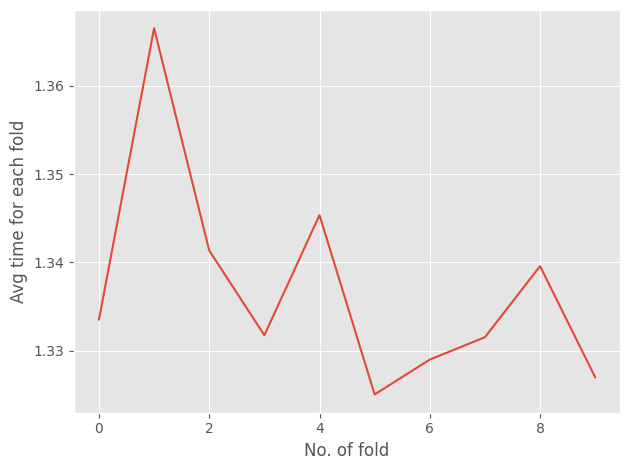

In [46]:
import matplotlib.pyplot as plt

times_mnv2_n = np.zeros((10,100))
for i, row in enumerate(times_mnv2):
    times_mnv2_n[i, :len(row)] = row

times_mnv2_n_n = np.mean(times_mnv2_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_mnv2_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("mnv2 times")
plt.show()

In [47]:
train_acc_mnv2_n = np.zeros((10,100))
for i, row in enumerate(train_acc_mnv2):
    train_acc_mnv2_n[i, :len(row)] = row
    
test_acc_mnv2_n = np.zeros((10,100))
for i, row in enumerate(test_acc_mnv2):
    test_acc_mnv2_n[i, :len(row)] = row
    
train_loss_mnv2_n = np.zeros((10,100))
for i, row in enumerate(train_loss_mnv2):
    train_loss_mnv2_n[i, :len(row)] = row
    
test_loss_mnv2_n = np.zeros((10,100))
for i, row in enumerate(test_loss_mnv2):
    test_loss_mnv2_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_mnv2_n = np.mean(train_acc_mnv2_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_mnv2_n = np.mean(test_acc_mnv2_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_mnv2_n = np.mean(train_loss_mnv2_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_mnv2_n = np.mean(test_loss_mnv2_n,axis=0)

In [48]:
data = [train_acc_mnv2_n,test_acc_mnv2_n,train_loss_mnv2_n,test_loss_mnv2_n]

df = pd.DataFrame(data)
df.to_csv('mnv2_acc', index=False)
df = pd.read_csv('mnv2_acc')

train_acc_mnv2_n = df.iloc[0]
test_acc_mnv2_n = df.iloc[1]
train_loss_mnv2_n = df.iloc[2]
test_loss_mnv2_n = df.iloc[3]


df_t = pd.DataFrame([times_mnv2_n_n])
df_t.to_csv('mnv2_times', index=False)
df_t = pd.read_csv('mnv2_times')

times_mnv2_n_n = df_t.iloc[0]

In [49]:
train_acc_mnv2_n

0     0.467784
1     0.570442
2     0.611120
3     0.651840
4     0.679109
        ...   
95    0.996157
96    0.996975
97    0.996239
98    0.996893
99    0.996484
Name: 0, Length: 100, dtype: float64

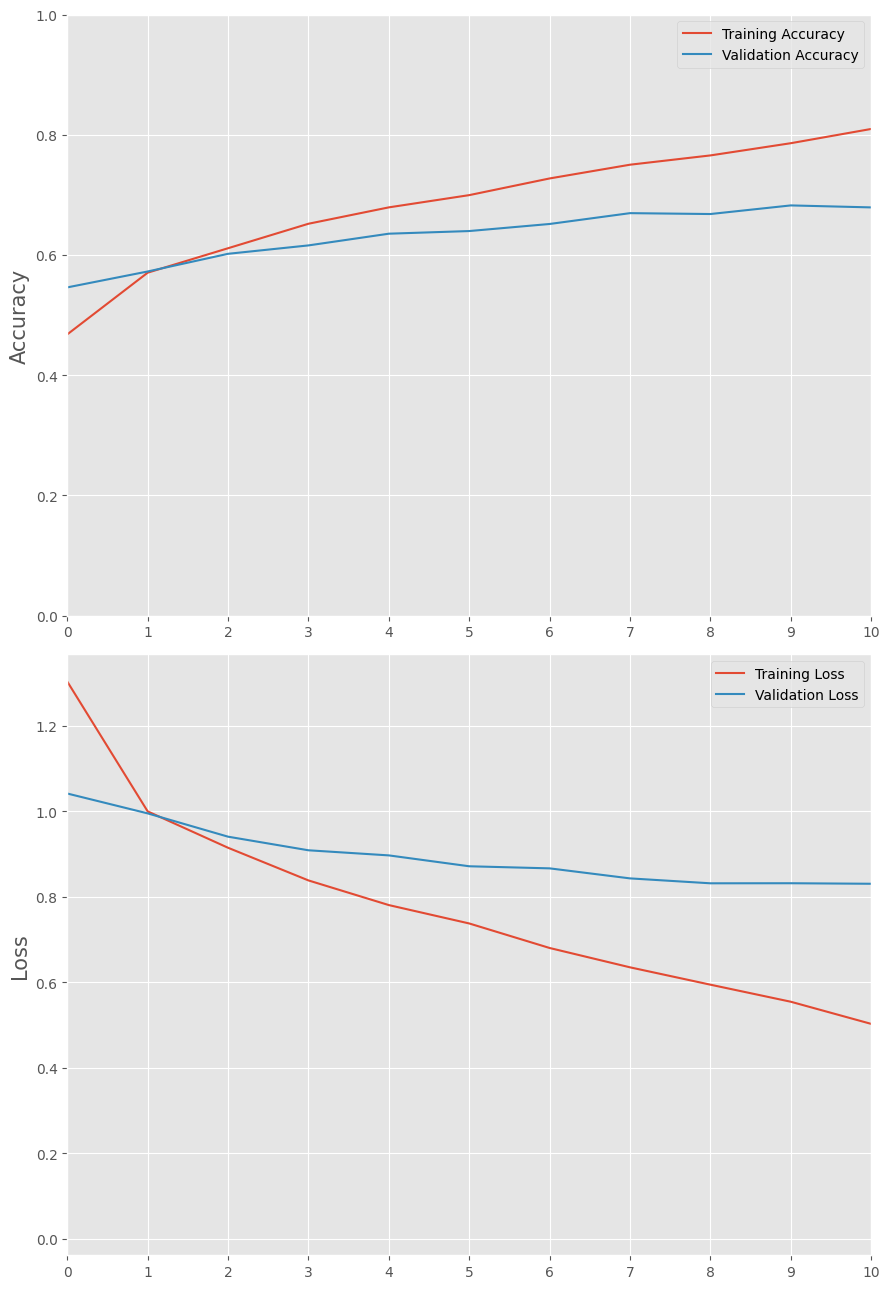

In [50]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_mnv2_n, label='Training Accuracy')
axs[0].plot(test_acc_mnv2_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_mnv2_n, label='Training Loss')
axs[1].plot(test_loss_mnv2_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("mnv2 Training and Testing Loss")
plt.show()

In [51]:
np.array(scores_mnv2).shape

(10, 302, 4)

In [52]:
y_pred_mnv2 = np.argmax(scores_mnv2,axis=2)

In [53]:
y_pred_mnv2.shape

(10, 302)

In [54]:
from sklearn.metrics import accuracy_score
acc_scores_mnv2 = []
for i in range(len(y_test_all_mnv2)):
    acc_scores_mnv2.append(accuracy_score(y_true = y_test_all_mnv2[i],y_pred = y_pred_mnv2[i]))

In [55]:
import gc
gc.collect()

23743

In [56]:
acc_scores_mnv2

[0.7251655629139073,
 0.7119205298013245,
 0.6920529801324503,
 0.7052980132450332,
 0.7748344370860927,
 0.6920529801324503,
 0.6821192052980133,
 0.7251655629139073,
 0.7350993377483444,
 0.7086092715231788]

In [57]:
df_acc = pd.DataFrame([acc_scores_mnv2])

df_acc.to_csv('mnv2_accuracy', index=False)

df_acc = pd.read_csv('mnv2_accuracy')

acc_scores_mnv2 = df_acc.iloc[0].values

In [58]:
y_test_all_n = np.array(y_test_all_mnv2)

y_pred_mnv2_n = y_pred_mnv2.flatten()
y_test_all_n = y_test_all_n.flatten()

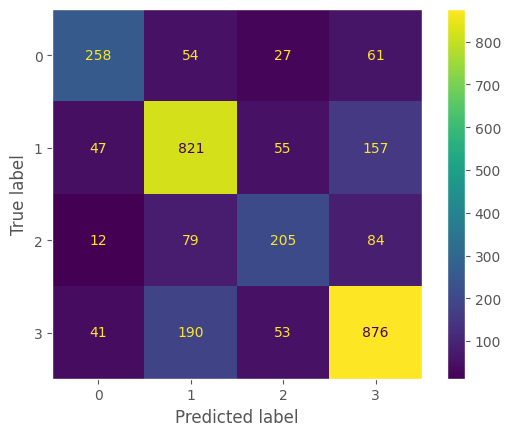

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_mnv2_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("mnv2")

plt.show()

In [60]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_mnv2_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.72      0.65      0.68       400
           1       0.72      0.76      0.74      1080
           2       0.60      0.54      0.57       380
           3       0.74      0.76      0.75      1160

    accuracy                           0.72      3020
   macro avg       0.70      0.67      0.68      3020
weighted avg       0.71      0.72      0.71      3020



# XceptionV3

In [15]:
import gc
gc.collect()

0

In [16]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_xv3 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_xv3.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [17]:
import gc
gc.collect()

0

In [18]:
def create_model_xv3():
    
    model_xv3 = tf.keras.models.Sequential([
    tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_xv3.trainable = False
    return model_xv3

In [19]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_xv3 = []
y_test_all_xv3 = []
train_acc_xv3 = []
test_acc_xv3 = []
train_loss_xv3 = []
test_loss_xv3 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_xv3.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_xv3 = None
    model_xv3 = create_model_xv3()
        
    model_xv3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_xv3.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_xv3.predict(X_test)
    
    scores_xv3.append(x)
    train_acc_xv3.append(history.history["accuracy"])
    test_acc_xv3.append(history.history["val_accuracy"])
    train_loss_xv3.append(history.history["loss"])
    test_loss_xv3.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 7s 49ms/step - loss: 1.5433 - accuracy: 0.2927 - val_loss: 1.5367 - val_accuracy: 0.2463 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5572 - accuracy: 0.2768 - val_loss: 1.5367 - val_accuracy: 0.2463 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5492 - accuracy: 0.2903 - val_loss: 1.5367 - val_accuracy: 0.2463 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5486 - accuracy: 0.2870 - val_loss: 1.5367 - val_accuracy: 0.2463 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5419 - accuracy: 0.2944 - val_loss: 1.5367 - val_accuracy: 0.2463 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5516 - accuracy: 0.2882 - val_loss: 1.5367 - val_accuracy: 0.2463 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Time taken for epoch 29: 3.16 seconds
77/77 [==============================] - 3s 41ms/step - loss: 1.5406 - accuracy: 0.2923 - val_loss: 1.5367 - val_accuracy: 0.2463 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5456 - accuracy: 0.2972 - val_loss: 1.5367 - val_accuracy: 0.2463 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5404 - accuracy: 0.2993 - val_loss: 1.5367 - val_accuracy: 0.2463 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5509 - accuracy: 0.2911 - val_loss: 1.5367 - val_accuracy: 0.2463 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5443 - accuracy: 0.2993 - val_loss: 1.5367 - val_accuracy: 0.2463 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5479 - accuracy: 0.2821 - val_loss: 1.5367 - val_accuracy: 0.2463 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5354 - accuracy: 0.2972 - val_loss: 1.5367 - val_accuracy: 0.2463 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5478 - accuracy: 0.2935 - val_loss: 1.5367 - val_accuracy: 0.2463 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5410 - accuracy: 0.2927 - val_loss: 1.5367 - val_accuracy: 0.2463 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5479 - accuracy: 0.2935 - val_loss: 1.5367 - val_accuracy: 0.2463 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5499 - accuracy: 0.2862 - val_loss: 1.5367 - val_accuracy: 0.2463 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 41ms/step - loss: 1.5497 - accuracy: 0.2878 - val_loss: 1.5367 - val_accuracy: 0.2463 - lr: 2.5600e-09
Epoch 64/100
77/77 [====================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
np.array(y_test_all_xv3).shape

In [21]:
import matplotlib.pyplot as plt

times_xv3_n = np.zeros((10,100))
for i, row in enumerate(times_xv3):
    times_xv3_n[i, :len(row)] = row

times_xv3_n_n = np.mean(times_xv3_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_xv3_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("xv3 times")
plt.show()

In [22]:
train_acc_xv3_n = np.zeros((10,100))
for i, row in enumerate(train_acc_xv3):
    train_acc_xv3_n[i, :len(row)] = row
    
test_acc_xv3_n = np.zeros((10,100))
for i, row in enumerate(test_acc_xv3):
    test_acc_xv3_n[i, :len(row)] = row
    
train_loss_xv3_n = np.zeros((10,100))
for i, row in enumerate(train_loss_xv3):
    train_loss_xv3_n[i, :len(row)] = row
    
test_loss_xv3_n = np.zeros((10,100))
for i, row in enumerate(test_loss_xv3):
    test_loss_xv3_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_xv3_n = np.mean(train_acc_xv3_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_xv3_n = np.mean(test_acc_xv3_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_xv3_n = np.mean(train_loss_xv3_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_xv3_n = np.mean(test_loss_xv3_n,axis=0)

In [23]:
import gc
gc.collect()

In [24]:
data = [train_acc_xv3_n,test_acc_xv3_n,train_loss_xv3_n,test_loss_xv3_n]

df = pd.DataFrame(data)
df.to_csv('xv3_acc', index=False)
df = pd.read_csv('xv3_acc')

train_acc_xv3_n = df.iloc[0]
test_acc_xv3_n = df.iloc[1]
train_loss_xv3_n = df.iloc[2]
test_loss_xv3_n = df.iloc[3]


df_t = pd.DataFrame([times_xv3_n_n])
df_t.to_csv('xv3_times', index=False)
df_t = pd.read_csv('xv3_times')

times_xv3_n_n = df_t.iloc[0]

In [25]:
train_acc_xv3_n

In [26]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_xv3_n, label='Training Accuracy')
axs[0].plot(test_acc_xv3_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_xv3_n, label='Training Loss')
axs[1].plot(test_loss_xv3_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("xv3 Training and Testing Loss")
plt.show()

In [27]:
np.array(scores_xv3).shape

In [28]:
y_pred_xv3 = np.argmax(scores_xv3,axis=2)

In [29]:
y_pred_xv3.shape

In [30]:
from sklearn.metrics import accuracy_score
acc_scores_xv3 = []
for i in range(len(y_test_all_xv3)):
    acc_scores_xv3.append(accuracy_score(y_true = y_test_all_xv3[i],y_pred = y_pred_xv3[i]))

In [31]:
import gc
gc.collect()

In [32]:
acc_scores_xv3

In [33]:
df_acc = pd.DataFrame([acc_scores_xv3])

df_acc.to_csv('xv3_accuracy', index=False)

df_acc = pd.read_csv('xv3_accuracy')

acc_scores_xv3 = df_acc.iloc[0].values

In [34]:
y_test_all_n = np.array(y_test_all_xv3)

y_pred_xv3_n = y_pred_xv3.flatten()
y_test_all_n = y_test_all_n.flatten()

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_xv3_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("xv3")
plt.show()

In [36]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_xv3_n)
print(cf_r)

# EfficientNetV2L

In [37]:
import gc
gc.collect()

In [38]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_env2l = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_env2l.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [39]:
def create_model_env2l():
    
    model_env2l = tf.keras.models.Sequential([
    tf.keras.applications.EfficientNetV2L(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_env2l.trainable = False
    return model_env2l

In [40]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_env2l = []
y_test_all_env2l = []
train_acc_env2l = []
test_acc_env2l = []
train_loss_env2l = []
test_loss_env2l = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_env2l.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_env2l = None
    model_env2l = create_model_env2l()
        
    model_env2l.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_env2l.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_env2l.predict(X_test)
    
    scores_env2l.append(x)
    train_acc_env2l.append(history.history["accuracy"])
    test_acc_env2l.append(history.history["val_accuracy"])
    train_loss_env2l.append(history.history["loss"])
    test_loss_env2l.append(history.history["val_loss"])
    
    gc.collect()

In [41]:
import matplotlib.pyplot as plt

times_env2l_n = np.zeros((10,100))
for i, row in enumerate(times_env2l):
    times_env2l_n[i, :len(row)] = row

times_env2l_n_n = np.mean(times_env2l_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_env2l_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("env2l times")
plt.show()

In [42]:
train_acc_env2l_n = np.zeros((10,100))
for i, row in enumerate(train_acc_env2l):
    train_acc_env2l_n[i, :len(row)] = row
    
test_acc_env2l_n = np.zeros((10,100))
for i, row in enumerate(test_acc_env2l):
    test_acc_env2l_n[i, :len(row)] = row
    
train_loss_env2l_n = np.zeros((10,100))
for i, row in enumerate(train_loss_env2l):
    train_loss_env2l_n[i, :len(row)] = row
    
test_loss_env2l_n = np.zeros((10,100))
for i, row in enumerate(test_loss_env2l):
    test_loss_env2l_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_env2l_n = np.mean(train_acc_env2l_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_env2l_n = np.mean(test_acc_env2l_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_env2l_n = np.mean(train_loss_env2l_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_env2l_n = np.mean(test_loss_env2l_n,axis=0)

In [43]:
data = [train_acc_env2l_n,test_acc_env2l_n,train_loss_env2l_n,test_loss_env2l_n]

df = pd.DataFrame(data)
df.to_csv('env2l_acc', index=False)
df = pd.read_csv('env2l_acc')

train_acc_env2l_n = df.iloc[0]
test_acc_env2l_n = df.iloc[1]
train_loss_env2l_n = df.iloc[2]
test_loss_env2l_n = df.iloc[3]


df_t = pd.DataFrame([times_env2l_n_n])
df_t.to_csv('env2l_times', index=False)
df_t = pd.read_csv('env2l_times')

times_env2l_n_n = df_t.iloc[0]

In [44]:
train_acc_env2l_n

In [45]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_env2l_n, label='Training Accuracy')
axs[0].plot(test_acc_env2l_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_env2l_n, label='Training Loss')
axs[1].plot(test_loss_env2l_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("env2l Training and Testing Loss")
plt.show()

In [46]:
np.array(scores_env2l).shape

In [47]:
y_pred_env2l = np.argmax(scores_env2l,axis=2)

In [48]:
y_pred_env2l.shape

In [49]:
from sklearn.metrics import accuracy_score
acc_scores_env2l = []
for i in range(len(y_test_all_env2l)):
    acc_scores_env2l.append(accuracy_score(y_true = y_test_all_env2l[i],y_pred = y_pred_env2l[i]))

In [50]:
import gc
gc.collect()

In [51]:
acc_scores_env2l

In [52]:
df_acc = pd.DataFrame([acc_scores_env2l])

df_acc.to_csv('env2l_accuracy', index=False)

df_acc = pd.read_csv('env2l_accuracy')

acc_scores_env2l = df_acc.iloc[0].values

In [53]:
y_test_all_n = np.array(y_test_all_env2l)

y_pred_env2l_n = y_pred_env2l.flatten()
y_test_all_n = y_test_all_n.flatten()

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_env2l_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("env2l")

plt.show()

In [55]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_env2l_n)
print(cf_r)

# NasNetLarge

In [56]:
import gc
gc.collect()

In [57]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_nnl = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_nnl.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [58]:
import gc
gc.collect()

In [59]:
def create_model_nnl():
    
    model_nnl = tf.keras.models.Sequential([
    tf.keras.applications.NASNetLarge(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_nnl.trainable = False
    return model_nnl

In [60]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nnl = []
y_test_all_nnl = []
train_acc_nnl = []
test_acc_nnl = []
train_loss_nnl = []
test_loss_nnl = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_nnl.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_nnl = None
    model_nnl = create_model_nnl()
        
    model_nnl.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_nnl.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_nnl.predict(X_test)
    
    scores_nnl.append(x)
    train_acc_nnl.append(history.history["accuracy"])
    test_acc_nnl.append(history.history["val_accuracy"])
    train_loss_nnl.append(history.history["loss"])
    test_loss_nnl.append(history.history["val_loss"])
    
    gc.collect()

77/77 [==============================] - 13s 167ms/step - loss: 1.4114 - accuracy: 0.2821 - val_loss: 1.4007 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4110 - accuracy: 0.2719 - val_loss: 1.4007 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4113 - accuracy: 0.2858 - val_loss: 1.4007 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4085 - accuracy: 0.2927 - val_loss: 1.4007 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4082 - accuracy: 0.2800 - val_loss: 1.4007 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4038 - accuracy: 0.2850 - val_loss: 1.4007 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 64/100
77/77 [=====================

Epoch 86/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4065 - accuracy: 0.2817 - val_loss: 1.4007 - val_accuracy: 0.3529 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4123 - accuracy: 0.2727 - val_loss: 1.4007 - val_accuracy: 0.3529 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4080 - accuracy: 0.2813 - val_loss: 1.4007 - val_accuracy: 0.3529 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4055 - accuracy: 0.2776 - val_loss: 1.4007 - val_accuracy: 0.3529 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4078 - accuracy: 0.2833 - val_loss: 1.4007 - val_accuracy: 0.3529 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4042 - accuracy: 0.2878 - val_loss: 1.4007 - val_accuracy: 0.3529 - lr: 4.0960e-12
Epoch 92/100
77/77 [========

77/77 [==============================] - 13s 168ms/step - loss: 1.3871 - accuracy: 0.3197 - val_loss: 1.3650 - val_accuracy: 0.3897 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.3922 - accuracy: 0.3042
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 12.88 seconds
77/77 [==============================] - 13s 168ms/step - loss: 1.3922 - accuracy: 0.3042 - val_loss: 1.3650 - val_accuracy: 0.3897 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 13s 170ms/step - loss: 1.3904 - accuracy: 0.3164 - val_loss: 1.3650 - val_accuracy: 0.3897 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3900 - accuracy: 0.3168 - val_loss: 1.3650 - val_accuracy: 0.3897 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3883 - accuracy: 0.3115 - val_loss: 1.3650 - val_accuracy: 0.3897 - lr: 4.0000e-05
Epo

Epoch 42/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3855 - accuracy: 0.3111 - val_loss: 1.3650 - val_accuracy: 0.3897 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.3897 - accuracy: 0.3226
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 12.87 seconds
77/77 [==============================] - 13s 167ms/step - loss: 1.3897 - accuracy: 0.3226 - val_loss: 1.3650 - val_accuracy: 0.3897 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3936 - accuracy: 0.3050 - val_loss: 1.3650 - val_accuracy: 0.3897 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3888 - accuracy: 0.3128 - val_loss: 1.3650 - val_accuracy: 0.3897 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3940 - accuracy: 0.3070 - val_loss: 1.3650 - val_accuracy: 0.3897 - lr: 6.

Epoch 70/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3862 - accuracy: 0.3128 - val_loss: 1.3650 - val_accuracy: 0.3897 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.3991 - accuracy: 0.3013
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 12.80 seconds
77/77 [==============================] - 13s 166ms/step - loss: 1.3991 - accuracy: 0.3013 - val_loss: 1.3650 - val_accuracy: 0.3897 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3871 - accuracy: 0.3246 - val_loss: 1.3650 - val_accuracy: 0.3897 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3873 - accuracy: 0.3197 - val_loss: 1.3650 - val_accuracy: 0.3897 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4030 - accuracy: 0.2993 - val_loss: 1.3650 - val_accuracy: 0.3897 - lr: 1

Epoch 98/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3878 - accuracy: 0.3250 - val_loss: 1.3650 - val_accuracy: 0.3897 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.3872 - accuracy: 0.3209
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 12.85 seconds
77/77 [==============================] - 13s 167ms/step - loss: 1.3872 - accuracy: 0.3209 - val_loss: 1.3650 - val_accuracy: 0.3897 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 4s 142ms/step
Training on fold 7/10...
Epoch 1/100
77/77 [==============================] - 25s 211ms/step - loss: 1.4286 - accuracy: 0.2478 - val_loss: 1.4088 - val_accuracy: 0.2794 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4219 - accuracy: 0.2535 - val_loss: 1.4088 - val_accuracy: 0.2794 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 13s 168ms/step 

Epoch 26/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4211 - accuracy: 0.2686 - val_loss: 1.4088 - val_accuracy: 0.2794 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4205 - accuracy: 0.2653 - val_loss: 1.4088 - val_accuracy: 0.2794 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4209 - accuracy: 0.2625 - val_loss: 1.4088 - val_accuracy: 0.2794 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.4237 - accuracy: 0.2645
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 12.88 seconds
77/77 [==============================] - 13s 167ms/step - loss: 1.4237 - accuracy: 0.2645 - val_loss: 1.4088 - val_accuracy: 0.2794 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4234 - accuracy: 0.2551 - val_loss: 1.4088 - val_accuracy: 0.2794 - lr: 1

Epoch 54/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4277 - accuracy: 0.2522 - val_loss: 1.4088 - val_accuracy: 0.2794 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4267 - accuracy: 0.2490 - val_loss: 1.4088 - val_accuracy: 0.2794 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4222 - accuracy: 0.2617 - val_loss: 1.4088 - val_accuracy: 0.2794 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.4263 - accuracy: 0.2608
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 12.85 seconds
77/77 [==============================] - 13s 167ms/step - loss: 1.4263 - accuracy: 0.2608 - val_loss: 1.4088 - val_accuracy: 0.2794 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4250 - accuracy: 0.2727 - val_loss: 1.4088 - val_accuracy: 0.2794 - lr: 2

Epoch 82/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4203 - accuracy: 0.2612 - val_loss: 1.4088 - val_accuracy: 0.2794 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4259 - accuracy: 0.2547 - val_loss: 1.4088 - val_accuracy: 0.2794 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4211 - accuracy: 0.2592 - val_loss: 1.4088 - val_accuracy: 0.2794 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.4222 - accuracy: 0.2629
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 12.96 seconds
77/77 [==============================] - 13s 169ms/step - loss: 1.4222 - accuracy: 0.2629 - val_loss: 1.4088 - val_accuracy: 0.2794 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4221 - accuracy: 0.2514 - val_loss: 1.4088 - val_accuracy: 0.2794 - lr: 4.

Epoch 10/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4215 - accuracy: 0.2449 - val_loss: 1.3904 - val_accuracy: 0.2463 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4223 - accuracy: 0.2527 - val_loss: 1.3904 - val_accuracy: 0.2463 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4249 - accuracy: 0.2269 - val_loss: 1.3904 - val_accuracy: 0.2463 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4217 - accuracy: 0.2306 - val_loss: 1.3904 - val_accuracy: 0.2463 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4205 - accuracy: 0.2355 - val_loss: 1.3904 - val_accuracy: 0.2463 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.4222 - accuracy: 0.2322
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for e

Epoch 38/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4164 - accuracy: 0.2424 - val_loss: 1.3904 - val_accuracy: 0.2463 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4229 - accuracy: 0.2428 - val_loss: 1.3904 - val_accuracy: 0.2463 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4157 - accuracy: 0.2404 - val_loss: 1.3904 - val_accuracy: 0.2463 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 13s 169ms/step - loss: 1.4196 - accuracy: 0.2396 - val_loss: 1.3904 - val_accuracy: 0.2463 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4108 - accuracy: 0.2539 - val_loss: 1.3904 - val_accuracy: 0.2463 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.4155 - accuracy: 0.2298
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for ep

Epoch 66/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4178 - accuracy: 0.2392 - val_loss: 1.3904 - val_accuracy: 0.2463 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4186 - accuracy: 0.2445 - val_loss: 1.3904 - val_accuracy: 0.2463 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4206 - accuracy: 0.2416 - val_loss: 1.3904 - val_accuracy: 0.2463 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4174 - accuracy: 0.2388 - val_loss: 1.3904 - val_accuracy: 0.2463 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4160 - accuracy: 0.2453 - val_loss: 1.3904 - val_accuracy: 0.2463 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.4182 - accuracy: 0.2494
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for e

Epoch 94/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4191 - accuracy: 0.2351 - val_loss: 1.3904 - val_accuracy: 0.2463 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4219 - accuracy: 0.2347 - val_loss: 1.3904 - val_accuracy: 0.2463 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4214 - accuracy: 0.2302 - val_loss: 1.3904 - val_accuracy: 0.2463 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4175 - accuracy: 0.2388 - val_loss: 1.3904 - val_accuracy: 0.2463 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4190 - accuracy: 0.2334 - val_loss: 1.3904 - val_accuracy: 0.2463 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.4174 - accuracy: 0.2457
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for e

77/77 [==============================] - ETA: 0s - loss: 1.3859 - accuracy: 0.3209
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 12.96 seconds
77/77 [==============================] - 13s 169ms/step - loss: 1.3859 - accuracy: 0.3209 - val_loss: 1.3697 - val_accuracy: 0.3346 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3791 - accuracy: 0.3250 - val_loss: 1.3697 - val_accuracy: 0.3346 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3789 - accuracy: 0.3193 - val_loss: 1.3697 - val_accuracy: 0.3346 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3817 - accuracy: 0.3332 - val_loss: 1.3697 - val_accuracy: 0.3346 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3730 - accuracy: 0.3287 - val_loss: 1.3697 - val_accuracy: 0.3346 - lr: 8.0000e-06
Epoc

Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.3850 - accuracy: 0.3119
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 12.90 seconds
77/77 [==============================] - 13s 168ms/step - loss: 1.3850 - accuracy: 0.3119 - val_loss: 1.3697 - val_accuracy: 0.3346 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3860 - accuracy: 0.3144 - val_loss: 1.3697 - val_accuracy: 0.3346 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3897 - accuracy: 0.3185 - val_loss: 1.3697 - val_accuracy: 0.3346 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3888 - accuracy: 0.3234 - val_loss: 1.3697 - val_accuracy: 0.3346 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3794 - accuracy: 0.3316 - val_loss: 1.3697 - val_accuracy: 0.3346 - lr: 1

Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.3793 - accuracy: 0.3344
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 12.97 seconds
77/77 [==============================] - 13s 169ms/step - loss: 1.3793 - accuracy: 0.3344 - val_loss: 1.3697 - val_accuracy: 0.3346 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3818 - accuracy: 0.3185 - val_loss: 1.3697 - val_accuracy: 0.3346 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3833 - accuracy: 0.3312 - val_loss: 1.3697 - val_accuracy: 0.3346 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3810 - accuracy: 0.3271 - val_loss: 1.3697 - val_accuracy: 0.3346 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3853 - accuracy: 0.3152 - val_loss: 1.3697 - val_accuracy: 0.3346 - lr: 2

Epoch 6/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3695 - accuracy: 0.2870 - val_loss: 1.3556 - val_accuracy: 0.3199 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3729 - accuracy: 0.2939 - val_loss: 1.3556 - val_accuracy: 0.3199 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 1.3654 - accuracy: 0.2862
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 12.93 seconds
77/77 [==============================] - 13s 168ms/step - loss: 1.3654 - accuracy: 0.2862 - val_loss: 1.3556 - val_accuracy: 0.3199 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3669 - accuracy: 0.2935 - val_loss: 1.3556 - val_accuracy: 0.3199 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3660 - accuracy: 0.2976 - val_loss: 1.3556 - val_accuracy: 0.3199 - lr: 2.0000e-04
Epoch 11

Epoch 34/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3611 - accuracy: 0.3095 - val_loss: 1.3556 - val_accuracy: 0.3199 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3615 - accuracy: 0.3070 - val_loss: 1.3556 - val_accuracy: 0.3199 - lr: 1.6000e-06
Epoch 36/100
77/77 [==============================] - ETA: 0s - loss: 1.3631 - accuracy: 0.2874
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 12.92 seconds
77/77 [==============================] - 13s 168ms/step - loss: 1.3631 - accuracy: 0.2874 - val_loss: 1.3556 - val_accuracy: 0.3199 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3586 - accuracy: 0.3054 - val_loss: 1.3556 - val_accuracy: 0.3199 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3645 - accuracy: 0.2956 - val_loss: 1.3556 - val_accuracy: 0.3199 - lr: 3.

Epoch 62/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3645 - accuracy: 0.3025 - val_loss: 1.3556 - val_accuracy: 0.3199 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3708 - accuracy: 0.2911 - val_loss: 1.3556 - val_accuracy: 0.3199 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 1.3652 - accuracy: 0.2850
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 13.03 seconds
77/77 [==============================] - 13s 169ms/step - loss: 1.3652 - accuracy: 0.2850 - val_loss: 1.3556 - val_accuracy: 0.3199 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3643 - accuracy: 0.2939 - val_loss: 1.3556 - val_accuracy: 0.3199 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3663 - accuracy: 0.2862 - val_loss: 1.3556 - val_accuracy: 0.3199 - lr: 5.12

Epoch 90/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3651 - accuracy: 0.2968 - val_loss: 1.3556 - val_accuracy: 0.3199 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3645 - accuracy: 0.3009 - val_loss: 1.3556 - val_accuracy: 0.3199 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 1.3665 - accuracy: 0.2980
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 12.99 seconds
77/77 [==============================] - 13s 169ms/step - loss: 1.3665 - accuracy: 0.2980 - val_loss: 1.3556 - val_accuracy: 0.3199 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 13s 168ms/step - loss: 1.3681 - accuracy: 0.2895 - val_loss: 1.3556 - val_accuracy: 0.3199 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3687 - accuracy: 0.2956 - val_loss: 1.3556 - val_accuracy: 0.3199 - lr: 8.

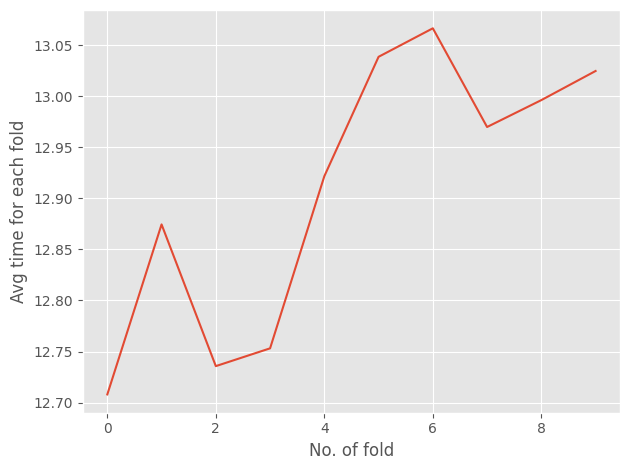

In [61]:
import matplotlib.pyplot as plt

times_nnl_n = np.zeros((10,100))
for i, row in enumerate(times_nnl):
    times_nnl_n[i, :len(row)] = row

times_nnl_n_n = np.mean(times_nnl_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_nnl_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("nnl times")
plt.show()

In [62]:
train_acc_nnl_n = np.zeros((10,100))
for i, row in enumerate(train_acc_nnl):
    train_acc_nnl_n[i, :len(row)] = row
    
test_acc_nnl_n = np.zeros((10,100))
for i, row in enumerate(test_acc_nnl):
    test_acc_nnl_n[i, :len(row)] = row
    
train_loss_nnl_n = np.zeros((10,100))
for i, row in enumerate(train_loss_nnl):
    train_loss_nnl_n[i, :len(row)] = row
    
test_loss_nnl_n = np.zeros((10,100))
for i, row in enumerate(test_loss_nnl):
    test_loss_nnl_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_nnl_n = np.mean(train_acc_nnl_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_nnl_n = np.mean(test_acc_nnl_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_nnl_n = np.mean(train_loss_nnl_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_nnl_n = np.mean(test_loss_nnl_n,axis=0)

In [63]:
data = [train_acc_nnl_n,test_acc_nnl_n,train_loss_nnl_n,test_loss_nnl_n]

df = pd.DataFrame(data)
df.to_csv('nnl_acc', index=False)
df = pd.read_csv('nnl_acc')

train_acc_nnl_n = df.iloc[0]
test_acc_nnl_n = df.iloc[1]
train_loss_nnl_n = df.iloc[2]
test_loss_nnl_n = df.iloc[3]


df_t = pd.DataFrame([times_nnl_n_n])
df_t.to_csv('nnl_times', index=False)
df_t = pd.read_csv('nnl_times')

times_nnl_n_n = df_t.iloc[0]

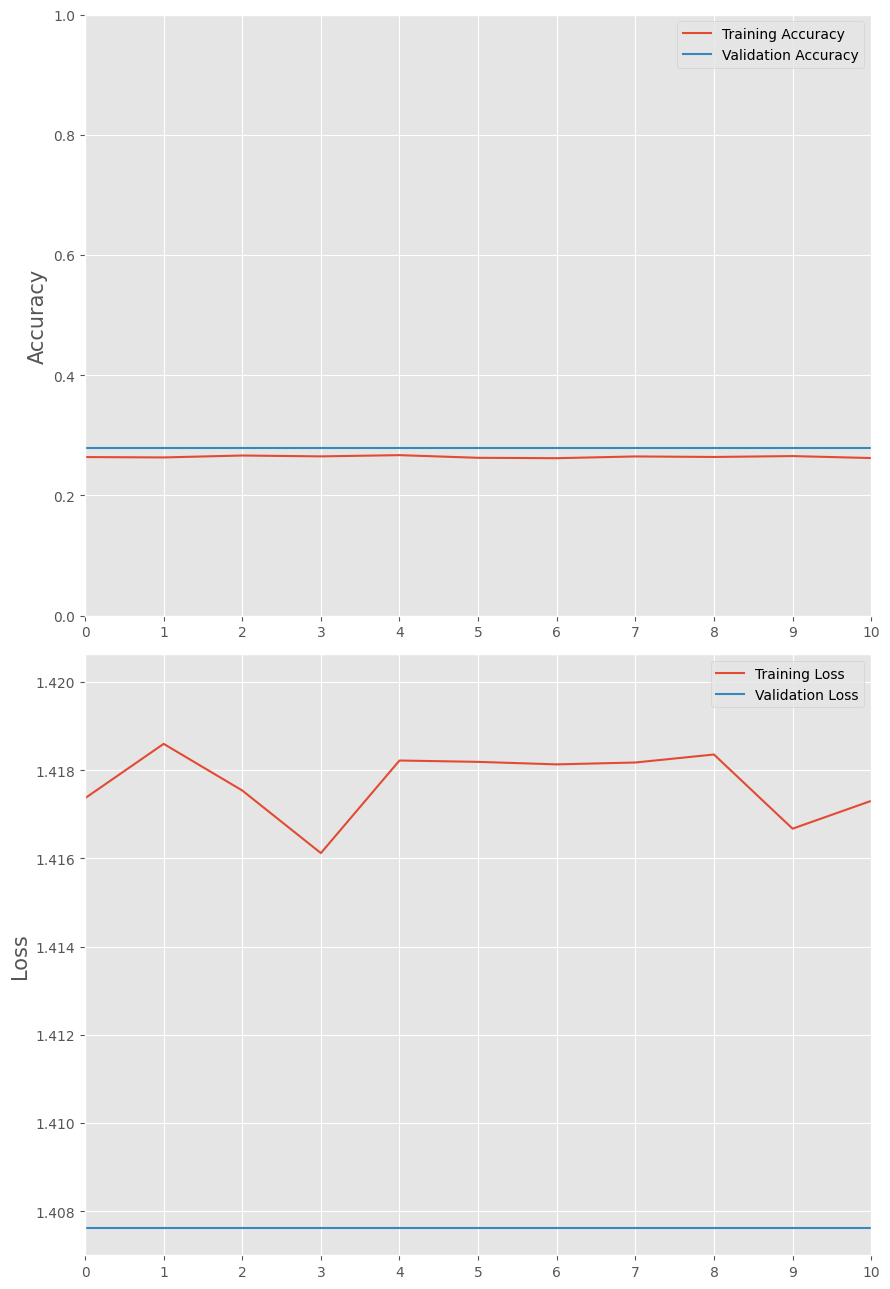

In [64]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_nnl_n, label='Training Accuracy')
axs[0].plot(test_acc_nnl_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_nnl_n, label='Training Loss')
axs[1].plot(test_loss_nnl_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("nnl Training and Testing Loss")
plt.show()

In [65]:
import gc
gc.collect()

23733

In [66]:
np.array(scores_nnl).shape

(10, 302, 4)

In [67]:
y_pred_nnl = np.argmax(scores_nnl,axis=2)

In [68]:
y_pred_nnl.shape

(10, 302)

In [69]:
from sklearn.metrics import accuracy_score
acc_scores_nnl = []
for i in range(len(y_test_all_nnl)):
    acc_scores_nnl.append(accuracy_score(y_true = y_test_all_nnl[i],y_pred = y_pred_nnl[i]))

In [70]:
acc_scores_nnl

[0.2582781456953642,
 0.22847682119205298,
 0.1357615894039735,
 0.31125827814569534,
 0.347682119205298,
 0.3576158940397351,
 0.27483443708609273,
 0.2052980132450331,
 0.3543046357615894,
 0.31456953642384106]

In [71]:
df_acc = pd.DataFrame([acc_scores_nnl])

df_acc.to_csv('nnl_accuracy', index=False)

df_acc = pd.read_csv('nnl_accuracy')

acc_scores_nnl = df_acc.iloc[0].values

In [72]:
y_test_all_n = np.array(y_test_all_nnl)

y_pred_nnl_n = y_pred_nnl.flatten()
y_test_all_n = y_test_all_n.flatten()

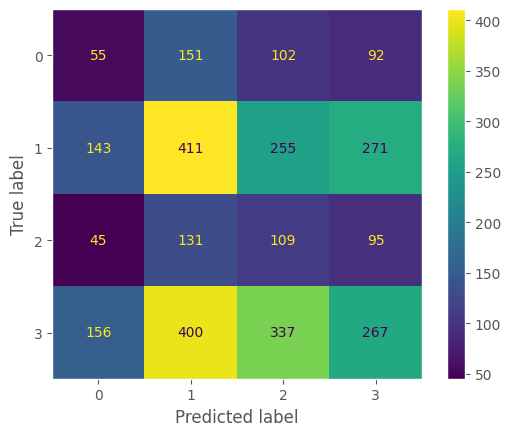

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_nnl_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("nnl")

plt.show()

In [74]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_nnl_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.14      0.14      0.14       400
           1       0.38      0.38      0.38      1080
           2       0.14      0.29      0.18       380
           3       0.37      0.23      0.28      1160

    accuracy                           0.28      3020
   macro avg       0.25      0.26      0.25      3020
weighted avg       0.31      0.28      0.29      3020



# NasNetMobile

In [75]:
import gc
gc.collect()

6029

In [76]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_nnb = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_nnb.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [77]:
def create_model_nnb():
    
    model_nnb = tf.keras.models.Sequential([
    tf.keras.applications.NASNetMobile(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_nnb.trainable = False
    return model_nnb

In [78]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nnb = []
y_test_all_nnb = []
train_acc_nnb = []
test_acc_nnb = []
train_loss_nnb = []
test_loss_nnb = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_nnb.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_nnb = None
    model_nnb = create_model_nnb()
        
    model_nnb.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_nnb.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_nnb.predict(X_test)
    
    scores_nnb.append(x)
    train_acc_nnb.append(history.history["accuracy"])
    test_acc_nnb.append(history.history["val_accuracy"])
    train_loss_nnb.append(history.history["loss"])
    test_loss_nnb.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 11s 63ms/step - loss: 1.7593 - accuracy: 0.1656 - val_loss: 1.6734 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7713 - accuracy: 0.1664 - val_loss: 1.6734 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 36ms/step - loss: 1.7678 - accuracy: 0.1664 - val_loss: 1.6734 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 37ms/step - loss: 1.7623 - accuracy: 0.1594 - val_loss: 1.6734 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 37ms/step - loss: 1.7718 - accuracy: 0.1635 - val_loss: 1.6734 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7725 - accuracy: 0.1627 - val_loss: 1.6734 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 7/100
77/77 [=========================

Time taken for epoch 29: 2.86 seconds
77/77 [==============================] - 3s 37ms/step - loss: 1.7495 - accuracy: 0.1705 - val_loss: 1.6734 - val_accuracy: 0.1397 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 36ms/step - loss: 1.7583 - accuracy: 0.1656 - val_loss: 1.6734 - val_accuracy: 0.1397 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 37ms/step - loss: 1.7586 - accuracy: 0.1652 - val_loss: 1.6734 - val_accuracy: 0.1397 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 37ms/step - loss: 1.7792 - accuracy: 0.1615 - val_loss: 1.6734 - val_accuracy: 0.1397 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 37ms/step - loss: 1.7585 - accuracy: 0.1668 - val_loss: 1.6734 - val_accuracy: 0.1397 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 3s 37ms/step - loss: 1.7564 - accuracy: 0.1721 - val_loss: 1.6734 - val_accuracy: 0.1397 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 3s 36ms/step - loss: 1.7732 - accuracy: 0.1693 - val_loss: 1.6734 - val_accuracy: 0.1397 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 36ms/step - loss: 1.7714 - accuracy: 0.1648 - val_loss: 1.6734 - val_accuracy: 0.1397 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 37ms/step - loss: 1.7785 - accuracy: 0.1549 - val_loss: 1.6734 - val_accuracy: 0.1397 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 37ms/step - loss: 1.7674 - accuracy: 0.1693 - val_loss: 1.6734 - val_accuracy: 0.1397 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 37ms/step - loss: 1.7508 - accuracy: 0.1717 - val_loss: 1.6734 - val_accuracy: 0.1397 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 37ms/step - loss: 1.7662 - accuracy: 0.1701 - val_loss: 1.6734 - val_accuracy: 0.1397 - lr: 2.5600e-09
Epoch 64/100
76/77 [====================

Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 1.5572 - accuracy: 0.3100
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 2.85 seconds
77/77 [==============================] - 3s 37ms/step - loss: 1.5589 - accuracy: 0.3091 - val_loss: 1.4864 - val_accuracy: 0.3603 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 37ms/step - loss: 1.5505 - accuracy: 0.3046 - val_loss: 1.4864 - val_accuracy: 0.3603 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 37ms/step - loss: 1.5513 - accuracy: 0.3107 - val_loss: 1.4864 - val_accuracy: 0.3603 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 3s 38ms/step - loss: 1.5619 - accuracy: 0.2984 - val_loss: 1.4864 - val_accuracy: 0.3603 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 3s 37ms/step - loss: 1.5685 - accuracy: 0.3074 - val_loss: 1.4864 - val_accuracy: 0.3603 - lr: 4.0000e-05
E

76/77 [============================>.] - ETA: 0s - loss: 1.5538 - accuracy: 0.3117
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 3.07 seconds
77/77 [==============================] - 3s 40ms/step - loss: 1.5524 - accuracy: 0.3119 - val_loss: 1.4864 - val_accuracy: 0.3603 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 3s 37ms/step - loss: 1.5549 - accuracy: 0.3103 - val_loss: 1.4864 - val_accuracy: 0.3603 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 3s 39ms/step - loss: 1.5617 - accuracy: 0.3074 - val_loss: 1.4864 - val_accuracy: 0.3603 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 3s 38ms/step - loss: 1.5579 - accuracy: 0.3038 - val_loss: 1.4864 - val_accuracy: 0.3603 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 3s 37ms/step - loss: 1.5711 - accuracy: 0.2939 - val_loss: 1.4864 - val_accuracy: 0.3603 - lr: 1.0240e-10
Epoch 76/100
7

77/77 [==============================] - 3s 35ms/step - loss: 1.6840 - accuracy: 0.1954 - val_loss: 1.6143 - val_accuracy: 0.1875 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 3s 35ms/step - loss: 1.6763 - accuracy: 0.1909 - val_loss: 1.6143 - val_accuracy: 0.1875 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 1.6839 - accuracy: 0.1982
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 2.70 seconds
77/77 [==============================] - 3s 35ms/step - loss: 1.6839 - accuracy: 0.1983 - val_loss: 1.6143 - val_accuracy: 0.1875 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 35ms/step - loss: 1.6711 - accuracy: 0.1971 - val_loss: 1.6143 - val_accuracy: 0.1875 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 35ms/step - loss: 1.6758 - accuracy: 0.1897 - val_loss: 1.6143 - val_accuracy: 0.1875 - lr: 1.6000e-06
Epoch 32/100
7

77/77 [==============================] - 3s 35ms/step - loss: 1.6742 - accuracy: 0.1807 - val_loss: 1.6143 - val_accuracy: 0.1875 - lr: 2.0480e-11
Epoch 84/100
40/77 [==============>...............] - ETA: 1s - loss: 1.6622 - accuracy: 0.1937

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [79]:
import gc
gc.collect()

In [80]:
import matplotlib.pyplot as plt

times_nnb_n = np.zeros((10,100))
for i, row in enumerate(times_nnb):
    times_nnb_n[i, :len(row)] = row

times_nnb_n_n = np.mean(times_nnb_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_nnb_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("nnb times")
plt.show()

In [81]:
train_acc_nnb_n = np.zeros((10,100))
for i, row in enumerate(train_acc_nnb):
    train_acc_nnb_n[i, :len(row)] = row
    
test_acc_nnb_n = np.zeros((10,100))
for i, row in enumerate(test_acc_nnb):
    test_acc_nnb_n[i, :len(row)] = row
    
train_loss_nnb_n = np.zeros((10,100))
for i, row in enumerate(train_loss_nnb):
    train_loss_nnb_n[i, :len(row)] = row
    
test_loss_nnb_n = np.zeros((10,100))
for i, row in enumerate(test_loss_nnb):
    test_loss_nnb_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_nnb_n = np.mean(train_acc_nnb_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_nnb_n = np.mean(test_acc_nnb_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_nnb_n = np.mean(train_loss_nnb_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_nnb_n = np.mean(test_loss_nnb_n,axis=0)

In [82]:
data = [train_acc_nnb_n,test_acc_nnb_n,train_loss_nnb_n,test_loss_nnb_n]

df = pd.DataFrame(data)
df.to_csv('nnb_acc', index=False)
df = pd.read_csv('nnb_acc')

train_acc_nnb_n = df.iloc[0]
test_acc_nnb_n = df.iloc[1]
train_loss_nnb_n = df.iloc[2]
test_loss_nnb_n = df.iloc[3]


df_t = pd.DataFrame([times_nnb_n_n])
df_t.to_csv('nnb_times', index=False)
df_t = pd.read_csv('nnb_times')

times_nnb_n_n = df_t.iloc[0]

In [83]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_nnb_n, label='Training Accuracy')
axs[0].plot(test_acc_nnb_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_nnb_n, label='Training Loss')
axs[1].plot(test_loss_nnb_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("nnb Training and Testing Loss")
plt.show()

In [84]:
np.array(scores_nnb).shape

In [85]:
y_pred_nnb = np.argmax(scores_nnb,axis=2)

In [86]:
y_pred_nnb.shape

In [87]:
from sklearn.metrics import accuracy_score
acc_scores_nnb = []
for i in range(len(y_test_all_nnb)):
    acc_scores_nnb.append(accuracy_score(y_true = y_test_all_nnb[i],y_pred = y_pred_nnb[i]))

In [88]:
import gc
gc.collect()

In [89]:
acc_scores_nnb

In [90]:
df_acc = pd.DataFrame([acc_scores_nnb])

df_acc.to_csv('nnb_accuracy', index=False)

df_acc = pd.read_csv('nnb_accuracy')

acc_scores_nnb = df_acc.iloc[0].values

In [91]:
y_test_all_n = np.array(y_test_all_nnb)

y_pred_nnb_n = y_pred_nnb.flatten()
y_test_all_n = y_test_all_n.flatten()

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_nnb_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("nnb")

plt.show()

In [93]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_nnb_n)
print(cf_r)

# AlexNet

In [94]:
import gc
gc.collect()

In [95]:
X.shape

In [96]:
X_tl = np.concatenate([X,X,X],axis=-1)

In [97]:
X_tl.shape

In [98]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_axn = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_axn.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 5, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [99]:
import gc
gc.collect()

In [100]:
from keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [101]:
def create_model_axn():
    
    model_axn = Sequential()
    model_axn.add(Conv2D(filters=96,kernel_size=(3,3),strides=(4,4),input_shape=(X_tl.shape[1],X_tl.shape[2],X_tl.shape[3]), activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model_axn.add(Conv2D(256,(5,5),padding='same',activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model_axn.add(Conv2D(384,(3,3),padding='same',activation='relu'))
    model_axn.add(Conv2D(384,(3,3),padding='same',activation='relu'))
    model_axn.add(Conv2D(256,(3,3),padding='same',activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

    model_axn.add(Flatten())
    model_axn.add(Dense(4096, activation='relu'))
    model_axn.add(Dropout(0.4))
    model_axn.add(Dense(4096, activation='relu'))
    model_axn.add(Dropout(0.4))
    model_axn.add(Dense(4,activation='softmax'))

    return model_axn

In [102]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_axn = []
y_test_all_axn = []
train_acc_axn = []
test_acc_axn = []
train_loss_axn = []
test_loss_axn = []

for index, (train_indices, val_indices) in enumerate(skf.split(X_n, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_tl[train_indices], X_tl[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_axn.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_axn = None
    model_axn = create_model_axn()
        
    model_axn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_axn.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_axn.predict(X_test)
    
    scores_axn.append(x)
    train_acc_axn.append(history.history["accuracy"])
    test_acc_axn.append(history.history["val_accuracy"])
    train_loss_axn.append(history.history["loss"])
    test_loss_axn.append(history.history["val_loss"])
    
    gc.collect()

In [103]:
import matplotlib.pyplot as plt

times_axn_n = np.zeros((10,100))
for i, row in enumerate(times_axn):
    times_axn_n[i, :len(row)] = row

times_axn_n_n = np.mean(times_axn_n,axis=1)

plt.plot(times_axn_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("axn times")
plt.show()

In [104]:
times_axn_n_n

In [105]:
train_acc_axn_n = np.zeros((10,100))
for i, row in enumerate(train_acc_axn):
    train_acc_axn_n[i, :len(row)] = row
    
test_acc_axn_n = np.zeros((10,100))
for i, row in enumerate(test_acc_axn):
    test_acc_axn_n[i, :len(row)] = row
    
train_loss_axn_n = np.zeros((10,100))
for i, row in enumerate(train_loss_axn):
    train_loss_axn_n[i, :len(row)] = row
    
test_loss_axn_n = np.zeros((10,100))
for i, row in enumerate(test_loss_axn):
    test_loss_axn_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_axn_n = np.mean(train_acc_axn_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_axn_n = np.mean(test_acc_axn_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_axn_n = np.mean(train_loss_axn_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_axn_n = np.mean(test_loss_axn_n,axis=0)

In [106]:
data = [train_acc_axn_n,test_acc_axn_n,train_loss_axn_n,test_loss_axn_n]

df = pd.DataFrame(data)
df.to_csv('axn_acc', index=False)
df = pd.read_csv('axn_acc')

train_acc_axn_n = df.iloc[0]
test_acc_axn_n = df.iloc[1]
train_loss_axn_n = df.iloc[2]
test_loss_axn_n = df.iloc[3]


df_t = pd.DataFrame([times_axn_n_n])
df_t.to_csv('axn_times', index=False)
df_t = pd.read_csv('axn_times')

times_axn_n_n = df_t.iloc[0]

In [107]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_axn_n, label='Training Accuracy')
axs[0].plot(test_acc_axn_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_axn_n, label='Training Loss')
axs[1].plot(test_loss_axn_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim(train_loss_axn_n.min(),train_loss_axn_n.max())
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("axn Training and Testing Loss")
plt.show()

In [108]:
import gc
gc.collect()

In [109]:
np.array(scores_axn).shape

In [110]:
y_pred_axn = np.argmax(scores_axn,axis=2)

In [111]:
y_pred_axn.shape

In [112]:
from sklearn.metrics import accuracy_score
acc_scores_axn = []
for i in range(len(y_test_all_axn)):
    acc_scores_axn.append(accuracy_score(y_true = y_test_all_axn[i],y_pred = y_pred_axn[i]))

In [113]:
acc_scores_axn

In [114]:
df_acc = pd.DataFrame([acc_scores_axn])

df_acc.to_csv('axn_accuracy', index=False)

df_acc = pd.read_csv('axn_accuracy')

acc_scores_axn = df_acc.iloc[0].values

In [115]:
y_test_all_n = np.array(y_test_all_axn)

y_pred_axn_n = y_pred_axn.flatten()
y_test_all_n = y_test_all_n.flatten()

In [116]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_axn_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("axn")
plt.show()

In [117]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_axn_n)
print(cf_r)

# EfficientNetB7

In [118]:
import gc
gc.collect()

In [119]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_enb7 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_enb7.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [120]:
def create_model_enb7():
    
    model_enb7 = tf.keras.models.Sequential([
    tf.keras.applications.EfficientNetB7(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_enb7.trainable = False
    return model_enb7

In [121]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_enb7 = []
y_test_all_enb7 = []
train_acc_enb7 = []
test_acc_enb7 = []
train_loss_enb7 = []
test_loss_enb7 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_enb7.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_enb7 = None
    model_enb7 = create_model_enb7()
        
    model_enb7.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_enb7.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [ reduce_lr,time_callback])
    
    
    x = model_enb7.predict(X_test)
    
    scores_enb7.append(x)
    train_acc_enb7.append(history.history["accuracy"])
    test_acc_enb7.append(history.history["val_accuracy"])
    train_loss_enb7.append(history.history["loss"])
    test_loss_enb7.append(history.history["val_loss"])
    
    gc.collect()

77/77 [==============================] - 13s 164ms/step - loss: 1.4113 - accuracy: 0.3307 - val_loss: 1.3885 - val_accuracy: 0.3419 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 13s 165ms/step - loss: 1.4003 - accuracy: 0.3377 - val_loss: 1.3885 - val_accuracy: 0.3419 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3971 - accuracy: 0.3352 - val_loss: 1.3885 - val_accuracy: 0.3419 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4003 - accuracy: 0.3336 - val_loss: 1.3885 - val_accuracy: 0.3419 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.4057 - accuracy: 0.3303
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 12.79 seconds
77/77 [==============================] - 13s 166ms/step - loss: 1.4057 - accuracy: 0.3303 - val_loss: 1.3885 - val_accuracy: 0.3419 - lr: 1.0240e-10
Epo

Epoch 2/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4129 - accuracy: 0.2702 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4145 - accuracy: 0.2809 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3950 - accuracy: 0.2903 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4024 - accuracy: 0.2817 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4107 - accuracy: 0.2866 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4020 - accuracy: 0.2972 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 

Epoch 30/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4119 - accuracy: 0.2800 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4006 - accuracy: 0.2935 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4023 - accuracy: 0.2944 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4117 - accuracy: 0.2776 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4234 - accuracy: 0.2723 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4086 - accuracy: 0.2731 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 1.6000e-06
Epoch 36/100
77/77 [========

Epoch 58/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4038 - accuracy: 0.3009 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4068 - accuracy: 0.2870 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4080 - accuracy: 0.2907 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4104 - accuracy: 0.2841 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3981 - accuracy: 0.2911 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4010 - accuracy: 0.2878 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 2.5600e-09
Epoch 64/100
77/77 [========

Epoch 86/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4033 - accuracy: 0.2780 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4119 - accuracy: 0.2809 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4017 - accuracy: 0.2984 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4025 - accuracy: 0.2952 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4236 - accuracy: 0.2661 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4063 - accuracy: 0.2854 - val_loss: 1.3693 - val_accuracy: 0.3272 - lr: 4.0960e-12
Epoch 92/100
77/77 [========

77/77 [==============================] - 13s 166ms/step - loss: 1.4001 - accuracy: 0.2457 - val_loss: 1.3610 - val_accuracy: 0.3125 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.4077 - accuracy: 0.2784
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 12.76 seconds
77/77 [==============================] - 13s 166ms/step - loss: 1.4077 - accuracy: 0.2784 - val_loss: 1.3610 - val_accuracy: 0.3125 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4000 - accuracy: 0.2727 - val_loss: 1.3610 - val_accuracy: 0.3125 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4062 - accuracy: 0.2596 - val_loss: 1.3610 - val_accuracy: 0.3125 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4039 - accuracy: 0.2698 - val_loss: 1.3610 - val_accuracy: 0.3125 - lr: 4.0000e-05
Epo

Epoch 42/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4013 - accuracy: 0.2723 - val_loss: 1.3610 - val_accuracy: 0.3125 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.4004 - accuracy: 0.2723
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 12.84 seconds
77/77 [==============================] - 13s 167ms/step - loss: 1.4004 - accuracy: 0.2723 - val_loss: 1.3610 - val_accuracy: 0.3125 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4069 - accuracy: 0.2653 - val_loss: 1.3610 - val_accuracy: 0.3125 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4042 - accuracy: 0.2686 - val_loss: 1.3610 - val_accuracy: 0.3125 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4054 - accuracy: 0.2612 - val_loss: 1.3610 - val_accuracy: 0.3125 - lr: 6.

Epoch 70/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4027 - accuracy: 0.2784 - val_loss: 1.3610 - val_accuracy: 0.3125 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.3946 - accuracy: 0.2800
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 12.78 seconds
77/77 [==============================] - 13s 166ms/step - loss: 1.3946 - accuracy: 0.2800 - val_loss: 1.3610 - val_accuracy: 0.3125 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4073 - accuracy: 0.2572 - val_loss: 1.3610 - val_accuracy: 0.3125 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4116 - accuracy: 0.2596 - val_loss: 1.3610 - val_accuracy: 0.3125 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4063 - accuracy: 0.2567 - val_loss: 1.3610 - val_accuracy: 0.3125 - lr: 1

Epoch 98/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3996 - accuracy: 0.2780 - val_loss: 1.3610 - val_accuracy: 0.3125 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.4045 - accuracy: 0.2543
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 12.76 seconds
77/77 [==============================] - 13s 166ms/step - loss: 1.4045 - accuracy: 0.2543 - val_loss: 1.3610 - val_accuracy: 0.3125 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 4s 137ms/step
Training on fold 5/10...
Epoch 1/100
77/77 [==============================] - 29s 196ms/step - loss: 1.5262 - accuracy: 0.1529 - val_loss: 1.5078 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 165ms/step - loss: 1.5298 - accuracy: 0.1488 - val_loss: 1.5078 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 13s 166ms/step 

Epoch 26/100
77/77 [==============================] - 13s 166ms/step - loss: 1.5412 - accuracy: 0.1472 - val_loss: 1.5078 - val_accuracy: 0.1287 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 13s 167ms/step - loss: 1.5347 - accuracy: 0.1594 - val_loss: 1.5078 - val_accuracy: 0.1287 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 13s 167ms/step - loss: 1.5399 - accuracy: 0.1455 - val_loss: 1.5078 - val_accuracy: 0.1287 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.5376 - accuracy: 0.1464
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 12.75 seconds
77/77 [==============================] - 13s 166ms/step - loss: 1.5376 - accuracy: 0.1464 - val_loss: 1.5078 - val_accuracy: 0.1287 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 13s 165ms/step - loss: 1.5392 - accuracy: 0.1394 - val_loss: 1.5078 - val_accuracy: 0.1287 - lr: 1

Epoch 54/100
77/77 [==============================] - 13s 166ms/step - loss: 1.5440 - accuracy: 0.1431 - val_loss: 1.5078 - val_accuracy: 0.1287 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 13s 167ms/step - loss: 1.5314 - accuracy: 0.1574 - val_loss: 1.5078 - val_accuracy: 0.1287 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 13s 167ms/step - loss: 1.5225 - accuracy: 0.1619 - val_loss: 1.5078 - val_accuracy: 0.1287 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.5304 - accuracy: 0.1517
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 12.75 seconds
77/77 [==============================] - 13s 166ms/step - loss: 1.5304 - accuracy: 0.1517 - val_loss: 1.5078 - val_accuracy: 0.1287 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 13s 165ms/step - loss: 1.5322 - accuracy: 0.1500 - val_loss: 1.5078 - val_accuracy: 0.1287 - lr: 2

Epoch 82/100
77/77 [==============================] - 13s 166ms/step - loss: 1.5246 - accuracy: 0.1594 - val_loss: 1.5078 - val_accuracy: 0.1287 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 13s 167ms/step - loss: 1.5352 - accuracy: 0.1537 - val_loss: 1.5078 - val_accuracy: 0.1287 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 13s 167ms/step - loss: 1.5406 - accuracy: 0.1398 - val_loss: 1.5078 - val_accuracy: 0.1287 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.5303 - accuracy: 0.1525
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 12.68 seconds
77/77 [==============================] - 13s 165ms/step - loss: 1.5303 - accuracy: 0.1525 - val_loss: 1.5078 - val_accuracy: 0.1287 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 13s 165ms/step - loss: 1.5273 - accuracy: 0.1529 - val_loss: 1.5078 - val_accuracy: 0.1287 - lr: 4.

Epoch 10/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4839 - accuracy: 0.2040 - val_loss: 1.4731 - val_accuracy: 0.1176 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 13s 165ms/step - loss: 1.4802 - accuracy: 0.1926 - val_loss: 1.4731 - val_accuracy: 0.1176 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 13s 165ms/step - loss: 1.4924 - accuracy: 0.2048 - val_loss: 1.4731 - val_accuracy: 0.1176 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4904 - accuracy: 0.1889 - val_loss: 1.4731 - val_accuracy: 0.1176 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4866 - accuracy: 0.1909 - val_loss: 1.4731 - val_accuracy: 0.1176 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.4801 - accuracy: 0.2024
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for e

Epoch 38/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4913 - accuracy: 0.1848 - val_loss: 1.4731 - val_accuracy: 0.1176 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 13s 165ms/step - loss: 1.4876 - accuracy: 0.2065 - val_loss: 1.4731 - val_accuracy: 0.1176 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 13s 165ms/step - loss: 1.5000 - accuracy: 0.1827 - val_loss: 1.4731 - val_accuracy: 0.1176 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 13s 165ms/step - loss: 1.4951 - accuracy: 0.1979 - val_loss: 1.4731 - val_accuracy: 0.1176 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4821 - accuracy: 0.1966 - val_loss: 1.4731 - val_accuracy: 0.1176 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.4842 - accuracy: 0.1966
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for ep

Epoch 66/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4920 - accuracy: 0.1832 - val_loss: 1.4731 - val_accuracy: 0.1176 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 13s 165ms/step - loss: 1.4869 - accuracy: 0.2101 - val_loss: 1.4731 - val_accuracy: 0.1176 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 13s 164ms/step - loss: 1.4916 - accuracy: 0.1942 - val_loss: 1.4731 - val_accuracy: 0.1176 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4842 - accuracy: 0.1987 - val_loss: 1.4731 - val_accuracy: 0.1176 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 13s 165ms/step - loss: 1.4752 - accuracy: 0.2056 - val_loss: 1.4731 - val_accuracy: 0.1176 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.4862 - accuracy: 0.1868
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for e

Epoch 94/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4946 - accuracy: 0.1909 - val_loss: 1.4731 - val_accuracy: 0.1176 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4739 - accuracy: 0.1938 - val_loss: 1.4731 - val_accuracy: 0.1176 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 13s 165ms/step - loss: 1.4931 - accuracy: 0.1872 - val_loss: 1.4731 - val_accuracy: 0.1176 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4960 - accuracy: 0.1885 - val_loss: 1.4731 - val_accuracy: 0.1176 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4855 - accuracy: 0.1942 - val_loss: 1.4731 - val_accuracy: 0.1176 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.4812 - accuracy: 0.1958
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for e

77/77 [==============================] - ETA: 0s - loss: 1.4211 - accuracy: 0.2285
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 12.77 seconds
77/77 [==============================] - 13s 166ms/step - loss: 1.4211 - accuracy: 0.2285 - val_loss: 1.4228 - val_accuracy: 0.1140 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 13s 164ms/step - loss: 1.4296 - accuracy: 0.2236 - val_loss: 1.4228 - val_accuracy: 0.1140 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4203 - accuracy: 0.2400 - val_loss: 1.4228 - val_accuracy: 0.1140 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4260 - accuracy: 0.2240 - val_loss: 1.4228 - val_accuracy: 0.1140 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4236 - accuracy: 0.2269 - val_loss: 1.4228 - val_accuracy: 0.1140 - lr: 8.0000e-06
Epoc

Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.4286 - accuracy: 0.2224
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 12.72 seconds
77/77 [==============================] - 13s 165ms/step - loss: 1.4286 - accuracy: 0.2224 - val_loss: 1.4228 - val_accuracy: 0.1140 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 13s 165ms/step - loss: 1.4230 - accuracy: 0.2208 - val_loss: 1.4228 - val_accuracy: 0.1140 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4160 - accuracy: 0.2289 - val_loss: 1.4228 - val_accuracy: 0.1140 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4186 - accuracy: 0.2167 - val_loss: 1.4228 - val_accuracy: 0.1140 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4230 - accuracy: 0.2306 - val_loss: 1.4228 - val_accuracy: 0.1140 - lr: 1

Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.4251 - accuracy: 0.2183
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 12.76 seconds
77/77 [==============================] - 13s 166ms/step - loss: 1.4251 - accuracy: 0.2183 - val_loss: 1.4228 - val_accuracy: 0.1140 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 13s 165ms/step - loss: 1.4218 - accuracy: 0.2171 - val_loss: 1.4228 - val_accuracy: 0.1140 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 13s 165ms/step - loss: 1.4210 - accuracy: 0.2277 - val_loss: 1.4228 - val_accuracy: 0.1140 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4220 - accuracy: 0.2375 - val_loss: 1.4228 - val_accuracy: 0.1140 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4283 - accuracy: 0.2069 - val_loss: 1.4228 - val_accuracy: 0.1140 - lr: 2

Epoch 6/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3218 - accuracy: 0.3786 - val_loss: 1.2953 - val_accuracy: 0.4044 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3216 - accuracy: 0.3786 - val_loss: 1.2953 - val_accuracy: 0.4044 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 1.3283 - accuracy: 0.3753
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 12.73 seconds
77/77 [==============================] - 13s 166ms/step - loss: 1.3283 - accuracy: 0.3753 - val_loss: 1.2953 - val_accuracy: 0.4044 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3264 - accuracy: 0.3778 - val_loss: 1.2953 - val_accuracy: 0.4044 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3179 - accuracy: 0.3778 - val_loss: 1.2953 - val_accuracy: 0.4044 - lr: 2.0000e-04
Epoch 11

Epoch 34/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3234 - accuracy: 0.3782 - val_loss: 1.2953 - val_accuracy: 0.4044 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3227 - accuracy: 0.3790 - val_loss: 1.2953 - val_accuracy: 0.4044 - lr: 1.6000e-06
Epoch 36/100
77/77 [==============================] - ETA: 0s - loss: 1.3270 - accuracy: 0.3798
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 12.78 seconds
77/77 [==============================] - 13s 166ms/step - loss: 1.3270 - accuracy: 0.3798 - val_loss: 1.2953 - val_accuracy: 0.4044 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3123 - accuracy: 0.3806 - val_loss: 1.2953 - val_accuracy: 0.4044 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3331 - accuracy: 0.3745 - val_loss: 1.2953 - val_accuracy: 0.4044 - lr: 3.

Epoch 62/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3267 - accuracy: 0.3786 - val_loss: 1.2953 - val_accuracy: 0.4044 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3254 - accuracy: 0.3802 - val_loss: 1.2953 - val_accuracy: 0.4044 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 1.3195 - accuracy: 0.3814
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 12.81 seconds
77/77 [==============================] - 13s 167ms/step - loss: 1.3195 - accuracy: 0.3814 - val_loss: 1.2953 - val_accuracy: 0.4044 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3217 - accuracy: 0.3786 - val_loss: 1.2953 - val_accuracy: 0.4044 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3299 - accuracy: 0.3778 - val_loss: 1.2953 - val_accuracy: 0.4044 - lr: 5.12

Epoch 90/100
77/77 [==============================] - 13s 165ms/step - loss: 1.3279 - accuracy: 0.3790 - val_loss: 1.2953 - val_accuracy: 0.4044 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 13s 165ms/step - loss: 1.3268 - accuracy: 0.3724 - val_loss: 1.2953 - val_accuracy: 0.4044 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 1.3239 - accuracy: 0.3806
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 12.76 seconds
77/77 [==============================] - 13s 166ms/step - loss: 1.3239 - accuracy: 0.3806 - val_loss: 1.2953 - val_accuracy: 0.4044 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3246 - accuracy: 0.3806 - val_loss: 1.2953 - val_accuracy: 0.4044 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3234 - accuracy: 0.3818 - val_loss: 1.2953 - val_accuracy: 0.4044 - lr: 8.

Epoch 18/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3702 - accuracy: 0.3287 - val_loss: 1.3657 - val_accuracy: 0.3309 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3770 - accuracy: 0.3332 - val_loss: 1.3657 - val_accuracy: 0.3309 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3735 - accuracy: 0.3230 - val_loss: 1.3657 - val_accuracy: 0.3309 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3645 - accuracy: 0.3385 - val_loss: 1.3657 - val_accuracy: 0.3309 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.3683 - accuracy: 0.3299
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 12.79 seconds
77/77 [==============================] - 13s 166ms/step - loss: 1.3683 - accuracy: 0.3299 - val_loss: 1.3657 - val_accuracy: 0.3309 - lr: 4.

Epoch 46/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3721 - accuracy: 0.3230 - val_loss: 1.3657 - val_accuracy: 0.3309 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3701 - accuracy: 0.3434 - val_loss: 1.3657 - val_accuracy: 0.3309 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3768 - accuracy: 0.3246 - val_loss: 1.3657 - val_accuracy: 0.3309 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3673 - accuracy: 0.3430 - val_loss: 1.3657 - val_accuracy: 0.3309 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.3694 - accuracy: 0.3442
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 12.85 seconds
77/77 [==============================] - 13s 167ms/step - loss: 1.3694 - accuracy: 0.3442 - val_loss: 1.3657 - val_accuracy: 0.3309 - lr: 6

Epoch 74/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3764 - accuracy: 0.3352 - val_loss: 1.3657 - val_accuracy: 0.3309 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3699 - accuracy: 0.3271 - val_loss: 1.3657 - val_accuracy: 0.3309 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 13s 166ms/step - loss: 1.3740 - accuracy: 0.3271 - val_loss: 1.3657 - val_accuracy: 0.3309 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 13s 167ms/step - loss: 1.3731 - accuracy: 0.3242 - val_loss: 1.3657 - val_accuracy: 0.3309 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.3695 - accuracy: 0.3332
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 12.82 seconds
77/77 [==============================] - 13s 167ms/step - loss: 1.3695 - accuracy: 0.3332 - val_loss: 1.3657 - val_accuracy: 0.3309 - lr: 1

Epoch 2/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4134 - accuracy: 0.3312 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4203 - accuracy: 0.3160 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4130 - accuracy: 0.3091 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4146 - accuracy: 0.3152 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 13s 165ms/step - loss: 1.4196 - accuracy: 0.3083 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 13s 165ms/step - loss: 1.4244 - accuracy: 0.3242 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 

Epoch 30/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4299 - accuracy: 0.3156 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4210 - accuracy: 0.3181 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4129 - accuracy: 0.3226 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4200 - accuracy: 0.3164 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4142 - accuracy: 0.3209 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 13s 164ms/step - loss: 1.4119 - accuracy: 0.3066 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 1.6000e-06
Epoch 36/100
77/77 [========

Epoch 58/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4218 - accuracy: 0.3054 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4272 - accuracy: 0.3058 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4158 - accuracy: 0.3115 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4187 - accuracy: 0.3189 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4127 - accuracy: 0.3238 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 13s 165ms/step - loss: 1.4225 - accuracy: 0.3201 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 2.5600e-09
Epoch 64/100
77/77 [========

Epoch 86/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4093 - accuracy: 0.3197 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4235 - accuracy: 0.3078 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4212 - accuracy: 0.3152 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4283 - accuracy: 0.3111 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4168 - accuracy: 0.3185 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 13s 165ms/step - loss: 1.4191 - accuracy: 0.3160 - val_loss: 1.4030 - val_accuracy: 0.3456 - lr: 4.0960e-12
Epoch 92/100
77/77 [========

ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_59/efficientnetb7/block2a_expand_bn/FusedBatchNormV3' defined at (most recent call last):
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\DSAI\AppData\Local\Temp\ipykernel_17516\2356963082.py", line 33, in <module>
      x = model_enb7.predict(X_test)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 850, in call
      outputs = self._fused_batch_norm(inputs, training=training)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 660, in _fused_batch_norm
      output, mean, variance = control_flow_util.smart_cond(
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\utils\control_flow_util.py", line 108, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 649, in _fused_batch_norm_inference
      return tf.compat.v1.nn.fused_batch_norm(
Node: 'sequential_59/efficientnetb7/block2a_expand_bn/FusedBatchNormV3'
OOM when allocating tensor with shape[32,130,50,192] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_59/efficientnetb7/block2a_expand_bn/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_predict_function_4856263]

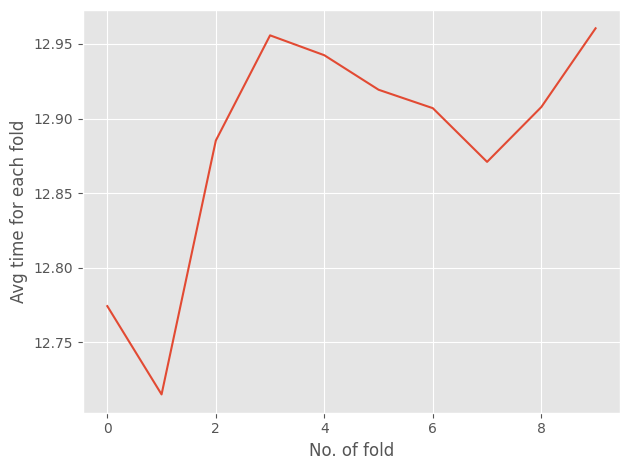

In [122]:
import matplotlib.pyplot as plt

times_enb7_n = np.zeros((10,100))
for i, row in enumerate(times_enb7):
    times_enb7_n[i, :len(row)] = row

times_enb7_n_n = np.mean(times_enb7_n,axis=1)
plt.style.use('ggplot')
plt.plot(times_enb7_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")

plt.tight_layout()
plt.savefig("enb7 times")
plt.show()

In [123]:
import gc
gc.collect()

68377

In [124]:
train_acc_enb7_n = np.zeros((10,100))
for i, row in enumerate(train_acc_enb7):
    train_acc_enb7_n[i, :len(row)] = row
    
test_acc_enb7_n = np.zeros((10,100))
for i, row in enumerate(test_acc_enb7):
    test_acc_enb7_n[i, :len(row)] = row
    
train_loss_enb7_n = np.zeros((10,100))
for i, row in enumerate(train_loss_enb7):
    train_loss_enb7_n[i, :len(row)] = row
    
test_loss_enb7_n = np.zeros((10,100))
for i, row in enumerate(test_loss_enb7):
    test_loss_enb7_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_enb7_n = np.mean(train_acc_enb7_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_enb7_n = np.mean(test_acc_enb7_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_enb7_n = np.mean(train_loss_enb7_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_enb7_n = np.mean(test_loss_enb7_n,axis=0)

In [125]:
data = [train_acc_enb7_n,test_acc_enb7_n,train_loss_enb7_n,test_loss_enb7_n]

df = pd.DataFrame(data)
df.to_csv('enb7_acc', index=False)
df = pd.read_csv('enb7_acc')

train_acc_enb7_n = df.iloc[0]
test_acc_enb7_n = df.iloc[1]
train_loss_enb7_n = df.iloc[2]
test_loss_enb7_n = df.iloc[3]


df_t = pd.DataFrame([times_enb7_n_n])
df_t.to_csv('enb7_times', index=False)
df_t = pd.read_csv('enb7_times')

times_enb7_n_n = df_t.iloc[0]

In [126]:
test_loss_enb7_n

0     1.257552
1     1.257552
2     1.257552
3     1.257552
4     1.257552
        ...   
95    1.257552
96    1.257552
97    1.257552
98    1.257552
99    1.257552
Name: 3, Length: 100, dtype: float64

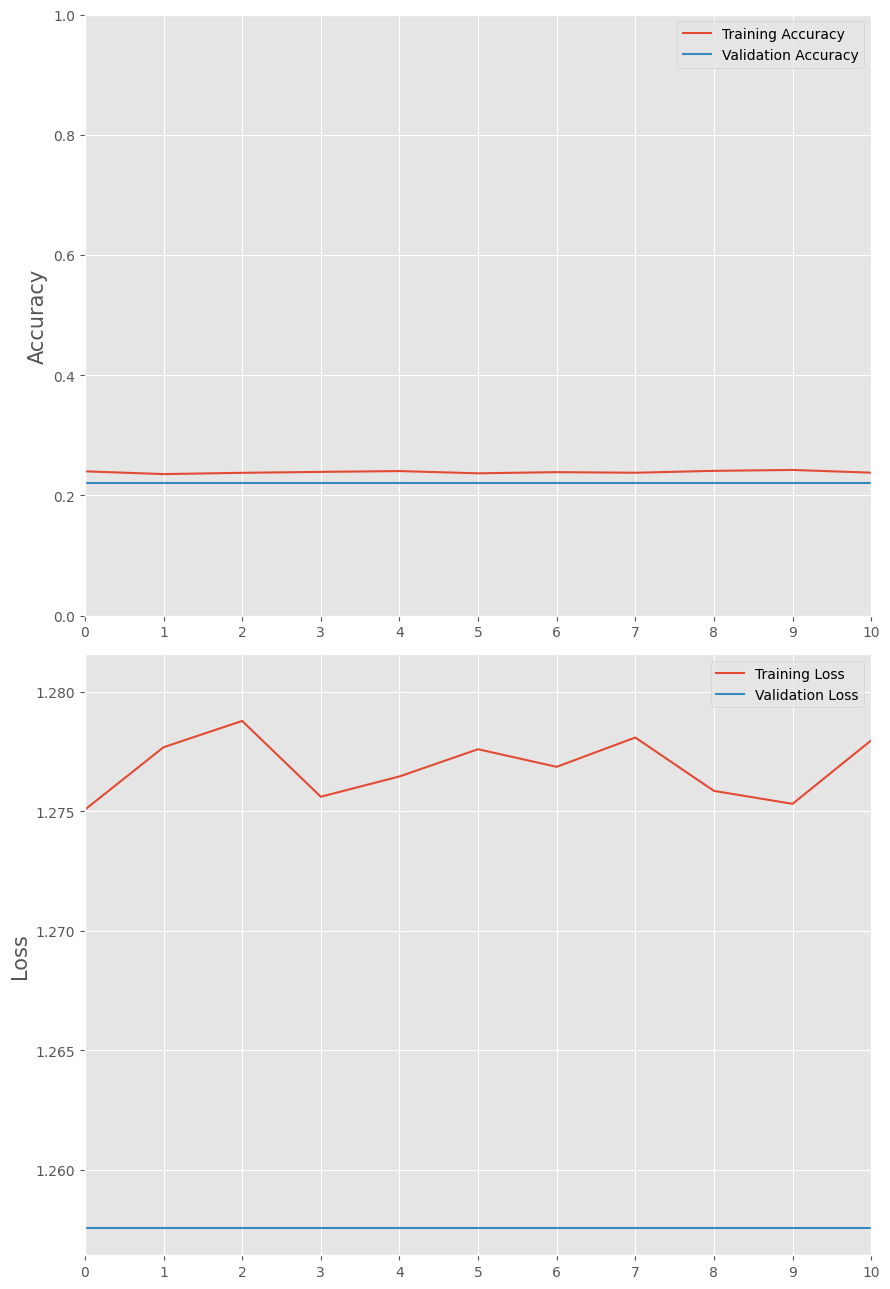

In [127]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_enb7_n, label='Training Accuracy')
axs[0].plot(test_acc_enb7_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_enb7_n, label='Training Loss')
axs[1].plot(test_loss_enb7_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,10])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("enb7 Training and Testing Loss")
plt.show()

In [128]:
np.array(scores_enb7).shape

(9, 302, 4)

In [129]:
y_pred_enb7 = np.argmax(scores_enb7,axis=2)

In [140]:
x = y_pred_enb7.copy()

In [143]:
x.shape

(9, 302)

In [144]:
sixth_row = x[5].copy()

# Create a new row to be added
new_row = np.zeros((1, 302))  # Replace this with the desired values for the new row

# Stack the sixth row and the new row vertically
new_array = np.vstack((x, sixth_row, new_row))

In [ ]:
x.shape

In [131]:
np.array(y_test_all_enb7).shape

(10, 302)

In [132]:
from sklearn.metrics import accuracy_score
acc_scores_enb7 = []
for i in range(len(y_test_all_enb7)):
    acc_scores_enb7.append(accuracy_score(y_true = y_test_all_enb7[i],y_pred = y_pred_enb7[i]))

IndexError: index 9 is out of bounds for axis 0 with size 9

In [ ]:
acc_scores_enb7

In [ ]:
df_acc = pd.DataFrame([acc_scores_enb7])

df_acc.to_csv('enb7_accuracy', index=False)

df_acc = pd.read_csv('enb7_accuracy')

acc_scores_enb7 = df_acc.iloc[0].values

In [ ]:
y_test_all_n = np.array(y_test_all_enb7)

y_pred_enb7_n = y_pred_enb7.flatten()
y_test_all_n = y_test_all_n.flatten()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_enb7_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("enb7")

plt.show()

In [ ]:
import gc
gc.collect()

In [ ]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_enb7_n)
print(cf_r)

# ResNetV2

In [15]:
import gc
gc.collect()

0

In [16]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_rnv2 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_rnv2.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [17]:
def create_model_rnv2():

    model_rnv2 = tf.keras.Sequential([
    tf.keras.applications.ResNet50V2(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_rnv2.trainable = False
    return model_rnv2

In [18]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_rnv2 = []
y_test_all_rnv2 = []
train_acc_rnv2 = []
test_acc_rnv2 = []
train_loss_rnv2 = []
test_loss_rnv2 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_rnv2.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_rnv2 = None
    model_rnv2 = create_model_rnv2()
        
    model_rnv2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_rnv2.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [ reduce_lr,time_callback])
    
    
    x = model_rnv2.predict(X_test)
    
    scores_rnv2.append(x)
    train_acc_rnv2.append(history.history["accuracy"])
    test_acc_rnv2.append(history.history["val_accuracy"])
    train_loss_rnv2.append(history.history["loss"])
    test_loss_rnv2.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 8s 47ms/step - loss: 2.6886 - accuracy: 0.1382 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 38ms/step - loss: 2.6575 - accuracy: 0.1386 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 39ms/step - loss: 2.6621 - accuracy: 0.1329 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 39ms/step - loss: 2.6556 - accuracy: 0.1365 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 38ms/step - loss: 2.6750 - accuracy: 0.1345 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 39ms/step - loss: 2.6885 - accuracy: 0.1357 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Time taken for epoch 29: 2.98 seconds
77/77 [==============================] - 3s 39ms/step - loss: 2.6899 - accuracy: 0.1365 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 39ms/step - loss: 2.6912 - accuracy: 0.1361 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 39ms/step - loss: 2.6850 - accuracy: 0.1357 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 40ms/step - loss: 2.6929 - accuracy: 0.1304 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 39ms/step - loss: 2.6720 - accuracy: 0.1378 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 3s 38ms/step - loss: 2.6659 - accuracy: 0.1374 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 3s 39ms/step - loss: 2.6686 - accuracy: 0.1312 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 39ms/step - loss: 2.6872 - accuracy: 0.1353 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 39ms/step - loss: 2.6856 - accuracy: 0.1300 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 38ms/step - loss: 2.6668 - accuracy: 0.1345 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 39ms/step - loss: 2.6792 - accuracy: 0.1267 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 39ms/step - loss: 2.6554 - accuracy: 0.1386 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 2.5600e-09
Epoch 64/100
75/77 [====================

77/77 [==============================] - 3s 39ms/step - loss: 2.6776 - accuracy: 0.1300 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 38ms/step - loss: 2.6741 - accuracy: 0.1312 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 3s 39ms/step - loss: 2.6739 - accuracy: 0.1361 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 3s 38ms/step - loss: 2.6633 - accuracy: 0.1345 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 3s 39ms/step - loss: 2.6852 - accuracy: 0.1365 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 3s 39ms/step - loss: 2.6978 - accuracy: 0.1325 - val_loss: 2.5314 - val_accuracy: 0.1471 - lr: 4.0960e-12
Epoch 92/100
75/77 [============================>.] -

Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.9379 - accuracy: 0.1668
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 3.00 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.9379 - accuracy: 0.1668 - val_loss: 1.8250 - val_accuracy: 0.1287 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9455 - accuracy: 0.1754 - val_loss: 1.8250 - val_accuracy: 0.1287 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9408 - accuracy: 0.1688 - val_loss: 1.8250 - val_accuracy: 0.1287 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9169 - accuracy: 0.1725 - val_loss: 1.8250 - val_accuracy: 0.1287 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9118 - accuracy: 0.1852 - val_loss: 1.8250 - val_accuracy: 0.1287 - lr: 4.0000e-05
E

76/77 [============================>.] - ETA: 0s - loss: 1.9189 - accuracy: 0.1793
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 3.06 seconds
77/77 [==============================] - 3s 40ms/step - loss: 1.9184 - accuracy: 0.1791 - val_loss: 1.8250 - val_accuracy: 0.1287 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9234 - accuracy: 0.1742 - val_loss: 1.8250 - val_accuracy: 0.1287 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9156 - accuracy: 0.1778 - val_loss: 1.8250 - val_accuracy: 0.1287 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9500 - accuracy: 0.1725 - val_loss: 1.8250 - val_accuracy: 0.1287 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9385 - accuracy: 0.1803 - val_loss: 1.8250 - val_accuracy: 0.1287 - lr: 6.4000e-08
Epoch 48/100
77

76/77 [============================>.] - ETA: 0s - loss: 1.9305 - accuracy: 0.1739
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 3.02 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.9291 - accuracy: 0.1746 - val_loss: 1.8250 - val_accuracy: 0.1287 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9288 - accuracy: 0.1705 - val_loss: 1.8250 - val_accuracy: 0.1287 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9323 - accuracy: 0.1836 - val_loss: 1.8250 - val_accuracy: 0.1287 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9331 - accuracy: 0.1729 - val_loss: 1.8250 - val_accuracy: 0.1287 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9494 - accuracy: 0.1693 - val_loss: 1.8250 - val_accuracy: 0.1287 - lr: 1.0240e-10
Epoch 76/100
7

77/77 [==============================] - ETA: 0s - loss: 1.9089 - accuracy: 0.1750
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 3.00 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.9089 - accuracy: 0.1750 - val_loss: 1.8250 - val_accuracy: 0.1287 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 1s 31ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 6s 46ms/step - loss: 1.5584 - accuracy: 0.2911 - val_loss: 1.4717 - val_accuracy: 0.2794 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5715 - accuracy: 0.2989 - val_loss: 1.4717 - val_accuracy: 0.2794 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 39ms/step - loss: 1.5718 - accuracy: 0.3034 - val_loss: 1.4717 - val_accuracy: 0.2794 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 39ms/step - loss: 1.5648 - accuracy: 0.3

77/77 [==============================] - 3s 39ms/step - loss: 1.5609 - accuracy: 0.2939 - val_loss: 1.4717 - val_accuracy: 0.2794 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5722 - accuracy: 0.2919 - val_loss: 1.4717 - val_accuracy: 0.2794 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 1.5755 - accuracy: 0.2956
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 3.00 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.5737 - accuracy: 0.2964 - val_loss: 1.4717 - val_accuracy: 0.2794 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5410 - accuracy: 0.3115 - val_loss: 1.4717 - val_accuracy: 0.2794 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 39ms/step - loss: 1.5576 - accuracy: 0.3099 - val_loss: 1.4717 - val_accuracy: 0.2794 - lr: 1.6000e-06
Epoch 32/100
7

77/77 [==============================] - 3s 40ms/step - loss: 1.5824 - accuracy: 0.2882 - val_loss: 1.4717 - val_accuracy: 0.2794 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 3s 39ms/step - loss: 1.5772 - accuracy: 0.2997 - val_loss: 1.4717 - val_accuracy: 0.2794 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.5671 - accuracy: 0.2931
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 3.03 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.5671 - accuracy: 0.2931 - val_loss: 1.4717 - val_accuracy: 0.2794 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 3s 39ms/step - loss: 1.5696 - accuracy: 0.2993 - val_loss: 1.4717 - val_accuracy: 0.2794 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 39ms/step - loss: 1.5816 - accuracy: 0.2874 - val_loss: 1.4717 - val_accuracy: 0.2794 - lr: 2.5600e-09
Epoch 60/100
7

77/77 [==============================] - 3s 39ms/step - loss: 1.5516 - accuracy: 0.2874 - val_loss: 1.4717 - val_accuracy: 0.2794 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 3s 39ms/step - loss: 1.5737 - accuracy: 0.2935 - val_loss: 1.4717 - val_accuracy: 0.2794 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 1.5626 - accuracy: 0.2907
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 2.99 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.5610 - accuracy: 0.2915 - val_loss: 1.4717 - val_accuracy: 0.2794 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5812 - accuracy: 0.3021 - val_loss: 1.4717 - val_accuracy: 0.2794 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5696 - accuracy: 0.2903 - val_loss: 1.4717 - val_accuracy: 0.2794 - lr: 4.0960e-12
Epoch 88/100
77

77/77 [==============================] - 3s 39ms/step - loss: 2.0244 - accuracy: 0.1611 - val_loss: 1.8660 - val_accuracy: 0.1949 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0349 - accuracy: 0.1656 - val_loss: 1.8660 - val_accuracy: 0.1949 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0198 - accuracy: 0.1783 - val_loss: 1.8660 - val_accuracy: 0.1949 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0379 - accuracy: 0.1631 - val_loss: 1.8660 - val_accuracy: 0.1949 - lr: 2.0000e-04
Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 2.0255 - accuracy: 0.1587
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 2.98 seconds
77/77 [==============================] - 3s 39ms/step - loss: 2.0234 - accuracy: 0.1594 - val_loss: 1.8660 - val_accuracy: 0.1949 - lr: 2.0000e-04
Epoch 16/100
7

77/77 [==============================] - 3s 39ms/step - loss: 2.0281 - accuracy: 0.1639 - val_loss: 1.8660 - val_accuracy: 0.1949 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0405 - accuracy: 0.1639 - val_loss: 1.8660 - val_accuracy: 0.1949 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0232 - accuracy: 0.1656 - val_loss: 1.8660 - val_accuracy: 0.1949 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0337 - accuracy: 0.1701 - val_loss: 1.8660 - val_accuracy: 0.1949 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 2.0307 - accuracy: 0.1697
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 3.02 seconds
77/77 [==============================] - 3s 39ms/step - loss: 2.0307 - accuracy: 0.1697 - val_loss: 1.8660 - val_accuracy: 0.1949 - lr: 3.2000e-07
Epoch 44/100
77

77/77 [==============================] - 3s 39ms/step - loss: 2.0286 - accuracy: 0.1693 - val_loss: 1.8660 - val_accuracy: 0.1949 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0194 - accuracy: 0.1652 - val_loss: 1.8660 - val_accuracy: 0.1949 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0398 - accuracy: 0.1652 - val_loss: 1.8660 - val_accuracy: 0.1949 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0369 - accuracy: 0.1676 - val_loss: 1.8660 - val_accuracy: 0.1949 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 2.0314 - accuracy: 0.1697
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 3.02 seconds
77/77 [==============================] - 3s 39ms/step - loss: 2.0314 - accuracy: 0.1697 - val_loss: 1.8660 - val_accuracy: 0.1949 - lr: 5.1200e-10
Epoch 72/100
7

77/77 [==============================] - 3s 39ms/step - loss: 2.0364 - accuracy: 0.1582 - val_loss: 1.8660 - val_accuracy: 0.1949 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0470 - accuracy: 0.1623 - val_loss: 1.8660 - val_accuracy: 0.1949 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0401 - accuracy: 0.1643 - val_loss: 1.8660 - val_accuracy: 0.1949 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0233 - accuracy: 0.1607 - val_loss: 1.8660 - val_accuracy: 0.1949 - lr: 8.1920e-13
Epoch 99/100
75/77 [============================>.] - ETA: 0s - loss: 2.0423 - accuracy: 0.1654
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 3.03 seconds
77/77 [==============================] - 3s 39ms/step - loss: 2.0374 - accuracy: 0.1660 - val_loss: 1.8660 - val_accuracy: 0.1949 - lr: 8.1920e-13
Epoch 100/100


77/77 [==============================] - 3s 39ms/step - loss: 1.7830 - accuracy: 0.2792 - val_loss: 1.7865 - val_accuracy: 0.2610 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7894 - accuracy: 0.2756 - val_loss: 1.7865 - val_accuracy: 0.2610 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7803 - accuracy: 0.2800 - val_loss: 1.7865 - val_accuracy: 0.2610 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7736 - accuracy: 0.2751 - val_loss: 1.7865 - val_accuracy: 0.2610 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7737 - accuracy: 0.2805 - val_loss: 1.7865 - val_accuracy: 0.2610 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7721 - accuracy: 0.2800 - val_loss: 1.7865 - val_accuracy: 0.2610 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] -

77/77 [==============================] - 3s 39ms/step - loss: 1.7691 - accuracy: 0.2760 - val_loss: 1.7865 - val_accuracy: 0.2610 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7815 - accuracy: 0.2756 - val_loss: 1.7865 - val_accuracy: 0.2610 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7541 - accuracy: 0.2870 - val_loss: 1.7865 - val_accuracy: 0.2610 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 3s 40ms/step - loss: 1.7925 - accuracy: 0.2657 - val_loss: 1.7865 - val_accuracy: 0.2610 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7800 - accuracy: 0.2780 - val_loss: 1.7865 - val_accuracy: 0.2610 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7768 - accuracy: 0.2645 - val_loss: 1.7865 - val_accuracy: 0.2610 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] -

77/77 [==============================] - 3s 40ms/step - loss: 1.7653 - accuracy: 0.2731 - val_loss: 1.7865 - val_accuracy: 0.2610 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7868 - accuracy: 0.2715 - val_loss: 1.7865 - val_accuracy: 0.2610 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7718 - accuracy: 0.2760 - val_loss: 1.7865 - val_accuracy: 0.2610 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 3s 40ms/step - loss: 1.7622 - accuracy: 0.2866 - val_loss: 1.7865 - val_accuracy: 0.2610 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7975 - accuracy: 0.2747 - val_loss: 1.7865 - val_accuracy: 0.2610 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 3s 40ms/step - loss: 1.7865 - accuracy: 0.2792 - val_loss: 1.7865 - val_accuracy: 0.2610 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] -

77/77 [==============================] - 3s 40ms/step - loss: 2.0244 - accuracy: 0.1840 - val_loss: 2.0133 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 2.0474 - accuracy: 0.1813
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 3.01 seconds
77/77 [==============================] - 3s 39ms/step - loss: 2.0503 - accuracy: 0.1803 - val_loss: 2.0133 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 3s 40ms/step - loss: 2.0114 - accuracy: 0.1926 - val_loss: 2.0133 - val_accuracy: 0.1250 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0381 - accuracy: 0.1844 - val_loss: 2.0133 - val_accuracy: 0.1250 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0163 - accuracy: 0.1905 - val_loss: 2.0133 - val_accuracy: 0.1250 - lr: 2.0000e-04
Epoch 12/100
77/77 [======

77/77 [==============================] - 3s 39ms/step - loss: 2.0084 - accuracy: 0.1877 - val_loss: 2.0133 - val_accuracy: 0.1250 - lr: 1.6000e-06
Epoch 36/100
75/77 [============================>.] - ETA: 0s - loss: 2.0521 - accuracy: 0.1783
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 2.99 seconds
77/77 [==============================] - 3s 39ms/step - loss: 2.0499 - accuracy: 0.1778 - val_loss: 2.0133 - val_accuracy: 0.1250 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0147 - accuracy: 0.1926 - val_loss: 2.0133 - val_accuracy: 0.1250 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0305 - accuracy: 0.1778 - val_loss: 2.0133 - val_accuracy: 0.1250 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0447 - accuracy: 0.1881 - val_loss: 2.0133 - val_accuracy: 0.1250 - lr: 3.2000e-07
Epoch 40/100
77

77/77 [==============================] - 3s 39ms/step - loss: 2.0513 - accuracy: 0.1885 - val_loss: 2.0133 - val_accuracy: 0.1250 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 2.0504 - accuracy: 0.1904
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 3.02 seconds
77/77 [==============================] - 3s 39ms/step - loss: 2.0558 - accuracy: 0.1901 - val_loss: 2.0133 - val_accuracy: 0.1250 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0355 - accuracy: 0.1836 - val_loss: 2.0133 - val_accuracy: 0.1250 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0373 - accuracy: 0.1901 - val_loss: 2.0133 - val_accuracy: 0.1250 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0480 - accuracy: 0.1746 - val_loss: 2.0133 - val_accuracy: 0.1250 - lr: 5.1200e-10
Epoch 68/100
77/7

77/77 [==============================] - 3s 39ms/step - loss: 2.0420 - accuracy: 0.1893 - val_loss: 2.0133 - val_accuracy: 0.1250 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] - ETA: 0s - loss: 1.9964 - accuracy: 0.1920
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 3.00 seconds
77/77 [==============================] - 3s 39ms/step - loss: 2.0000 - accuracy: 0.1917 - val_loss: 2.0133 - val_accuracy: 0.1250 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 3s 38ms/step - loss: 2.0636 - accuracy: 0.1885 - val_loss: 2.0133 - val_accuracy: 0.1250 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0281 - accuracy: 0.1815 - val_loss: 2.0133 - val_accuracy: 0.1250 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0457 - accuracy: 0.1897 - val_loss: 2.0133 - val_accuracy: 0.1250 - lr: 8.1920e-13
Epoch 96/100
77

77/77 [==============================] - 3s 39ms/step - loss: 1.6445 - accuracy: 0.2637 - val_loss: 1.4949 - val_accuracy: 0.2831 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6577 - accuracy: 0.2706 - val_loss: 1.4949 - val_accuracy: 0.2831 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6469 - accuracy: 0.2711 - val_loss: 1.4949 - val_accuracy: 0.2831 - lr: 4.0000e-05
Epoch 22/100
76/77 [============================>.] - ETA: 0s - loss: 1.6459 - accuracy: 0.2701
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 2.98 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.6444 - accuracy: 0.2702 - val_loss: 1.4949 - val_accuracy: 0.2831 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6340 - accuracy: 0.2625 - val_loss: 1.4949 - val_accuracy: 0.2831 - lr: 8.0000e-06
Epoch 24/100
77

77/77 [==============================] - 3s 39ms/step - loss: 1.6545 - accuracy: 0.2637 - val_loss: 1.4949 - val_accuracy: 0.2831 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 3s 40ms/step - loss: 1.6474 - accuracy: 0.2674 - val_loss: 1.4949 - val_accuracy: 0.2831 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6488 - accuracy: 0.2563 - val_loss: 1.4949 - val_accuracy: 0.2831 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.6448 - accuracy: 0.2702
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 2.96 seconds
77/77 [==============================] - 3s 38ms/step - loss: 1.6448 - accuracy: 0.2702 - val_loss: 1.4949 - val_accuracy: 0.2831 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6378 - accuracy: 0.2641 - val_loss: 1.4949 - val_accuracy: 0.2831 - lr: 1.2800e-08
Epoch 52/100
7

77/77 [==============================] - 3s 39ms/step - loss: 1.6545 - accuracy: 0.2633 - val_loss: 1.4949 - val_accuracy: 0.2831 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 3s 38ms/step - loss: 1.6499 - accuracy: 0.2682 - val_loss: 1.4949 - val_accuracy: 0.2831 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6462 - accuracy: 0.2637 - val_loss: 1.4949 - val_accuracy: 0.2831 - lr: 1.0240e-10
Epoch 78/100
76/77 [============================>.] - ETA: 0s - loss: 1.6558 - accuracy: 0.2673
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 2.99 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.6552 - accuracy: 0.2670 - val_loss: 1.4949 - val_accuracy: 0.2831 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6467 - accuracy: 0.2625 - val_loss: 1.4949 - val_accuracy: 0.2831 - lr: 2.0480e-11
Epoch 80/100
7

Epoch 3/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9247 - accuracy: 0.2257 - val_loss: 1.8894 - val_accuracy: 0.1912 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9266 - accuracy: 0.2204 - val_loss: 1.8894 - val_accuracy: 0.1912 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9484 - accuracy: 0.2040 - val_loss: 1.8894 - val_accuracy: 0.1912 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9478 - accuracy: 0.2110 - val_loss: 1.8894 - val_accuracy: 0.1912 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9394 - accuracy: 0.2236 - val_loss: 1.8894 - val_accuracy: 0.1912 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 1.9242 - accuracy: 0.2233
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 2.99 seconds
77/77 [=========

77/77 [==============================] - 3s 40ms/step - loss: 1.9363 - accuracy: 0.2146 - val_loss: 1.8894 - val_accuracy: 0.1912 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9386 - accuracy: 0.2195 - val_loss: 1.8894 - val_accuracy: 0.1912 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9243 - accuracy: 0.2200 - val_loss: 1.8894 - val_accuracy: 0.1912 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9322 - accuracy: 0.2138 - val_loss: 1.8894 - val_accuracy: 0.1912 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9392 - accuracy: 0.2142 - val_loss: 1.8894 - val_accuracy: 0.1912 - lr: 1.6000e-06
Epoch 36/100
76/77 [============================>.] - ETA: 0s - loss: 1.9438 - accuracy: 0.2122
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 3.06 seconds
77

77/77 [==============================] - 3s 39ms/step - loss: 1.9216 - accuracy: 0.2228 - val_loss: 1.8894 - val_accuracy: 0.1912 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9194 - accuracy: 0.2269 - val_loss: 1.8894 - val_accuracy: 0.1912 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9260 - accuracy: 0.2249 - val_loss: 1.8894 - val_accuracy: 0.1912 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9284 - accuracy: 0.2179 - val_loss: 1.8894 - val_accuracy: 0.1912 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9409 - accuracy: 0.2114 - val_loss: 1.8894 - val_accuracy: 0.1912 - lr: 2.5600e-09
Epoch 64/100
75/77 [============================>.] - ETA: 0s - loss: 1.9400 - accuracy: 0.2046
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 3.04 seconds
77/7

77/77 [==============================] - 3s 40ms/step - loss: 1.9114 - accuracy: 0.2163 - val_loss: 1.8894 - val_accuracy: 0.1912 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9167 - accuracy: 0.2142 - val_loss: 1.8894 - val_accuracy: 0.1912 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9276 - accuracy: 0.2183 - val_loss: 1.8894 - val_accuracy: 0.1912 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9184 - accuracy: 0.2257 - val_loss: 1.8894 - val_accuracy: 0.1912 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9218 - accuracy: 0.2244 - val_loss: 1.8894 - val_accuracy: 0.1912 - lr: 4.0960e-12
Epoch 92/100
75/77 [============================>.] - ETA: 0s - loss: 1.9211 - accuracy: 0.2071
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 3.02 seconds
77

Time taken for epoch 15: 2.97 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.8046 - accuracy: 0.2469 - val_loss: 1.6404 - val_accuracy: 0.2574 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7840 - accuracy: 0.2621 - val_loss: 1.6404 - val_accuracy: 0.2574 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7876 - accuracy: 0.2518 - val_loss: 1.6404 - val_accuracy: 0.2574 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7992 - accuracy: 0.2465 - val_loss: 1.6404 - val_accuracy: 0.2574 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 3s 40ms/step - loss: 1.7855 - accuracy: 0.2478 - val_loss: 1.6404 - val_accuracy: 0.2574 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7780 - accuracy: 0.2490 - val_loss: 1.6404 - val_accuracy: 0.2574 - lr: 4.0000e-05
Epoch 21/100
77

Epoch 44/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7930 - accuracy: 0.2547 - val_loss: 1.6404 - val_accuracy: 0.2574 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 3s 40ms/step - loss: 1.7891 - accuracy: 0.2506 - val_loss: 1.6404 - val_accuracy: 0.2574 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8000 - accuracy: 0.2612 - val_loss: 1.6404 - val_accuracy: 0.2574 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7958 - accuracy: 0.2445 - val_loss: 1.6404 - val_accuracy: 0.2574 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7967 - accuracy: 0.2551 - val_loss: 1.6404 - val_accuracy: 0.2574 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 3s 40ms/step - loss: 1.8072 - accuracy: 0.2629 - val_loss: 1.6404 - val_accuracy: 0.2574 - lr: 6.4000e-08
Epoch 50/100
76/77 [====================

77/77 [==============================] - 3s 39ms/step - loss: 1.7746 - accuracy: 0.2739 - val_loss: 1.6404 - val_accuracy: 0.2574 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8027 - accuracy: 0.2522 - val_loss: 1.6404 - val_accuracy: 0.2574 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7719 - accuracy: 0.2580 - val_loss: 1.6404 - val_accuracy: 0.2574 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7685 - accuracy: 0.2625 - val_loss: 1.6404 - val_accuracy: 0.2574 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8020 - accuracy: 0.2563 - val_loss: 1.6404 - val_accuracy: 0.2574 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7960 - accuracy: 0.2617 - val_loss: 1.6404 - val_accuracy: 0.2574 - lr: 1.0240e-10
Epoch 78/100
76/77 [============================>.] -

10/10 [==============================] - 1s 35ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 5s 45ms/step - loss: 1.6601 - accuracy: 0.2191 - val_loss: 1.5406 - val_accuracy: 0.2721 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6768 - accuracy: 0.2195 - val_loss: 1.5406 - val_accuracy: 0.2721 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 40ms/step - loss: 1.6545 - accuracy: 0.2257 - val_loss: 1.5406 - val_accuracy: 0.2721 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6720 - accuracy: 0.2183 - val_loss: 1.5406 - val_accuracy: 0.2721 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6602 - accuracy: 0.2228 - val_loss: 1.5406 - val_accuracy: 0.2721 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6694 - accuracy: 0.2265 - val_loss: 1.5406 - val_accuracy: 0.2721 - l

Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 1.6741 - accuracy: 0.2257
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 2.99 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.6738 - accuracy: 0.2261 - val_loss: 1.5406 - val_accuracy: 0.2721 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6655 - accuracy: 0.2159 - val_loss: 1.5406 - val_accuracy: 0.2721 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6763 - accuracy: 0.2240 - val_loss: 1.5406 - val_accuracy: 0.2721 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6748 - accuracy: 0.2269 - val_loss: 1.5406 - val_accuracy: 0.2721 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6767 - accuracy: 0.2155 - val_loss: 1.5406 - val_accuracy: 0.2721 - lr: 1.6000e-06
E

76/77 [============================>.] - ETA: 0s - loss: 1.6540 - accuracy: 0.2323
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 3.05 seconds
77/77 [==============================] - 3s 40ms/step - loss: 1.6558 - accuracy: 0.2322 - val_loss: 1.5406 - val_accuracy: 0.2721 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6560 - accuracy: 0.2347 - val_loss: 1.5406 - val_accuracy: 0.2721 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6609 - accuracy: 0.2298 - val_loss: 1.5406 - val_accuracy: 0.2721 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 40ms/step - loss: 1.6586 - accuracy: 0.2289 - val_loss: 1.5406 - val_accuracy: 0.2721 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6598 - accuracy: 0.2281 - val_loss: 1.5406 - val_accuracy: 0.2721 - lr: 2.5600e-09
Epoch 62/100
7

75/77 [============================>.] - ETA: 0s - loss: 1.6639 - accuracy: 0.2271
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 2.97 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.6637 - accuracy: 0.2265 - val_loss: 1.5406 - val_accuracy: 0.2721 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6522 - accuracy: 0.2236 - val_loss: 1.5406 - val_accuracy: 0.2721 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6463 - accuracy: 0.2322 - val_loss: 1.5406 - val_accuracy: 0.2721 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6617 - accuracy: 0.2277 - val_loss: 1.5406 - val_accuracy: 0.2721 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6549 - accuracy: 0.2420 - val_loss: 1.5406 - val_accuracy: 0.2721 - lr: 4.0960e-12
Epoch 90/100
77

In [19]:
import gc
gc.collect()

0

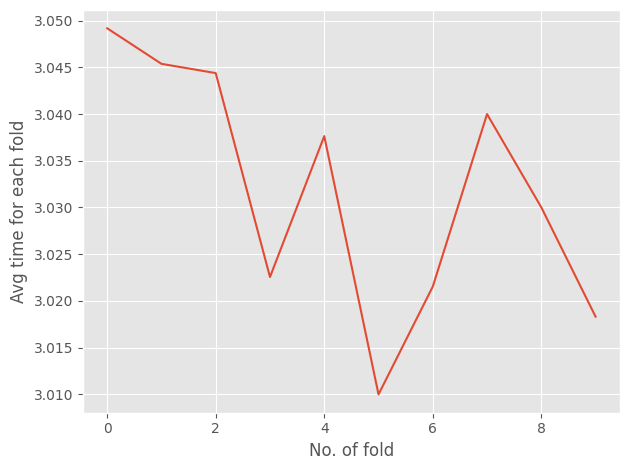

In [20]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

times_rnv2_n = np.zeros((10,100))
for i, row in enumerate(times_rnv2):
    times_rnv2_n[i, :len(row)] = row

times_rnv2_n_n = np.mean(times_rnv2_n,axis=1)

plt.plot(times_rnv2_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")

plt.tight_layout()
plt.savefig("rnv2 times")
plt.show()

In [21]:
train_acc_rnv2_n = np.zeros((10,100))
for i, row in enumerate(train_acc_rnv2):
    train_acc_rnv2_n[i, :len(row)] = row
    
test_acc_rnv2_n = np.zeros((10,100))
for i, row in enumerate(test_acc_rnv2):
    test_acc_rnv2_n[i, :len(row)] = row
    
train_loss_rnv2_n = np.zeros((10,100))
for i, row in enumerate(train_loss_rnv2):
    train_loss_rnv2_n[i, :len(row)] = row
    
test_loss_rnv2_n = np.zeros((10,100))
for i, row in enumerate(test_loss_rnv2):
    test_loss_rnv2_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_rnv2_n = np.mean(train_acc_rnv2_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_rnv2_n = np.mean(test_acc_rnv2_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_rnv2_n = np.mean(train_loss_rnv2_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_rnv2_n = np.mean(test_loss_rnv2_n,axis=0)

In [22]:
data = [train_acc_rnv2_n,test_acc_rnv2_n,train_loss_rnv2_n,test_loss_rnv2_n]

df = pd.DataFrame(data)
df.to_csv('rnv2_acc', index=False)
df = pd.read_csv('rnv2_acc')

train_acc_rnv2_n = df.iloc[0]
test_acc_rnv2_n = df.iloc[1]
train_loss_rnv2_n = df.iloc[2]
test_loss_rnv2_n = df.iloc[3]


df_t = pd.DataFrame([times_rnv2_n_n])
df_t.to_csv('rnv2_times', index=False)
df_t = pd.read_csv('rnv2_times')

times_rnv2_n_n = df_t.iloc[0]

In [23]:
train_acc_rnv2_n

0     0.216231
1     0.219379
2     0.220687
3     0.221791
4     0.219747
        ...   
95    0.220769
96    0.221832
97    0.217171
98    0.221014
99    0.222813
Name: 0, Length: 100, dtype: float64

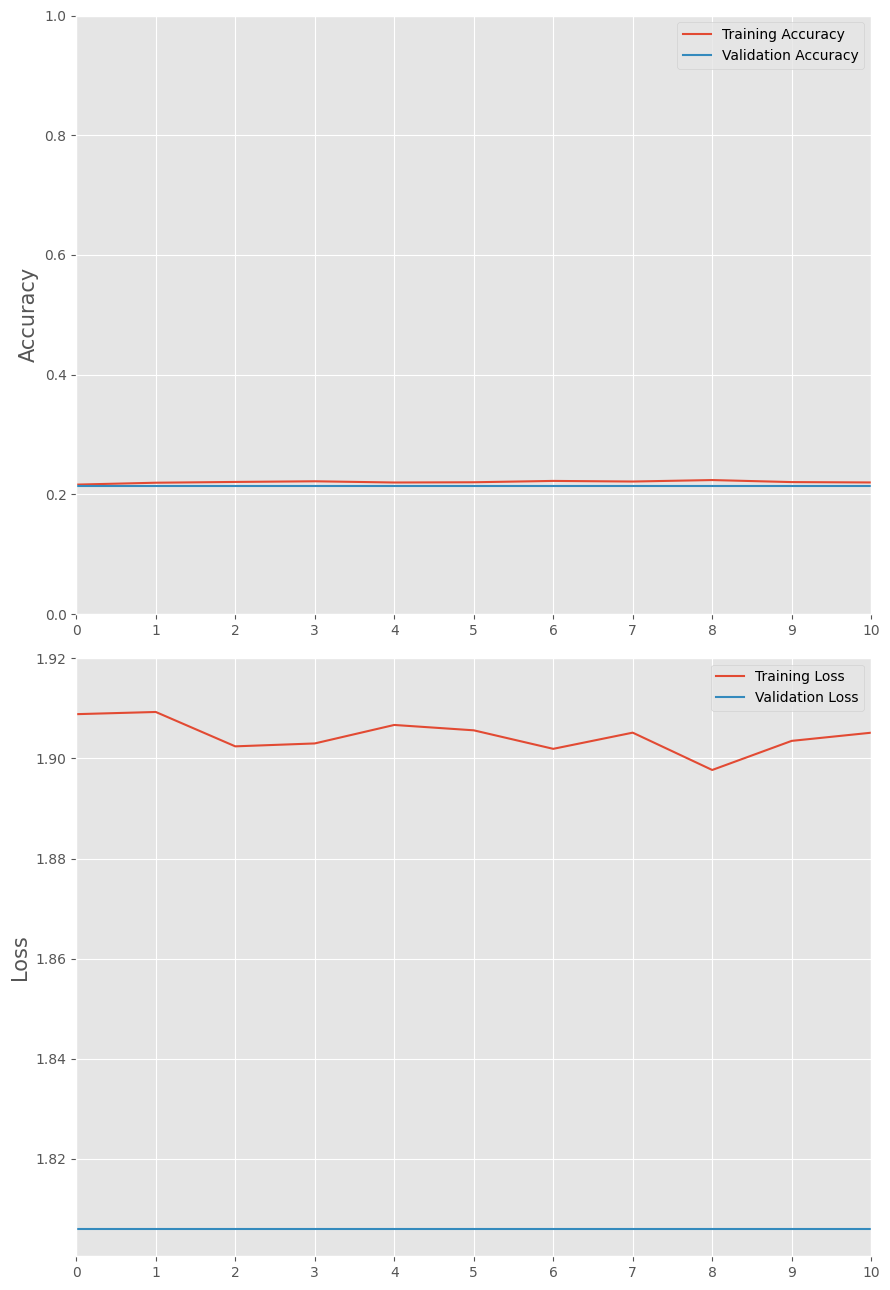

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_rnv2_n, label='Training Accuracy')
axs[0].plot(test_acc_rnv2_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_rnv2_n, label='Training Loss')
axs[1].plot(test_loss_rnv2_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("rnv2 Training and Testing Loss")
plt.show()

In [25]:
np.array(scores_rnv2).shape

(10, 302, 4)

In [26]:
y_pred_rnv2 = np.argmax(scores_rnv2,axis=2)

In [27]:
y_pred_rnv2.shape

(10, 302)

In [28]:
from sklearn.metrics import accuracy_score
acc_scores_rnv2 = []
for i in range(len(y_test_all_rnv2)):
    acc_scores_rnv2.append(accuracy_score(y_true = y_test_all_rnv2[i],y_pred = y_pred_rnv2[i]))

In [29]:
import gc
gc.collect()

3648

In [30]:
acc_scores_rnv2

[0.1423841059602649,
 0.1490066225165563,
 0.2847682119205298,
 0.11258278145695365,
 0.31125827814569534,
 0.15894039735099338,
 0.271523178807947,
 0.2682119205298013,
 0.26158940397350994,
 0.17218543046357615]

In [31]:
df_acc = pd.DataFrame([acc_scores_rnv2])

df_acc.to_csv('rnv2_accuracy', index=False)

df_acc = pd.read_csv('rnv2_accuracy')

acc_scores_rnv2 = df_acc.iloc[0].values

In [32]:
y_test_all_n = np.array(y_test_all_rnv2)

y_pred_rnv2_n = y_pred_rnv2.flatten()
y_test_all_n = y_test_all_n.flatten()

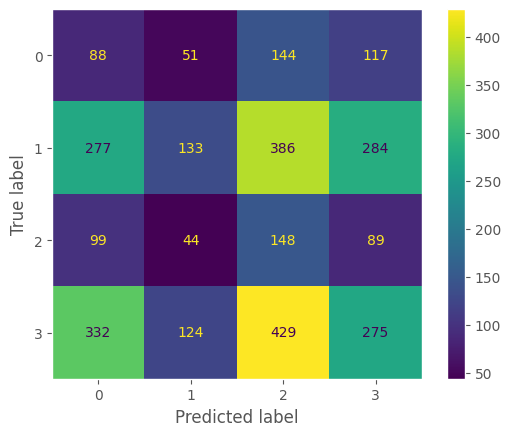

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_rnv2_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("rnv2")
plt.show()

In [34]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_rnv2_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.11      0.22      0.15       400
           1       0.38      0.12      0.19      1080
           2       0.13      0.39      0.20       380
           3       0.36      0.24      0.29      1160

    accuracy                           0.21      3020
   macro avg       0.25      0.24      0.20      3020
weighted avg       0.30      0.21      0.22      3020



# VGG16

In [35]:
import gc
gc.collect()

20

In [36]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_vgg16 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_vgg16.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [37]:
def create_model_vgg16():

    model_vgg16 = tf.keras.Sequential([
    tf.keras.applications.VGG16(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_vgg16.trainable = False
    return model_vgg16

In [38]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_vgg16 = []
y_test_all_vgg16 = []
train_acc_vgg16 = []
test_acc_vgg16 = []
train_loss_vgg16 = []
test_loss_vgg16 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_vgg16.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_vgg16 = None
    model_vgg16 = create_model_vgg16()
        
    model_vgg16.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_vgg16.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_vgg16.predict(X_test)
    
    scores_vgg16.append(x)
    train_acc_vgg16.append(history.history["accuracy"])
    test_acc_vgg16.append(history.history["val_accuracy"])
    train_loss_vgg16.append(history.history["loss"])
    test_loss_vgg16.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 10s 91ms/step - loss: 1.5702 - accuracy: 0.3839 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 56ms/step - loss: 1.5664 - accuracy: 0.3827 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5666 - accuracy: 0.3847 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5778 - accuracy: 0.3843 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5733 - accuracy: 0.3835 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 56ms/step - loss: 1.5853 - accuracy: 0.3839 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 7/100
77/77 [=========================

Time taken for epoch 29: 4.40 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.5749 - accuracy: 0.3843 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5742 - accuracy: 0.3835 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5574 - accuracy: 0.3847 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5835 - accuracy: 0.3823 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5799 - accuracy: 0.3851 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5837 - accuracy: 0.3827 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5733 - accuracy: 0.3839 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5657 - accuracy: 0.3855 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5759 - accuracy: 0.3835 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5767 - accuracy: 0.3847 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5630 - accuracy: 0.3847 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5718 - accuracy: 0.3847 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 2.5600e-09
Epoch 64/100
76/77 [====================

77/77 [==============================] - 4s 56ms/step - loss: 1.5684 - accuracy: 0.3843 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5677 - accuracy: 0.3851 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5850 - accuracy: 0.3839 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5754 - accuracy: 0.3835 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 4s 56ms/step - loss: 1.5763 - accuracy: 0.3855 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5810 - accuracy: 0.3847 - val_loss: 1.6108 - val_accuracy: 0.3824 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] -

Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 2.0450 - accuracy: 0.1451
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 4.32 seconds
77/77 [==============================] - 4s 56ms/step - loss: 2.0450 - accuracy: 0.1451 - val_loss: 2.0224 - val_accuracy: 0.1360 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 4s 56ms/step - loss: 2.0561 - accuracy: 0.1415 - val_loss: 2.0224 - val_accuracy: 0.1360 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 4s 57ms/step - loss: 2.0416 - accuracy: 0.1484 - val_loss: 2.0224 - val_accuracy: 0.1360 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 4s 57ms/step - loss: 2.0668 - accuracy: 0.1427 - val_loss: 2.0224 - val_accuracy: 0.1360 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 4s 56ms/step - loss: 2.0446 - accuracy: 0.1394 - val_loss: 2.0224 - val_accuracy: 0.1360 - lr: 4.0000e-05
E

76/77 [============================>.] - ETA: 0s - loss: 2.0471 - accuracy: 0.1386
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 4.36 seconds
77/77 [==============================] - 4s 57ms/step - loss: 2.0478 - accuracy: 0.1386 - val_loss: 2.0224 - val_accuracy: 0.1360 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 4s 56ms/step - loss: 2.0413 - accuracy: 0.1464 - val_loss: 2.0224 - val_accuracy: 0.1360 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 4s 57ms/step - loss: 2.0412 - accuracy: 0.1406 - val_loss: 2.0224 - val_accuracy: 0.1360 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 4s 57ms/step - loss: 2.0511 - accuracy: 0.1464 - val_loss: 2.0224 - val_accuracy: 0.1360 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 4s 57ms/step - loss: 2.0587 - accuracy: 0.1472 - val_loss: 2.0224 - val_accuracy: 0.1360 - lr: 6.4000e-08
Epoch 48/100
77

76/77 [============================>.] - ETA: 0s - loss: 2.0478 - accuracy: 0.1476
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 4.35 seconds
77/77 [==============================] - 4s 57ms/step - loss: 2.0485 - accuracy: 0.1472 - val_loss: 2.0224 - val_accuracy: 0.1360 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 4s 57ms/step - loss: 2.0588 - accuracy: 0.1345 - val_loss: 2.0224 - val_accuracy: 0.1360 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 4s 57ms/step - loss: 2.0587 - accuracy: 0.1537 - val_loss: 2.0224 - val_accuracy: 0.1360 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 4s 56ms/step - loss: 2.0549 - accuracy: 0.1484 - val_loss: 2.0224 - val_accuracy: 0.1360 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 4s 57ms/step - loss: 2.0474 - accuracy: 0.1504 - val_loss: 2.0224 - val_accuracy: 0.1360 - lr: 1.0240e-10
Epoch 76/100
7

76/77 [============================>.] - ETA: 0s - loss: 2.0527 - accuracy: 0.1328
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 4.35 seconds
77/77 [==============================] - 4s 57ms/step - loss: 2.0521 - accuracy: 0.1321 - val_loss: 2.0224 - val_accuracy: 0.1360 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 1s 49ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 5s 59ms/step - loss: 1.3490 - accuracy: 0.3508 - val_loss: 1.2571 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3435 - accuracy: 0.3602 - val_loss: 1.2571 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 56ms/step - loss: 1.3357 - accuracy: 0.3536 - val_loss: 1.2571 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3456 - accuracy: 0.3

77/77 [==============================] - 4s 57ms/step - loss: 1.3522 - accuracy: 0.3451 - val_loss: 1.2571 - val_accuracy: 0.3824 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 4s 56ms/step - loss: 1.3449 - accuracy: 0.3401 - val_loss: 1.2571 - val_accuracy: 0.3824 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 1.3483 - accuracy: 0.3479
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 4.38 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.3483 - accuracy: 0.3475 - val_loss: 1.2571 - val_accuracy: 0.3824 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3457 - accuracy: 0.3446 - val_loss: 1.2571 - val_accuracy: 0.3824 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3306 - accuracy: 0.3635 - val_loss: 1.2571 - val_accuracy: 0.3824 - lr: 1.6000e-06
Epoch 32/100
7

77/77 [==============================] - 4s 57ms/step - loss: 1.3374 - accuracy: 0.3569 - val_loss: 1.2571 - val_accuracy: 0.3824 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3488 - accuracy: 0.3487 - val_loss: 1.2571 - val_accuracy: 0.3824 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] - ETA: 0s - loss: 1.3344 - accuracy: 0.3618
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 4.37 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.3340 - accuracy: 0.3630 - val_loss: 1.2571 - val_accuracy: 0.3824 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3413 - accuracy: 0.3426 - val_loss: 1.2571 - val_accuracy: 0.3824 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3398 - accuracy: 0.3598 - val_loss: 1.2571 - val_accuracy: 0.3824 - lr: 2.5600e-09
Epoch 60/100
7

77/77 [==============================] - 4s 56ms/step - loss: 1.3447 - accuracy: 0.3540 - val_loss: 1.2571 - val_accuracy: 0.3824 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3397 - accuracy: 0.3626 - val_loss: 1.2571 - val_accuracy: 0.3824 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 1.3388 - accuracy: 0.3503
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 4.36 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.3382 - accuracy: 0.3512 - val_loss: 1.2571 - val_accuracy: 0.3824 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3545 - accuracy: 0.3320 - val_loss: 1.2571 - val_accuracy: 0.3824 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 4s 56ms/step - loss: 1.3376 - accuracy: 0.3561 - val_loss: 1.2571 - val_accuracy: 0.3824 - lr: 4.0960e-12
Epoch 88/100
77

77/77 [==============================] - 4s 57ms/step - loss: 1.8711 - accuracy: 0.1312 - val_loss: 1.8306 - val_accuracy: 0.1434 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8685 - accuracy: 0.1300 - val_loss: 1.8306 - val_accuracy: 0.1434 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8680 - accuracy: 0.1325 - val_loss: 1.8306 - val_accuracy: 0.1434 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8574 - accuracy: 0.1325 - val_loss: 1.8306 - val_accuracy: 0.1434 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.8582 - accuracy: 0.1390
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 4.38 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.8582 - accuracy: 0.1390 - val_loss: 1.8306 - val_accuracy: 0.1434 - lr: 2.0000e-04
Epoch 16/100
7

77/77 [==============================] - 4s 57ms/step - loss: 1.8543 - accuracy: 0.1390 - val_loss: 1.8306 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8661 - accuracy: 0.1349 - val_loss: 1.8306 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8541 - accuracy: 0.1386 - val_loss: 1.8306 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8581 - accuracy: 0.1345 - val_loss: 1.8306 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.8679 - accuracy: 0.1325
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 4.35 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.8679 - accuracy: 0.1325 - val_loss: 1.8306 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 44/100
77

77/77 [==============================] - 4s 56ms/step - loss: 1.8583 - accuracy: 0.1353 - val_loss: 1.8306 - val_accuracy: 0.1434 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8616 - accuracy: 0.1361 - val_loss: 1.8306 - val_accuracy: 0.1434 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8658 - accuracy: 0.1378 - val_loss: 1.8306 - val_accuracy: 0.1434 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8606 - accuracy: 0.1353 - val_loss: 1.8306 - val_accuracy: 0.1434 - lr: 5.1200e-10
Epoch 71/100
76/77 [============================>.] - ETA: 0s - loss: 1.8684 - accuracy: 0.1316
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 4.33 seconds
77/77 [==============================] - 4s 56ms/step - loss: 1.8668 - accuracy: 0.1325 - val_loss: 1.8306 - val_accuracy: 0.1434 - lr: 5.1200e-10
Epoch 72/100
7

77/77 [==============================] - 4s 57ms/step - loss: 1.8561 - accuracy: 0.1370 - val_loss: 1.8306 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8617 - accuracy: 0.1382 - val_loss: 1.8306 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8683 - accuracy: 0.1341 - val_loss: 1.8306 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8634 - accuracy: 0.1386 - val_loss: 1.8306 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.8547 - accuracy: 0.1406
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 4.36 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.8547 - accuracy: 0.1406 - val_loss: 1.8306 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 100/100


77/77 [==============================] - 4s 57ms/step - loss: 1.6147 - accuracy: 0.1766 - val_loss: 1.5160 - val_accuracy: 0.1324 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 4s 57ms/step - loss: 1.6043 - accuracy: 0.1942 - val_loss: 1.5160 - val_accuracy: 0.1324 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5915 - accuracy: 0.1934 - val_loss: 1.5160 - val_accuracy: 0.1324 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5998 - accuracy: 0.1901 - val_loss: 1.5160 - val_accuracy: 0.1324 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 4s 56ms/step - loss: 1.5985 - accuracy: 0.1909 - val_loss: 1.5160 - val_accuracy: 0.1324 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 4s 57ms/step - loss: 1.6020 - accuracy: 0.1901 - val_loss: 1.5160 - val_accuracy: 0.1324 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] -

77/77 [==============================] - 4s 56ms/step - loss: 1.5988 - accuracy: 0.1913 - val_loss: 1.5160 - val_accuracy: 0.1324 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 4s 57ms/step - loss: 1.6038 - accuracy: 0.1917 - val_loss: 1.5160 - val_accuracy: 0.1324 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 4s 57ms/step - loss: 1.6100 - accuracy: 0.1917 - val_loss: 1.5160 - val_accuracy: 0.1324 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 4s 57ms/step - loss: 1.6084 - accuracy: 0.1901 - val_loss: 1.5160 - val_accuracy: 0.1324 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 4s 57ms/step - loss: 1.6135 - accuracy: 0.1852 - val_loss: 1.5160 - val_accuracy: 0.1324 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 4s 57ms/step - loss: 1.6012 - accuracy: 0.1897 - val_loss: 1.5160 - val_accuracy: 0.1324 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] -

77/77 [==============================] - 4s 57ms/step - loss: 1.5946 - accuracy: 0.1807 - val_loss: 1.5160 - val_accuracy: 0.1324 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 4s 56ms/step - loss: 1.6082 - accuracy: 0.1893 - val_loss: 1.5160 - val_accuracy: 0.1324 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 4s 57ms/step - loss: 1.6109 - accuracy: 0.1856 - val_loss: 1.5160 - val_accuracy: 0.1324 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 4s 57ms/step - loss: 1.6261 - accuracy: 0.1754 - val_loss: 1.5160 - val_accuracy: 0.1324 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 4s 57ms/step - loss: 1.6158 - accuracy: 0.1783 - val_loss: 1.5160 - val_accuracy: 0.1324 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 4s 56ms/step - loss: 1.6070 - accuracy: 0.1823 - val_loss: 1.5160 - val_accuracy: 0.1324 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] -

77/77 [==============================] - 4s 56ms/step - loss: 1.8495 - accuracy: 0.3307 - val_loss: 1.8347 - val_accuracy: 0.3382 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 1.8545 - accuracy: 0.3162
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 4.33 seconds
77/77 [==============================] - 4s 56ms/step - loss: 1.8551 - accuracy: 0.3160 - val_loss: 1.8347 - val_accuracy: 0.3382 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8631 - accuracy: 0.3226 - val_loss: 1.8347 - val_accuracy: 0.3382 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8635 - accuracy: 0.3238 - val_loss: 1.8347 - val_accuracy: 0.3382 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8766 - accuracy: 0.3136 - val_loss: 1.8347 - val_accuracy: 0.3382 - lr: 2.0000e-04
Epoch 12/100
77/77 [======

77/77 [==============================] - 4s 56ms/step - loss: 1.8801 - accuracy: 0.3205 - val_loss: 1.8347 - val_accuracy: 0.3382 - lr: 1.6000e-06
Epoch 36/100
76/77 [============================>.] - ETA: 0s - loss: 1.8668 - accuracy: 0.3211
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 4.37 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.8681 - accuracy: 0.3209 - val_loss: 1.8347 - val_accuracy: 0.3382 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8602 - accuracy: 0.3042 - val_loss: 1.8347 - val_accuracy: 0.3382 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8758 - accuracy: 0.3168 - val_loss: 1.8347 - val_accuracy: 0.3382 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8581 - accuracy: 0.3209 - val_loss: 1.8347 - val_accuracy: 0.3382 - lr: 3.2000e-07
Epoch 40/100
77

77/77 [==============================] - 4s 57ms/step - loss: 1.8571 - accuracy: 0.3250 - val_loss: 1.8347 - val_accuracy: 0.3382 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 1.8799 - accuracy: 0.3129
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 4.31 seconds
77/77 [==============================] - 4s 56ms/step - loss: 1.8825 - accuracy: 0.3119 - val_loss: 1.8347 - val_accuracy: 0.3382 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8616 - accuracy: 0.3234 - val_loss: 1.8347 - val_accuracy: 0.3382 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8674 - accuracy: 0.3128 - val_loss: 1.8347 - val_accuracy: 0.3382 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8721 - accuracy: 0.3099 - val_loss: 1.8347 - val_accuracy: 0.3382 - lr: 5.1200e-10
Epoch 68/100
77/7

77/77 [==============================] - 4s 57ms/step - loss: 1.8672 - accuracy: 0.3140 - val_loss: 1.8347 - val_accuracy: 0.3382 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 1.8677 - accuracy: 0.3107
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 4.38 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.8677 - accuracy: 0.3107 - val_loss: 1.8347 - val_accuracy: 0.3382 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8739 - accuracy: 0.3111 - val_loss: 1.8347 - val_accuracy: 0.3382 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8673 - accuracy: 0.3213 - val_loss: 1.8347 - val_accuracy: 0.3382 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8480 - accuracy: 0.3185 - val_loss: 1.8347 - val_accuracy: 0.3382 - lr: 8.1920e-13
Epoch 96/100
77

77/77 [==============================] - 4s 56ms/step - loss: 1.7049 - accuracy: 0.3774 - val_loss: 1.5109 - val_accuracy: 0.4449 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 4s 57ms/step - loss: 1.6846 - accuracy: 0.3769 - val_loss: 1.5109 - val_accuracy: 0.4449 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 4s 57ms/step - loss: 1.6921 - accuracy: 0.3782 - val_loss: 1.5109 - val_accuracy: 0.4449 - lr: 4.0000e-05
Epoch 22/100
76/77 [============================>.] - ETA: 0s - loss: 1.6987 - accuracy: 0.3771
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 4.32 seconds
77/77 [==============================] - 4s 56ms/step - loss: 1.6988 - accuracy: 0.3769 - val_loss: 1.5109 - val_accuracy: 0.4449 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 4s 57ms/step - loss: 1.6916 - accuracy: 0.3765 - val_loss: 1.5109 - val_accuracy: 0.4449 - lr: 8.0000e-06
Epoch 24/100
77

77/77 [==============================] - 4s 57ms/step - loss: 1.6836 - accuracy: 0.3774 - val_loss: 1.5109 - val_accuracy: 0.4449 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 4s 56ms/step - loss: 1.6871 - accuracy: 0.3765 - val_loss: 1.5109 - val_accuracy: 0.4449 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 4s 57ms/step - loss: 1.7083 - accuracy: 0.3778 - val_loss: 1.5109 - val_accuracy: 0.4449 - lr: 6.4000e-08
Epoch 50/100
76/77 [============================>.] - ETA: 0s - loss: 1.6819 - accuracy: 0.3791
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 4.37 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.6885 - accuracy: 0.3774 - val_loss: 1.5109 - val_accuracy: 0.4449 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 4s 57ms/step - loss: 1.6789 - accuracy: 0.3782 - val_loss: 1.5109 - val_accuracy: 0.4449 - lr: 1.2800e-08
Epoch 52/100
7

77/77 [==============================] - 4s 57ms/step - loss: 1.6792 - accuracy: 0.3769 - val_loss: 1.5109 - val_accuracy: 0.4449 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 4s 57ms/step - loss: 1.7031 - accuracy: 0.3778 - val_loss: 1.5109 - val_accuracy: 0.4449 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 4s 57ms/step - loss: 1.6850 - accuracy: 0.3765 - val_loss: 1.5109 - val_accuracy: 0.4449 - lr: 1.0240e-10
Epoch 78/100
76/77 [============================>.] - ETA: 0s - loss: 1.7073 - accuracy: 0.3787
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 4.39 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.7094 - accuracy: 0.3782 - val_loss: 1.5109 - val_accuracy: 0.4449 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 4s 57ms/step - loss: 1.6970 - accuracy: 0.3774 - val_loss: 1.5109 - val_accuracy: 0.4449 - lr: 2.0480e-11
Epoch 80/100
7

Epoch 3/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5151 - accuracy: 0.3536 - val_loss: 1.5369 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5100 - accuracy: 0.3639 - val_loss: 1.5369 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5109 - accuracy: 0.3688 - val_loss: 1.5369 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 56ms/step - loss: 1.5084 - accuracy: 0.3553 - val_loss: 1.5369 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5103 - accuracy: 0.3520 - val_loss: 1.5369 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 1.5093 - accuracy: 0.3627
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 4.39 seconds
77/77 [=========

77/77 [==============================] - 4s 57ms/step - loss: 1.5159 - accuracy: 0.3594 - val_loss: 1.5369 - val_accuracy: 0.3566 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5121 - accuracy: 0.3532 - val_loss: 1.5369 - val_accuracy: 0.3566 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5151 - accuracy: 0.3610 - val_loss: 1.5369 - val_accuracy: 0.3566 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5063 - accuracy: 0.3581 - val_loss: 1.5369 - val_accuracy: 0.3566 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5120 - accuracy: 0.3585 - val_loss: 1.5369 - val_accuracy: 0.3566 - lr: 1.6000e-06
Epoch 36/100
77/77 [==============================] - ETA: 0s - loss: 1.5114 - accuracy: 0.3491
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 4.38 seconds
77

77/77 [==============================] - 4s 56ms/step - loss: 1.5141 - accuracy: 0.3663 - val_loss: 1.5369 - val_accuracy: 0.3566 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5090 - accuracy: 0.3655 - val_loss: 1.5369 - val_accuracy: 0.3566 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 4s 56ms/step - loss: 1.5175 - accuracy: 0.3512 - val_loss: 1.5369 - val_accuracy: 0.3566 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5125 - accuracy: 0.3639 - val_loss: 1.5369 - val_accuracy: 0.3566 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5060 - accuracy: 0.3659 - val_loss: 1.5369 - val_accuracy: 0.3566 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 1.5145 - accuracy: 0.3618
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 4.36 seconds
77/7

77/77 [==============================] - 4s 57ms/step - loss: 1.5086 - accuracy: 0.3630 - val_loss: 1.5369 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5051 - accuracy: 0.3635 - val_loss: 1.5369 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5177 - accuracy: 0.3671 - val_loss: 1.5369 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 4s 56ms/step - loss: 1.5166 - accuracy: 0.3602 - val_loss: 1.5369 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 4s 57ms/step - loss: 1.5091 - accuracy: 0.3565 - val_loss: 1.5369 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] - ETA: 0s - loss: 1.5076 - accuracy: 0.3614
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 4.37 seconds
77

Time taken for epoch 15: 4.35 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.3740 - accuracy: 0.3136 - val_loss: 1.3490 - val_accuracy: 0.3493 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3717 - accuracy: 0.3136 - val_loss: 1.3490 - val_accuracy: 0.3493 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3719 - accuracy: 0.3181 - val_loss: 1.3490 - val_accuracy: 0.3493 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3764 - accuracy: 0.3177 - val_loss: 1.3490 - val_accuracy: 0.3493 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3873 - accuracy: 0.3050 - val_loss: 1.3490 - val_accuracy: 0.3493 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3696 - accuracy: 0.3078 - val_loss: 1.3490 - val_accuracy: 0.3493 - lr: 4.0000e-05
Epoch 21/100
77

Epoch 44/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3745 - accuracy: 0.3050 - val_loss: 1.3490 - val_accuracy: 0.3493 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3753 - accuracy: 0.3201 - val_loss: 1.3490 - val_accuracy: 0.3493 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3790 - accuracy: 0.3209 - val_loss: 1.3490 - val_accuracy: 0.3493 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3775 - accuracy: 0.3140 - val_loss: 1.3490 - val_accuracy: 0.3493 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3777 - accuracy: 0.3197 - val_loss: 1.3490 - val_accuracy: 0.3493 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3756 - accuracy: 0.3222 - val_loss: 1.3490 - val_accuracy: 0.3493 - lr: 6.4000e-08
Epoch 50/100
77/77 [====================

77/77 [==============================] - 4s 57ms/step - loss: 1.3748 - accuracy: 0.3107 - val_loss: 1.3490 - val_accuracy: 0.3493 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3866 - accuracy: 0.3115 - val_loss: 1.3490 - val_accuracy: 0.3493 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3763 - accuracy: 0.3095 - val_loss: 1.3490 - val_accuracy: 0.3493 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3813 - accuracy: 0.3119 - val_loss: 1.3490 - val_accuracy: 0.3493 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3701 - accuracy: 0.3209 - val_loss: 1.3490 - val_accuracy: 0.3493 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 4s 57ms/step - loss: 1.3809 - accuracy: 0.3013 - val_loss: 1.3490 - val_accuracy: 0.3493 - lr: 1.0240e-10
Epoch 78/100
76/77 [============================>.] -

10/10 [==============================] - 1s 50ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 5s 60ms/step - loss: 1.8131 - accuracy: 0.1468 - val_loss: 1.8027 - val_accuracy: 0.1066 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8233 - accuracy: 0.1386 - val_loss: 1.8027 - val_accuracy: 0.1066 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8203 - accuracy: 0.1406 - val_loss: 1.8027 - val_accuracy: 0.1066 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8050 - accuracy: 0.1500 - val_loss: 1.8027 - val_accuracy: 0.1066 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8093 - accuracy: 0.1509 - val_loss: 1.8027 - val_accuracy: 0.1066 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8183 - accuracy: 0.1386 - val_loss: 1.8027 - val_accuracy: 0.1066 - l

Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 1.8259 - accuracy: 0.1377
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 4.43 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.8266 - accuracy: 0.1374 - val_loss: 1.8027 - val_accuracy: 0.1066 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8076 - accuracy: 0.1500 - val_loss: 1.8027 - val_accuracy: 0.1066 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8254 - accuracy: 0.1419 - val_loss: 1.8027 - val_accuracy: 0.1066 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 4s 58ms/step - loss: 1.8067 - accuracy: 0.1529 - val_loss: 1.8027 - val_accuracy: 0.1066 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8236 - accuracy: 0.1455 - val_loss: 1.8027 - val_accuracy: 0.1066 - lr: 1.6000e-06
E

77/77 [==============================] - ETA: 0s - loss: 1.8016 - accuracy: 0.1517
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 4.39 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.8016 - accuracy: 0.1517 - val_loss: 1.8027 - val_accuracy: 0.1066 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8226 - accuracy: 0.1357 - val_loss: 1.8027 - val_accuracy: 0.1066 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8092 - accuracy: 0.1386 - val_loss: 1.8027 - val_accuracy: 0.1066 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8117 - accuracy: 0.1410 - val_loss: 1.8027 - val_accuracy: 0.1066 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8033 - accuracy: 0.1447 - val_loss: 1.8027 - val_accuracy: 0.1066 - lr: 2.5600e-09
Epoch 62/100
7

76/77 [============================>.] - ETA: 0s - loss: 1.8124 - accuracy: 0.1332
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 4.40 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.8113 - accuracy: 0.1337 - val_loss: 1.8027 - val_accuracy: 0.1066 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8125 - accuracy: 0.1415 - val_loss: 1.8027 - val_accuracy: 0.1066 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8222 - accuracy: 0.1419 - val_loss: 1.8027 - val_accuracy: 0.1066 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8279 - accuracy: 0.1316 - val_loss: 1.8027 - val_accuracy: 0.1066 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 4s 57ms/step - loss: 1.8148 - accuracy: 0.1443 - val_loss: 1.8027 - val_accuracy: 0.1066 - lr: 4.0960e-12
Epoch 90/100
77

In [39]:
import gc
gc.collect()

0

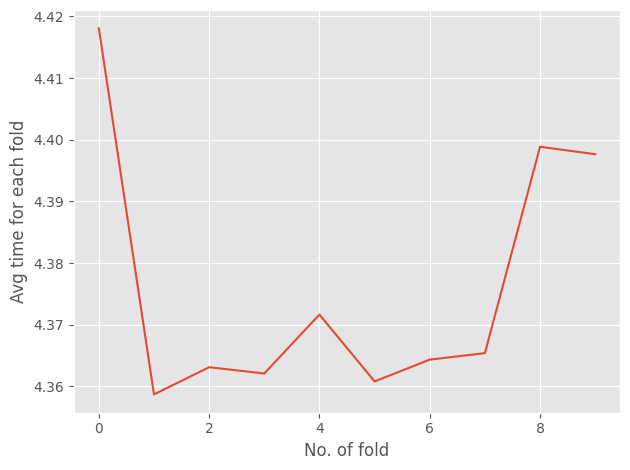

In [40]:
import matplotlib.pyplot as plt

times_vgg16_n = np.zeros((10,100))
for i, row in enumerate(times_vgg16):
    times_vgg16_n[i, :len(row)] = row

times_vgg16_n_n = np.mean(times_vgg16_n,axis=1)

plt.plot(times_vgg16_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("vgg16 times")
plt.show()

In [41]:
train_acc_vgg16_n = np.zeros((10,100))
for i, row in enumerate(train_acc_vgg16):
    train_acc_vgg16_n[i, :len(row)] = row
    
test_acc_vgg16_n = np.zeros((10,100))
for i, row in enumerate(test_acc_vgg16):
    test_acc_vgg16_n[i, :len(row)] = row
    
train_loss_vgg16_n = np.zeros((10,100))
for i, row in enumerate(train_loss_vgg16):
    train_loss_vgg16_n[i, :len(row)] = row
    
test_loss_vgg16_n = np.zeros((10,100))
for i, row in enumerate(test_loss_vgg16):
    test_loss_vgg16_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_vgg16_n = np.mean(train_acc_vgg16_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_vgg16_n = np.mean(test_acc_vgg16_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_vgg16_n = np.mean(train_loss_vgg16_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_vgg16_n = np.mean(test_loss_vgg16_n,axis=0)

In [42]:
data = [train_acc_vgg16_n,test_acc_vgg16_n,train_loss_vgg16_n,test_loss_vgg16_n]

df = pd.DataFrame(data)
df.to_csv('vgg16_acc', index=False)
df = pd.read_csv('vgg16_acc')

train_acc_vgg16_n = df.iloc[0]
test_acc_vgg16_n = df.iloc[1]
train_loss_vgg16_n = df.iloc[2]
test_loss_vgg16_n = df.iloc[3]


df_t = pd.DataFrame([times_vgg16_n_n])
df_t.to_csv('vgg16_times', index=False)
df_t = pd.read_csv('vgg16_times')

times_vgg16_n_n = df_t.iloc[0]

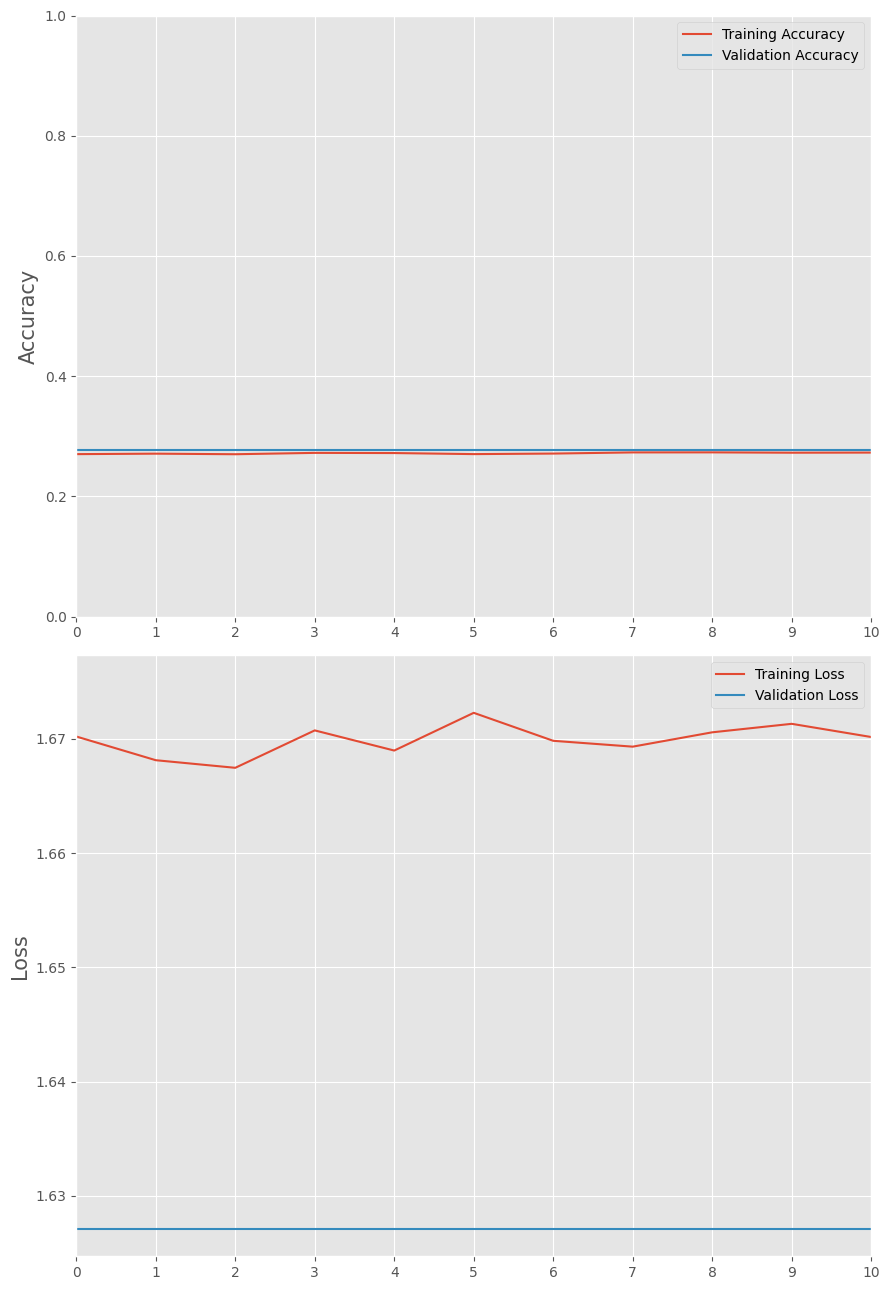

In [43]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_vgg16_n, label='Training Accuracy')
axs[0].plot(test_acc_vgg16_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_vgg16_n, label='Training Loss')
axs[1].plot(test_loss_vgg16_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("vgg16 Training and Testing Loss")
plt.show()

In [44]:
np.array(scores_vgg16).shape

(10, 302, 4)

In [45]:
y_pred_vgg16 = np.argmax(scores_vgg16,axis=2)

In [46]:
y_pred_vgg16.shape

(10, 302)

In [47]:
from sklearn.metrics import accuracy_score
acc_scores_vgg16 = []
for i in range(len(y_test_all_vgg16)):
    acc_scores_vgg16.append(accuracy_score(y_true = y_test_all_vgg16[i],y_pred = y_pred_vgg16[i]))

In [48]:
acc_scores_vgg16

[0.3841059602649007,
 0.13245033112582782,
 0.38741721854304634,
 0.13245033112582782,
 0.13245033112582782,
 0.38741721854304634,
 0.3841059602649007,
 0.3841059602649007,
 0.3543046357615894,
 0.10927152317880795]

In [49]:
df_acc = pd.DataFrame([acc_scores_vgg16])

df_acc.to_csv('vgg16_accuracy', index=False)

df_acc = pd.read_csv('vgg16_accuracy')

acc_scores_vgg16 = df_acc.iloc[0].values

In [50]:
y_test_all_n = np.array(y_test_all_vgg16)

y_pred_vgg16_n = y_pred_vgg16.flatten()
y_test_all_n = y_test_all_n.flatten()

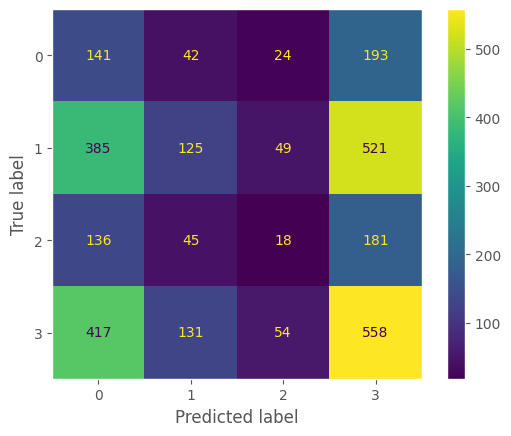

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_vgg16_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("vgg16")
plt.show()

In [52]:
import gc
gc.collect()

30149

In [53]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_vgg16_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.13      0.35      0.19       400
           1       0.36      0.12      0.18      1080
           2       0.12      0.05      0.07       380
           3       0.38      0.48      0.43      1160

    accuracy                           0.28      3020
   macro avg       0.25      0.25      0.22      3020
weighted avg       0.31      0.28      0.26      3020



# VGG19

In [54]:
import gc
gc.collect()

0

In [55]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_vgg19 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_vgg19.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [56]:
def create_model_vgg19():

    model_vgg19 = tf.keras.Sequential([
    tf.keras.applications.VGG19(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_vgg19.trainable = False
    return model_vgg19

In [ ]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_vgg19 = []
y_test_all_vgg19 = []
train_acc_vgg19 = []
test_acc_vgg19 = []
train_loss_vgg19 = []
test_loss_vgg19 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_vgg19.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_vgg19 = None
    model_vgg19 = create_model_vgg19()
        
    model_vgg19.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_vgg19.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_vgg19.predict(X_test)
    
    scores_vgg19.append(x)
    train_acc_vgg19.append(history.history["accuracy"])
    test_acc_vgg19.append(history.history["val_accuracy"])
    train_loss_vgg19.append(history.history["loss"])
    test_loss_vgg19.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 6s 69ms/step - loss: 1.6517 - accuracy: 0.3577 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 5s 67ms/step - loss: 1.6569 - accuracy: 0.3573 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 5s 67ms/step - loss: 1.6663 - accuracy: 0.3569 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 67ms/step - loss: 1.6617 - accuracy: 0.3581 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 5s 67ms/step - loss: 1.6547 - accuracy: 0.3569 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 5s 66ms/step - loss: 1.6623 - accuracy: 0.3577 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Time taken for epoch 29: 5.18 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.6715 - accuracy: 0.3577 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 5s 67ms/step - loss: 1.6719 - accuracy: 0.3581 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 5s 68ms/step - loss: 1.6740 - accuracy: 0.3577 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 5s 68ms/step - loss: 1.6443 - accuracy: 0.3585 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 5s 67ms/step - loss: 1.6570 - accuracy: 0.3573 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 5s 67ms/step - loss: 1.6619 - accuracy: 0.3577 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 5s 66ms/step - loss: 1.6709 - accuracy: 0.3577 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 5s 67ms/step - loss: 1.6588 - accuracy: 0.3577 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 5s 67ms/step - loss: 1.6578 - accuracy: 0.3573 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 5s 67ms/step - loss: 1.6598 - accuracy: 0.3577 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 5s 66ms/step - loss: 1.6709 - accuracy: 0.3581 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 5s 67ms/step - loss: 1.6657 - accuracy: 0.3581 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 64/100
76/77 [====================

77/77 [==============================] - 5s 67ms/step - loss: 1.6689 - accuracy: 0.3581 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 5s 67ms/step - loss: 1.6623 - accuracy: 0.3581 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 5s 67ms/step - loss: 1.6734 - accuracy: 0.3581 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 5s 67ms/step - loss: 1.6593 - accuracy: 0.3577 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 5s 66ms/step - loss: 1.6685 - accuracy: 0.3581 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 5s 67ms/step - loss: 1.6581 - accuracy: 0.3577 - val_loss: 1.6134 - val_accuracy: 0.3529 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] -

Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 1.8581 - accuracy: 0.1369
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 5.11 seconds
77/77 [==============================] - 5s 66ms/step - loss: 1.8587 - accuracy: 0.1365 - val_loss: 1.8150 - val_accuracy: 0.1213 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8592 - accuracy: 0.1382 - val_loss: 1.8150 - val_accuracy: 0.1213 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 5s 66ms/step - loss: 1.8561 - accuracy: 0.1398 - val_loss: 1.8150 - val_accuracy: 0.1213 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8513 - accuracy: 0.1353 - val_loss: 1.8150 - val_accuracy: 0.1213 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8530 - accuracy: 0.1378 - val_loss: 1.8150 - val_accuracy: 0.1213 - lr: 4.0000e-05
E

76/77 [============================>.] - ETA: 0s - loss: 1.8475 - accuracy: 0.1402
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 5.18 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.8483 - accuracy: 0.1394 - val_loss: 1.8150 - val_accuracy: 0.1213 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8334 - accuracy: 0.1390 - val_loss: 1.8150 - val_accuracy: 0.1213 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8435 - accuracy: 0.1382 - val_loss: 1.8150 - val_accuracy: 0.1213 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8588 - accuracy: 0.1370 - val_loss: 1.8150 - val_accuracy: 0.1213 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 5s 68ms/step - loss: 1.8429 - accuracy: 0.1374 - val_loss: 1.8150 - val_accuracy: 0.1213 - lr: 6.4000e-08
Epoch 48/100
77

76/77 [============================>.] - ETA: 0s - loss: 1.8380 - accuracy: 0.1390
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 5.16 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.8376 - accuracy: 0.1394 - val_loss: 1.8150 - val_accuracy: 0.1213 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8482 - accuracy: 0.1390 - val_loss: 1.8150 - val_accuracy: 0.1213 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 5s 66ms/step - loss: 1.8516 - accuracy: 0.1398 - val_loss: 1.8150 - val_accuracy: 0.1213 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8527 - accuracy: 0.1349 - val_loss: 1.8150 - val_accuracy: 0.1213 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 5s 68ms/step - loss: 1.8615 - accuracy: 0.1382 - val_loss: 1.8150 - val_accuracy: 0.1213 - lr: 1.0240e-10
Epoch 76/100
7

76/77 [============================>.] - ETA: 0s - loss: 1.8457 - accuracy: 0.1390
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 5.16 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.8452 - accuracy: 0.1394 - val_loss: 1.8150 - val_accuracy: 0.1213 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 1s 58ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 6s 69ms/step - loss: 1.3395 - accuracy: 0.3520 - val_loss: 1.3013 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3634 - accuracy: 0.3434 - val_loss: 1.3013 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3501 - accuracy: 0.3520 - val_loss: 1.3013 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 66ms/step - loss: 1.3501 - accuracy: 0.3

77/77 [==============================] - 5s 67ms/step - loss: 1.3597 - accuracy: 0.3393 - val_loss: 1.3013 - val_accuracy: 0.3676 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3535 - accuracy: 0.3442 - val_loss: 1.3013 - val_accuracy: 0.3676 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 1.3575 - accuracy: 0.3528
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 5.13 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.3576 - accuracy: 0.3528 - val_loss: 1.3013 - val_accuracy: 0.3676 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3618 - accuracy: 0.3401 - val_loss: 1.3013 - val_accuracy: 0.3676 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3591 - accuracy: 0.3385 - val_loss: 1.3013 - val_accuracy: 0.3676 - lr: 1.6000e-06
Epoch 32/100
7

77/77 [==============================] - 5s 67ms/step - loss: 1.3565 - accuracy: 0.3451 - val_loss: 1.3013 - val_accuracy: 0.3676 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3510 - accuracy: 0.3463 - val_loss: 1.3013 - val_accuracy: 0.3676 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] - ETA: 0s - loss: 1.3538 - accuracy: 0.3495
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 5.10 seconds
77/77 [==============================] - 5s 66ms/step - loss: 1.3543 - accuracy: 0.3487 - val_loss: 1.3013 - val_accuracy: 0.3676 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3522 - accuracy: 0.3434 - val_loss: 1.3013 - val_accuracy: 0.3676 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3568 - accuracy: 0.3406 - val_loss: 1.3013 - val_accuracy: 0.3676 - lr: 2.5600e-09
Epoch 60/100
7

77/77 [==============================] - 5s 67ms/step - loss: 1.3476 - accuracy: 0.3430 - val_loss: 1.3013 - val_accuracy: 0.3676 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3552 - accuracy: 0.3434 - val_loss: 1.3013 - val_accuracy: 0.3676 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 1.3473 - accuracy: 0.3524
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 5.11 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.3487 - accuracy: 0.3508 - val_loss: 1.3013 - val_accuracy: 0.3676 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3440 - accuracy: 0.3532 - val_loss: 1.3013 - val_accuracy: 0.3676 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 5s 67ms/step - loss: 1.3482 - accuracy: 0.3545 - val_loss: 1.3013 - val_accuracy: 0.3676 - lr: 4.0960e-12
Epoch 88/100
77

77/77 [==============================] - 5s 67ms/step - loss: 1.5112 - accuracy: 0.2240 - val_loss: 1.5162 - val_accuracy: 0.1691 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 5s 67ms/step - loss: 1.5096 - accuracy: 0.2302 - val_loss: 1.5162 - val_accuracy: 0.1691 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 5s 67ms/step - loss: 1.5071 - accuracy: 0.2306 - val_loss: 1.5162 - val_accuracy: 0.1691 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 5s 67ms/step - loss: 1.5098 - accuracy: 0.2195 - val_loss: 1.5162 - val_accuracy: 0.1691 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.5106 - accuracy: 0.2257
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 5.13 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.5106 - accuracy: 0.2257 - val_loss: 1.5162 - val_accuracy: 0.1691 - lr: 2.0000e-04
Epoch 16/100
7

77/77 [==============================] - 5s 67ms/step - loss: 1.5073 - accuracy: 0.2277 - val_loss: 1.5162 - val_accuracy: 0.1691 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 5s 67ms/step - loss: 1.5154 - accuracy: 0.2216 - val_loss: 1.5162 - val_accuracy: 0.1691 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 5s 67ms/step - loss: 1.5110 - accuracy: 0.2150 - val_loss: 1.5162 - val_accuracy: 0.1691 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 5s 67ms/step - loss: 1.5144 - accuracy: 0.2257 - val_loss: 1.5162 - val_accuracy: 0.1691 - lr: 3.2000e-07
Epoch 43/100
76/77 [============================>.] - ETA: 0s - loss: 1.5144 - accuracy: 0.2233
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 5.14 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.5131 - accuracy: 0.2244 - val_loss: 1.5162 - val_accuracy: 0.1691 - lr: 3.2000e-07
Epoch 44/100
77

77/77 [==============================] - 5s 67ms/step - loss: 1.5147 - accuracy: 0.2224 - val_loss: 1.5162 - val_accuracy: 0.1691 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 5s 66ms/step - loss: 1.5156 - accuracy: 0.2138 - val_loss: 1.5162 - val_accuracy: 0.1691 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 5s 66ms/step - loss: 1.5131 - accuracy: 0.2281 - val_loss: 1.5162 - val_accuracy: 0.1691 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 5s 67ms/step - loss: 1.5133 - accuracy: 0.2261 - val_loss: 1.5162 - val_accuracy: 0.1691 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.5052 - accuracy: 0.2273
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 5.14 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.5052 - accuracy: 0.2273 - val_loss: 1.5162 - val_accuracy: 0.1691 - lr: 5.1200e-10
Epoch 72/100
7

77/77 [==============================] - 5s 67ms/step - loss: 1.5111 - accuracy: 0.2232 - val_loss: 1.5162 - val_accuracy: 0.1691 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 5s 67ms/step - loss: 1.5186 - accuracy: 0.2273 - val_loss: 1.5162 - val_accuracy: 0.1691 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 5s 67ms/step - loss: 1.5114 - accuracy: 0.2179 - val_loss: 1.5162 - val_accuracy: 0.1691 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 5s 67ms/step - loss: 1.4992 - accuracy: 0.2400 - val_loss: 1.5162 - val_accuracy: 0.1691 - lr: 8.1920e-13
Epoch 99/100
76/77 [============================>.] - ETA: 0s - loss: 1.5083 - accuracy: 0.2401
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 5.12 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.5088 - accuracy: 0.2396 - val_loss: 1.5162 - val_accuracy: 0.1691 - lr: 8.1920e-13
Epoch 100/100


77/77 [==============================] - 5s 67ms/step - loss: 2.3153 - accuracy: 0.1284 - val_loss: 2.2122 - val_accuracy: 0.1581 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 5s 66ms/step - loss: 2.3271 - accuracy: 0.1276 - val_loss: 2.2122 - val_accuracy: 0.1581 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 5s 67ms/step - loss: 2.3098 - accuracy: 0.1296 - val_loss: 2.2122 - val_accuracy: 0.1581 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 5s 67ms/step - loss: 2.3219 - accuracy: 0.1308 - val_loss: 2.2122 - val_accuracy: 0.1581 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 5s 66ms/step - loss: 2.3042 - accuracy: 0.1288 - val_loss: 2.2122 - val_accuracy: 0.1581 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 5s 66ms/step - loss: 2.3234 - accuracy: 0.1325 - val_loss: 2.2122 - val_accuracy: 0.1581 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] -

77/77 [==============================] - 5s 67ms/step - loss: 2.3178 - accuracy: 0.1300 - val_loss: 2.2122 - val_accuracy: 0.1581 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 5s 67ms/step - loss: 2.3223 - accuracy: 0.1361 - val_loss: 2.2122 - val_accuracy: 0.1581 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 5s 67ms/step - loss: 2.3332 - accuracy: 0.1259 - val_loss: 2.2122 - val_accuracy: 0.1581 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 5s 67ms/step - loss: 2.3226 - accuracy: 0.1300 - val_loss: 2.2122 - val_accuracy: 0.1581 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 5s 67ms/step - loss: 2.3251 - accuracy: 0.1341 - val_loss: 2.2122 - val_accuracy: 0.1581 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 5s 67ms/step - loss: 2.3181 - accuracy: 0.1321 - val_loss: 2.2122 - val_accuracy: 0.1581 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] -

77/77 [==============================] - 5s 67ms/step - loss: 2.3218 - accuracy: 0.1284 - val_loss: 2.2122 - val_accuracy: 0.1581 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 5s 66ms/step - loss: 2.3078 - accuracy: 0.1349 - val_loss: 2.2122 - val_accuracy: 0.1581 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 5s 66ms/step - loss: 2.3232 - accuracy: 0.1312 - val_loss: 2.2122 - val_accuracy: 0.1581 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 5s 67ms/step - loss: 2.3316 - accuracy: 0.1304 - val_loss: 2.2122 - val_accuracy: 0.1581 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 5s 67ms/step - loss: 2.3268 - accuracy: 0.1255 - val_loss: 2.2122 - val_accuracy: 0.1581 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 5s 67ms/step - loss: 2.3224 - accuracy: 0.1312 - val_loss: 2.2122 - val_accuracy: 0.1581 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] -

77/77 [==============================] - 5s 67ms/step - loss: 1.8143 - accuracy: 0.3716 - val_loss: 1.8926 - val_accuracy: 0.3419 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 1.8057 - accuracy: 0.3791
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 5.11 seconds
77/77 [==============================] - 5s 66ms/step - loss: 1.8076 - accuracy: 0.3786 - val_loss: 1.8926 - val_accuracy: 0.3419 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8020 - accuracy: 0.3786 - val_loss: 1.8926 - val_accuracy: 0.3419 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8036 - accuracy: 0.3708 - val_loss: 1.8926 - val_accuracy: 0.3419 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8120 - accuracy: 0.3741 - val_loss: 1.8926 - val_accuracy: 0.3419 - lr: 2.0000e-04
Epoch 12/100
77/77 [======

77/77 [==============================] - 5s 67ms/step - loss: 1.8196 - accuracy: 0.3757 - val_loss: 1.8926 - val_accuracy: 0.3419 - lr: 1.6000e-06
Epoch 36/100
76/77 [============================>.] - ETA: 0s - loss: 1.8127 - accuracy: 0.3742
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 5.14 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.8121 - accuracy: 0.3745 - val_loss: 1.8926 - val_accuracy: 0.3419 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8017 - accuracy: 0.3765 - val_loss: 1.8926 - val_accuracy: 0.3419 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8066 - accuracy: 0.3835 - val_loss: 1.8926 - val_accuracy: 0.3419 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 5s 66ms/step - loss: 1.8210 - accuracy: 0.3757 - val_loss: 1.8926 - val_accuracy: 0.3419 - lr: 3.2000e-07
Epoch 40/100
77

77/77 [==============================] - 5s 67ms/step - loss: 1.8049 - accuracy: 0.3720 - val_loss: 1.8926 - val_accuracy: 0.3419 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 1.8020 - accuracy: 0.3725
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 5.08 seconds
77/77 [==============================] - 5s 66ms/step - loss: 1.8023 - accuracy: 0.3724 - val_loss: 1.8926 - val_accuracy: 0.3419 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8083 - accuracy: 0.3769 - val_loss: 1.8926 - val_accuracy: 0.3419 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8107 - accuracy: 0.3798 - val_loss: 1.8926 - val_accuracy: 0.3419 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 5s 66ms/step - loss: 1.7920 - accuracy: 0.3716 - val_loss: 1.8926 - val_accuracy: 0.3419 - lr: 5.1200e-10
Epoch 68/100
77/7

77/77 [==============================] - 5s 67ms/step - loss: 1.8032 - accuracy: 0.3761 - val_loss: 1.8926 - val_accuracy: 0.3419 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] - ETA: 0s - loss: 1.8148 - accuracy: 0.3783
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 5.14 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.8158 - accuracy: 0.3782 - val_loss: 1.8926 - val_accuracy: 0.3419 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7999 - accuracy: 0.3810 - val_loss: 1.8926 - val_accuracy: 0.3419 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8121 - accuracy: 0.3716 - val_loss: 1.8926 - val_accuracy: 0.3419 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 5s 66ms/step - loss: 1.8020 - accuracy: 0.3737 - val_loss: 1.8926 - val_accuracy: 0.3419 - lr: 8.1920e-13
Epoch 96/100
77

77/77 [==============================] - 5s 66ms/step - loss: 1.6935 - accuracy: 0.1668 - val_loss: 1.7047 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 5s 67ms/step - loss: 1.6948 - accuracy: 0.1693 - val_loss: 1.7047 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7100 - accuracy: 0.1525 - val_loss: 1.7047 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.7079 - accuracy: 0.1639
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 5.13 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.7079 - accuracy: 0.1639 - val_loss: 1.7047 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 5s 67ms/step - loss: 1.6869 - accuracy: 0.1643 - val_loss: 1.7047 - val_accuracy: 0.1103 - lr: 8.0000e-06
Epoch 24/100
77

77/77 [==============================] - 5s 66ms/step - loss: 1.6948 - accuracy: 0.1615 - val_loss: 1.7047 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 5s 67ms/step - loss: 1.6993 - accuracy: 0.1590 - val_loss: 1.7047 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 5s 67ms/step - loss: 1.6937 - accuracy: 0.1664 - val_loss: 1.7047 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 50/100
76/77 [============================>.] - ETA: 0s - loss: 1.6851 - accuracy: 0.1768
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 5.13 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.6848 - accuracy: 0.1766 - val_loss: 1.7047 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 5s 67ms/step - loss: 1.6946 - accuracy: 0.1676 - val_loss: 1.7047 - val_accuracy: 0.1103 - lr: 1.2800e-08
Epoch 52/100
7

77/77 [==============================] - 5s 67ms/step - loss: 1.6896 - accuracy: 0.1709 - val_loss: 1.7047 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 5s 66ms/step - loss: 1.6972 - accuracy: 0.1668 - val_loss: 1.7047 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 5s 67ms/step - loss: 1.6984 - accuracy: 0.1504 - val_loss: 1.7047 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 78/100
76/77 [============================>.] - ETA: 0s - loss: 1.7021 - accuracy: 0.1711
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 5.13 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.7016 - accuracy: 0.1709 - val_loss: 1.7047 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 5s 67ms/step - loss: 1.6983 - accuracy: 0.1656 - val_loss: 1.7047 - val_accuracy: 0.1103 - lr: 2.0480e-11
Epoch 80/100
7

Epoch 3/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7296 - accuracy: 0.1578 - val_loss: 1.7985 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7269 - accuracy: 0.1623 - val_loss: 1.7985 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7241 - accuracy: 0.1652 - val_loss: 1.7985 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 5s 66ms/step - loss: 1.7348 - accuracy: 0.1566 - val_loss: 1.7985 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7214 - accuracy: 0.1639 - val_loss: 1.7985 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 1.7289 - accuracy: 0.1501
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 5.16 seconds
77/77 [=========

77/77 [==============================] - 5s 67ms/step - loss: 1.7308 - accuracy: 0.1643 - val_loss: 1.7985 - val_accuracy: 0.1360 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7205 - accuracy: 0.1615 - val_loss: 1.7985 - val_accuracy: 0.1360 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7297 - accuracy: 0.1594 - val_loss: 1.7985 - val_accuracy: 0.1360 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 5s 66ms/step - loss: 1.7371 - accuracy: 0.1684 - val_loss: 1.7985 - val_accuracy: 0.1360 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7315 - accuracy: 0.1635 - val_loss: 1.7985 - val_accuracy: 0.1360 - lr: 1.6000e-06
Epoch 36/100
76/77 [============================>.] - ETA: 0s - loss: 1.7328 - accuracy: 0.1558
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 5.12 seconds
77

77/77 [==============================] - 5s 66ms/step - loss: 1.7242 - accuracy: 0.1623 - val_loss: 1.7985 - val_accuracy: 0.1360 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7328 - accuracy: 0.1549 - val_loss: 1.7985 - val_accuracy: 0.1360 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7302 - accuracy: 0.1619 - val_loss: 1.7985 - val_accuracy: 0.1360 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 5s 66ms/step - loss: 1.7289 - accuracy: 0.1639 - val_loss: 1.7985 - val_accuracy: 0.1360 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7171 - accuracy: 0.1672 - val_loss: 1.7985 - val_accuracy: 0.1360 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 1.7266 - accuracy: 0.1616
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 5.15 seconds
77/7

77/77 [==============================] - 5s 67ms/step - loss: 1.7313 - accuracy: 0.1623 - val_loss: 1.7985 - val_accuracy: 0.1360 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7392 - accuracy: 0.1627 - val_loss: 1.7985 - val_accuracy: 0.1360 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 5s 66ms/step - loss: 1.7183 - accuracy: 0.1615 - val_loss: 1.7985 - val_accuracy: 0.1360 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 5s 66ms/step - loss: 1.7256 - accuracy: 0.1680 - val_loss: 1.7985 - val_accuracy: 0.1360 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 5s 66ms/step - loss: 1.7303 - accuracy: 0.1619 - val_loss: 1.7985 - val_accuracy: 0.1360 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] - ETA: 0s - loss: 1.7291 - accuracy: 0.1612
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 5.15 seconds
77

Time taken for epoch 15: 5.12 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.7386 - accuracy: 0.2723 - val_loss: 1.7409 - val_accuracy: 0.3419 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7399 - accuracy: 0.2845 - val_loss: 1.7409 - val_accuracy: 0.3419 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7499 - accuracy: 0.2531 - val_loss: 1.7409 - val_accuracy: 0.3419 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7381 - accuracy: 0.2600 - val_loss: 1.7409 - val_accuracy: 0.3419 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7493 - accuracy: 0.2657 - val_loss: 1.7409 - val_accuracy: 0.3419 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7388 - accuracy: 0.2637 - val_loss: 1.7409 - val_accuracy: 0.3419 - lr: 4.0000e-05
Epoch 21/100
77

Epoch 44/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7454 - accuracy: 0.2617 - val_loss: 1.7409 - val_accuracy: 0.3419 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7498 - accuracy: 0.2412 - val_loss: 1.7409 - val_accuracy: 0.3419 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7469 - accuracy: 0.2596 - val_loss: 1.7409 - val_accuracy: 0.3419 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7514 - accuracy: 0.2584 - val_loss: 1.7409 - val_accuracy: 0.3419 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7356 - accuracy: 0.2723 - val_loss: 1.7409 - val_accuracy: 0.3419 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7441 - accuracy: 0.2657 - val_loss: 1.7409 - val_accuracy: 0.3419 - lr: 6.4000e-08
Epoch 50/100
76/77 [====================

77/77 [==============================] - 5s 67ms/step - loss: 1.7551 - accuracy: 0.2506 - val_loss: 1.7409 - val_accuracy: 0.3419 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7516 - accuracy: 0.2559 - val_loss: 1.7409 - val_accuracy: 0.3419 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 5s 66ms/step - loss: 1.7411 - accuracy: 0.2600 - val_loss: 1.7409 - val_accuracy: 0.3419 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7448 - accuracy: 0.2657 - val_loss: 1.7409 - val_accuracy: 0.3419 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7449 - accuracy: 0.2449 - val_loss: 1.7409 - val_accuracy: 0.3419 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 5s 67ms/step - loss: 1.7521 - accuracy: 0.2433 - val_loss: 1.7409 - val_accuracy: 0.3419 - lr: 1.0240e-10
Epoch 78/100
76/77 [============================>.] -

10/10 [==============================] - 1s 56ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 6s 69ms/step - loss: 1.9549 - accuracy: 0.1840 - val_loss: 1.8458 - val_accuracy: 0.1213 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9686 - accuracy: 0.1672 - val_loss: 1.8458 - val_accuracy: 0.1213 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9589 - accuracy: 0.1733 - val_loss: 1.8458 - val_accuracy: 0.1213 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9552 - accuracy: 0.1733 - val_loss: 1.8458 - val_accuracy: 0.1213 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 5s 66ms/step - loss: 1.9655 - accuracy: 0.1607 - val_loss: 1.8458 - val_accuracy: 0.1213 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9568 - accuracy: 0.1684 - val_loss: 1.8458 - val_accuracy: 0.1213 - l

Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 1.9510 - accuracy: 0.1669
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 5.13 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.9523 - accuracy: 0.1668 - val_loss: 1.8458 - val_accuracy: 0.1213 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9642 - accuracy: 0.1627 - val_loss: 1.8458 - val_accuracy: 0.1213 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9666 - accuracy: 0.1713 - val_loss: 1.8458 - val_accuracy: 0.1213 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9540 - accuracy: 0.1701 - val_loss: 1.8458 - val_accuracy: 0.1213 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9543 - accuracy: 0.1811 - val_loss: 1.8458 - val_accuracy: 0.1213 - lr: 1.6000e-06
E

76/77 [============================>.] - ETA: 0s - loss: 1.9522 - accuracy: 0.1735
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 5.13 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.9504 - accuracy: 0.1742 - val_loss: 1.8458 - val_accuracy: 0.1213 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9611 - accuracy: 0.1611 - val_loss: 1.8458 - val_accuracy: 0.1213 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9514 - accuracy: 0.1705 - val_loss: 1.8458 - val_accuracy: 0.1213 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9631 - accuracy: 0.1770 - val_loss: 1.8458 - val_accuracy: 0.1213 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9520 - accuracy: 0.1672 - val_loss: 1.8458 - val_accuracy: 0.1213 - lr: 2.5600e-09
Epoch 62/100
7

76/77 [============================>.] - ETA: 0s - loss: 1.9554 - accuracy: 0.1624
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 5.15 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.9549 - accuracy: 0.1619 - val_loss: 1.8458 - val_accuracy: 0.1213 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 5s 66ms/step - loss: 1.9399 - accuracy: 0.1811 - val_loss: 1.8458 - val_accuracy: 0.1213 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9542 - accuracy: 0.1717 - val_loss: 1.8458 - val_accuracy: 0.1213 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9513 - accuracy: 0.1705 - val_loss: 1.8458 - val_accuracy: 0.1213 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 5s 67ms/step - loss: 1.9605 - accuracy: 0.1709 - val_loss: 1.8458 - val_accuracy: 0.1213 - lr: 4.0960e-12
Epoch 90/100
77

In [ ]:
times_vgg19

In [ ]:
import gc
gc.collect()

In [ ]:
import matplotlib.pyplot as plt

times_vgg19_n = np.zeros((10,100))
for i, row in enumerate(times_vgg19):
    times_vgg19_n[i, :len(row)] = row

times_vgg19_n_n = np.mean(times_vgg19_n,axis=1)

plt.plot(times_vgg19_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("vgg19 times")
plt.show()

In [ ]:
train_acc_vgg19_n = np.zeros((10,100))
for i, row in enumerate(train_acc_vgg19):
    train_acc_vgg19_n[i, :len(row)] = row
    
test_acc_vgg19_n = np.zeros((10,100))
for i, row in enumerate(test_acc_vgg19):
    test_acc_vgg19_n[i, :len(row)] = row
    
train_loss_vgg19_n = np.zeros((10,100))
for i, row in enumerate(train_loss_vgg19):
    train_loss_vgg19_n[i, :len(row)] = row
    
test_loss_vgg19_n = np.zeros((10,100))
for i, row in enumerate(test_loss_vgg19):
    test_loss_vgg19_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_vgg19_n = np.mean(train_acc_vgg19_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_vgg19_n = np.mean(test_acc_vgg19_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_vgg19_n = np.mean(train_loss_vgg19_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_vgg19_n = np.mean(test_loss_vgg19_n,axis=0)

In [ ]:
data = [train_acc_vgg19_n,test_acc_vgg19_n,train_loss_vgg19_n,test_loss_vgg19_n]

df = pd.DataFrame(data)
df.to_csv('vgg19_acc', index=False)
df = pd.read_csv('vgg19_acc')

train_acc_vgg19_n = df.iloc[0]
test_acc_vgg19_n = df.iloc[1]
train_loss_vgg19_n = df.iloc[2]
test_loss_vgg19_n = df.iloc[3]


df_t = pd.DataFrame([times_vgg19_n_n])
df_t.to_csv('vgg19_times', index=False)
df_t = pd.read_csv('vgg19_times')

times_vgg19_n_n = df_t.iloc[0]

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_vgg19_n, label='Training Accuracy')
axs[0].plot(test_acc_vgg19_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_vgg19_n, label='Training Loss')
axs[1].plot(test_loss_vgg19_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("vgg19 Training and Testing Loss")
plt.show()

In [ ]:
np.array(scores_vgg19).shape

In [ ]:
y_pred_vgg19 = np.argmax(scores_vgg19,axis=2)

In [ ]:
y_pred_vgg19.shape

In [ ]:
from sklearn.metrics import accuracy_score
acc_scores_vgg19 = []
for i in range(len(y_test_all_vgg19)):
    acc_scores_vgg19.append(accuracy_score(y_true = y_test_all_vgg19[i],y_pred = y_pred_vgg19[i]))

In [ ]:
acc_scores_vgg19

In [ ]:
df_acc = pd.DataFrame([acc_scores_vgg19])

df_acc.to_csv('vgg19_accuracy', index=False)

df_acc = pd.read_csv('vgg19_accuracy')

acc_scores_vgg19 = df_acc.iloc[0].values

In [ ]:
y_test_all_n = np.array(y_test_all_vgg19)

y_pred_vgg19_n = y_pred_vgg19.flatten()
y_test_all_n = y_test_all_n.flatten()

In [ ]:
import gc
gc.collect()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_vgg19_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("vgg19")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_vgg19_n)
print(cf_r)

In [ ]:
train_loss_vgg19_n.shape

#  Performance Metrics

## accuracy_score Metrics

In [ ]:
df_acc = pd.read_csv('cnn_svm_accuracy')
acc_scores_cnn_svm = df_acc.iloc[0].values


df_acc = pd.read_csv('lstm_accuracy')
acc_scores_lstm = df_acc.iloc[0].values


df_acc = pd.read_csv('bilstm_accuracy')
acc_scores_bilstm = df_acc.iloc[0].values


df_acc = pd.read_csv('birnn_accuracy')
acc_scores_birnn = df_acc.iloc[0].values



df_acc = pd.read_csv('mnv2_accuracy')
acc_scores_mnv2 = df_acc.iloc[0].values


df_acc = pd.read_csv('env2l_accuracy')
acc_scores_env2l = df_acc.iloc[0].values


df_acc = pd.read_csv('enb7_accuracy')
acc_scores_enb7 = df_acc.iloc[0].values


df_acc = pd.read_csv('nnl_accuracy')
acc_scores_nnl = df_acc.iloc[0].values


df_acc = pd.read_csv('nnb_accuracy')
acc_scores_nnb = df_acc.iloc[0].values



df_acc = pd.read_csv('axn_accuracy')
acc_scores_axn = df_acc.iloc[0].values



df_acc = pd.read_csv('rnv2_accuracy')
acc_scores_rnv2 = df_acc.iloc[0].values



df_acc = pd.read_csv('xv3_accuracy')
acc_scores_xv3 = df_acc.iloc[0].values



df_acc = pd.read_csv('vgg16_accuracy')
acc_scores_vgg16 = df_acc.iloc[0].values



df_acc = pd.read_csv('vgg19_accuracy')
acc_scores_vgg19 = df_acc.iloc[0].values

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(acc_scores_cnn_svm,label='CNN + SVM',color='teal')
plt.plot(acc_scores_lstm,label='LSTM',color='darkkhaki')
plt.plot(acc_scores_bilstm,label='BILSTM',color='cornflowerblue',linewidth=4,linestyle='--')
plt.plot(acc_scores_birnn,label='BIRNN',color='lightsteelblue')
plt.plot(acc_scores_mnv2,label='MNV2',color = 'lightsalmon')
plt.plot(acc_scores_rnv2,label='RNV2',color='crimson')
plt.plot(acc_scores_axn,label='AXN',color='gray')
plt.plot(acc_scores_nnl,label='NNL',color='cyan')
plt.plot(acc_scores_nnb,label='NNB',color='black')
plt.plot(acc_scores_env2l,label='ENV2l',color='lime')
plt.plot(acc_scores_vgg16,label='VGG16',color='blue')
plt.plot(acc_scores_vgg19,label='VGG19',color='fuchsia')
plt.plot(acc_scores_xv3,label='XV3',color='orange')
plt.plot(acc_scores_enb7,label='ENB7',color='pink')

plt.xlabel("Fold",fontsize = 20)
plt.ylabel("Accuracy (%)",fontsize = 20)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="12")
plt.tight_layout()
plt.savefig("Deep Learning Chroma Accuracy")
plt.show()

## Times Metrics

In [ ]:
df_acc = pd.read_csv('cnn_svm_times')
times_cnn_svm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('lstm_times')
times_lstm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('bilstm_times')
times_bilstm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('birnn_times')
times_birnn = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('mnv2_times')
times_mnv2 = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('env2l_times')
times_env2l = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('enb7_times')
times_enb7 = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('nnl_times')
times_nnl = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('nnb_times')
times_nnb = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('axn_times')
times_axn = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('rnv2_times')
times_rnv2 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('xv3_times')
times_xv3 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('vgg16_times')
times_vgg16 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('vgg19_times')
times_vgg19 = np.mean(df_acc.iloc[0].values)

In [ ]:
df_acc = pd.read_csv('vgg19_times')
times_vgg19 = df_acc.iloc[0].values
times_vgg19

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(times_cnn_svm,label='CNN + SVM',color='teal',linewidth=2)
plt.plot(times_lstm,label='LSTM',color='darkkhaki',linewidth=2)
plt.plot(times_bilstm,label='BILSTM',color='cornflowerblue',linewidth=2)
plt.plot(times_birnn,label='BIRNN',color='lightsteelblue',linewidth=3)
plt.plot(times_mnv2,label='MNV2',color = 'lightsalmon',linewidth=2)
plt.plot(times_rnv2,label='RNV2',color='crimson',linewidth=2)
plt.plot(times_axn,label='AXN',color='gray',linewidth=2)
plt.plot(times_nnl,label='NNL',color='cyan',linewidth=2)
plt.plot(times_nnb,label='NNB',color='black',linewidth=2)
plt.plot(times_env2l,label='ENV2l',color='lime',linewidth=2)
plt.plot(times_vgg16,label='VGG16',color='blue',linewidth=2)
plt.plot(times_vgg19,label='VGG19',color='fuchsia',linewidth=2)
plt.plot(times_xv3,label='XV3',color='orange',linewidth=2)
plt.plot(times_enb7,label='ENB7',color='pink',linewidth=2)

plt.xlabel("Fold",fontsize = 20)
plt.ylabel("Time (sec)",fontsize = 20)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylim(y.min(),)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="12")
plt.tight_layout()
plt.savefig("Deep Learning Chroma Times")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
# List names
list_names = ["List 1", "List 2", "List 3", "List 4", "List 5", "List 6", "List 7", "List 8", "List 9", "List 10", "List 11", "List 12", "List 13", "List 14"]

# Data values for each list
data_values = [3, 5, 7, 2, 9, 4, 6, 1, 8, 2, 5, 3, 6, 4]

# Custom colors for each bar
custom_colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'gray', 'teal', 'pink', 'olive', 'gold']

# Width of each bar
bar_width = 1

# Calculate the positions of the bars on the x-axis
bar_positions = np.arange(len(data_values))

# Creating the bar plot
plt.bar(bar_positions, data_values, color=custom_colors, width=bar_width)

# Adding labels to each bar
# for i in range(len(list_names)):
#     plt.text(bar_positions[i], data_values[i], list_names[i], ha='center', va='bottom')

# Customizing the plot
plt.xlabel('Lists')
plt.ylabel('Values')
plt.title('Bar Plot with List Names')
# plt.xticks(bar_positions, list_names, rotation=45)

# Displaying the plot
plt.tight_layout()
plt.legend()
plt.show()


# Training and Testing Perfomance

In [ ]:
df_acc = pd.read_csv('cnn_svm_acc')
train_acc_cnn_svm_n = df_acc.iloc[0].values
test_acc_cnn_svm_n = df_acc.iloc[1].values
train_loss_cnn_svm_n = df_acc.iloc[2].values
test_loss_cnn_svm_n = df_acc.iloc[3].values

df_acc = pd.read_csv('lstm_acc')
train_acc_lstm_n = df_acc.iloc[0].values
test_acc_lstm_n = df_acc.iloc[1].values
train_loss_lstm_n = df_acc.iloc[2].values
test_loss_lstm_n = df_acc.iloc[3].values


df_acc = pd.read_csv('bilstm_acc')
train_acc_bilstm_n = df_acc.iloc[0].values
test_acc_bilstm_n = df_acc.iloc[1].values
train_loss_bilstm_n = df_acc.iloc[2].values
test_loss_bilstm_n = df_acc.iloc[3].values


df_acc = pd.read_csv('birnn_acc')
train_acc_birnn_n = df_acc.iloc[0].values
test_acc_birnn_n = df_acc.iloc[1].values
train_loss_birnn_n = df_acc.iloc[2].values
test_loss_birnn_n = df_acc.iloc[3].values



df_acc = pd.read_csv('mnv2_acc')
train_acc_mnv2_n = df_acc.iloc[0].values
test_acc_mnv2_n = df_acc.iloc[1].values
train_loss_mnv2_n = df_acc.iloc[2].values
test_loss_mnv2_n = df_acc.iloc[3].values


df_acc = pd.read_csv('env2l_acc')
train_acc_env2l_n = df_acc.iloc[0].values
test_acc_env2l_n = df_acc.iloc[1].values
train_loss_env2l_n = df_acc.iloc[2].values
test_loss_env2l_n = df_acc.iloc[3].values


df_acc = pd.read_csv('enb7_acc')
train_acc_enb7_n = df_acc.iloc[0].values
test_acc_enb7_n = df_acc.iloc[1].values
train_loss_enb7_n = df_acc.iloc[2].values
test_loss_enb7_n = df_acc.iloc[3].values


df_acc = pd.read_csv('nnl_acc')
train_acc_nnl_n = df_acc.iloc[0].values
test_acc_nnl_n = df_acc.iloc[1].values
train_loss_nnl_n = df_acc.iloc[2].values
test_loss_nnl_n = df_acc.iloc[3].values


df_acc = pd.read_csv('nnb_acc')
train_acc_nnb_n = df_acc.iloc[0].values
test_acc_nnb_n = df_acc.iloc[1].values
train_loss_nnb_n = df_acc.iloc[2].values
test_loss_nnb_n = df_acc.iloc[3].values



df_acc = pd.read_csv('axn_acc')
train_acc_axn_n = df_acc.iloc[0].values
test_acc_axn_n = df_acc.iloc[1].values
train_loss_axn_n = df_acc.iloc[2].values
test_loss_axn_n = df_acc.iloc[3].values



df_acc = pd.read_csv('rnv2_acc')
train_acc_rnv2_n = df_acc.iloc[0].values
test_acc_rnv2_n = df_acc.iloc[1].values
train_loss_rnv2_n = df_acc.iloc[2].values
test_loss_rnv2_n = df_acc.iloc[3].values



df_acc = pd.read_csv('xv3_acc')
train_acc_xv3_n = df_acc.iloc[0].values
test_acc_xv3_n = df_acc.iloc[1].values
train_loss_xv3_n = df_acc.iloc[2].values
test_loss_xv3_n = df_acc.iloc[3].values



df_acc = pd.read_csv('vgg16_acc')
train_acc_vgg16_n = df_acc.iloc[0].values
test_acc_vgg16_n = df_acc.iloc[1].values
train_loss_vgg16_n = df_acc.iloc[2].values
test_loss_vgg16_n = df_acc.iloc[3].values



df_acc = pd.read_csv('vgg19_acc')
train_acc_vgg19_n = df_acc.iloc[0].values
test_acc_vgg19_n = df_acc.iloc[1].values
train_loss_vgg19_n = df_acc.iloc[2].values
test_loss_vgg19_n = df_acc.iloc[3].values

## Training Accuracy Perfomance

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(train_acc_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(train_acc_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(train_acc_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(train_acc_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(train_acc_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(train_acc_rnv2_n,label='RNV2',color='crimson')
plt.plot(train_acc_axn_n,label='AXN',color='gray')
plt.plot(train_acc_nnl_n,label='NNL',color='cyan')
plt.plot(train_acc_nnb_n,label='NNB',color='black')
plt.plot(train_acc_env2l_n,label='ENV2l',color='lime')
plt.plot(train_acc_vgg16_n,label='VGG16',color='blue')
plt.plot(train_acc_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(train_acc_xv3_n,label='XV3',color='orange')
plt.plot(train_acc_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Accuracy (%)",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Training Accuracy Performance")
plt.show()

## Testing Accuracy Perfomance

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(test_acc_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(test_acc_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(test_acc_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(test_acc_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(test_acc_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(test_acc_rnv2_n,label='RNV2',color='crimson')
plt.plot(test_acc_axn_n,label='AXN',color='gray')
plt.plot(test_acc_nnl_n,label='NNL',color='cyan')
plt.plot(test_acc_nnb_n,label='NNB',color='black')
plt.plot(test_acc_env2l_n,label='ENV2l',color='lime')
plt.plot(test_acc_vgg16_n,label='VGG16',color='blue')
plt.plot(test_acc_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(test_acc_xv3_n,label='XV3',color='orange')
plt.plot(test_acc_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Accuracy (%)",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Testing Accuracy Performance")
plt.show()

## Training Loss Perfomance

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(train_loss_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(train_loss_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(train_loss_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(train_loss_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(train_loss_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(train_loss_rnv2_n,label='RNV2',color='crimson')
plt.plot(train_loss_axn_n,label='AXN',color='gray')
plt.plot(train_loss_nnl_n,label='NNL',color='cyan')
plt.plot(train_loss_nnb_n,label='NNB',color='black')
plt.plot(train_loss_env2l_n,label='ENV2l',color='lime')
plt.plot(train_loss_vgg16_n,label='VGG16',color='blue')
plt.plot(train_loss_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(train_loss_xv3_n,label='XV3',color='orange')
plt.plot(train_loss_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.ylim(y.min(),y.max())
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Loss",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Training Loss Performance")
plt.show()

## Testing Loss Perfomance

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(test_loss_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(test_loss_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(test_loss_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(test_loss_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(test_loss_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(test_loss_rnv2_n,label='RNV2',color='crimson')
plt.plot(test_loss_axn_n,label='AXN',color='gray')
plt.plot(test_loss_nnl_n,label='NNL',color='cyan')
plt.plot(test_loss_nnb_n,label='NNB',color='black')
plt.plot(test_loss_env2l_n,label='ENV2l',color='lime')
plt.plot(test_loss_vgg16_n,label='VGG16',color='blue')
plt.plot(test_loss_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(test_loss_xv3_n,label='XV3',color='orange')
plt.plot(test_loss_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.ylim(y.min(),y.max())
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Loss",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Testing Loss Performance")
plt.show()